#Dataset Features description:-

###battery_power = Total energy a battery can store in one time measured in mAh.
###blue = Has bluetooth or not. | 1: has, 0: doesn't have
###clock_speed = Speed at which microprocessor executes instructions.
###dual_sim = Has dual sim support or not | 1: support, 0: doesn't support
###fc = Front Camera mega pixels.
###four_g = Has 4G or not. | 1: has , 0: doesn't have
###int_memory = Internal memory in Gigabytes.
###m_dep = Mobile Depth in cm.
###mobile_wt = Weight of mobile phone.
###n_cores = Number of cores of processor.
###pc = Primary Camera mega pixels.
###px_height = Pixel Resolution Height.
###px_width = Pixel Resolution Width.
###ram = Random Access Memory in Mega Bytes.
###sc_h = Screen Height of mobile in cm.
###sc_w = Screen Width of mobile in cm.
###talk_time = Longest time that a single battery charge will last when you are.
###three_g = Has 3G or not. | 1: has, 0: doesn't have
###touch_screen = Has touch screen or not. | 1: Has, 0:Doesnt have
###wifi = Has wifi or not. | 1: has, 0: doesn't have
###price_range = This is the target variable. | 0:Low Cost, 1:Medium Cost, 2:High Cost, 3:Very High Cost

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,KFold,cross_val_score,learning_curve

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score,recall_score,precision_score, confusion_matrix, classification_report



In [ ]:
#loading training dataset
df_train=pd.read_csv('train.csv')

In [ ]:
df_train.head(3)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  

[3 rows x 21 columns]

In [ ]:
# getting information of the dataset,the  non-null count and Data type of each column
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df_train.shape#shape of the dataset ie rows and columns

(2000, 21)

###The training dataset contains rows=2000,columns=21

In [ ]:
#Statistical Summary of the data
df_train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [ ]:
#columns names of the training dataset
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

#Checking fot the null values in the training dataset

In [ ]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

###There are no null values present in the training dataset

In [ ]:
#checking for the number of unique values in each columns
df_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
#checking for the datatypes of each columns
df_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
#checking for duplicated rows in the dataset
df_train[df_train.duplicated()]

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]

In [ ]:
df_train.duplicated().sum()

0

###No duplicated entries in the dataset

In [ ]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']

In [ ]:
#printing the unique values
for columns in columns:
  print('The unique values in ',columns,'is',df_train[columns].unique())

The unique values in  battery_power is [ 842 1021  563 ... 1139 1467  858]
The unique values in  blue is [0 1]
The unique values in  clock_speed is [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
The unique values in  dual_sim is [0 1]
The unique values in  fc is [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
The unique values in  four_g is [0 1]
The unique values in  int_memory is [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
The unique values in  m_dep is [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
The unique values in  mobile_wt is [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116 

# Numerical Variables and Categorical Variables

> * We have 7 categorical variables: blue, dual_sim, four_g, three_g, touch_screen, wifi, n_cores
> * We have 13 numeric variables: battery_power, clock_speed, fc, int_memory, m_dep, mobile_wt, pc, px_height, px_width, ram, sc_h, sc_w, talk_time

In [ ]:
#list of numerical features
numerical_features=['battery_power',  'clock_speed',  'fc',
       'int_memory', 'm_dep', 'mobile_wt',  'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
      ]

In [ ]:
#  list of categorical features
categorical = ["blue","dual_sim","four_g","n_cores","three_g","touch_screen","wifi"]



# Calculate the number of unique values for each categorical column
unique_counts = df_train[categorical].nunique()

# Find the unique values in each categorical column
unique_values = df_train[categorical].apply(lambda x: x.unique())

# Create a pandas DataFrame to display the results of number of unique values and unique values
pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

Number of Unique Values             Unique Values
blue                                2                    [0, 1]
dual_sim                            2                    [0, 1]
four_g                              2                    [0, 1]
n_cores                             8  [2, 3, 5, 6, 1, 8, 4, 7]
three_g                             2                    [0, 1]
touch_screen                        2                    [0, 1]
wifi                                2                    [1, 0]

> * n cores have 8 unique values and other categorical features have 2 unique values ie 0 or 1(representing not and have)

###Outlier Detection using Box Plot

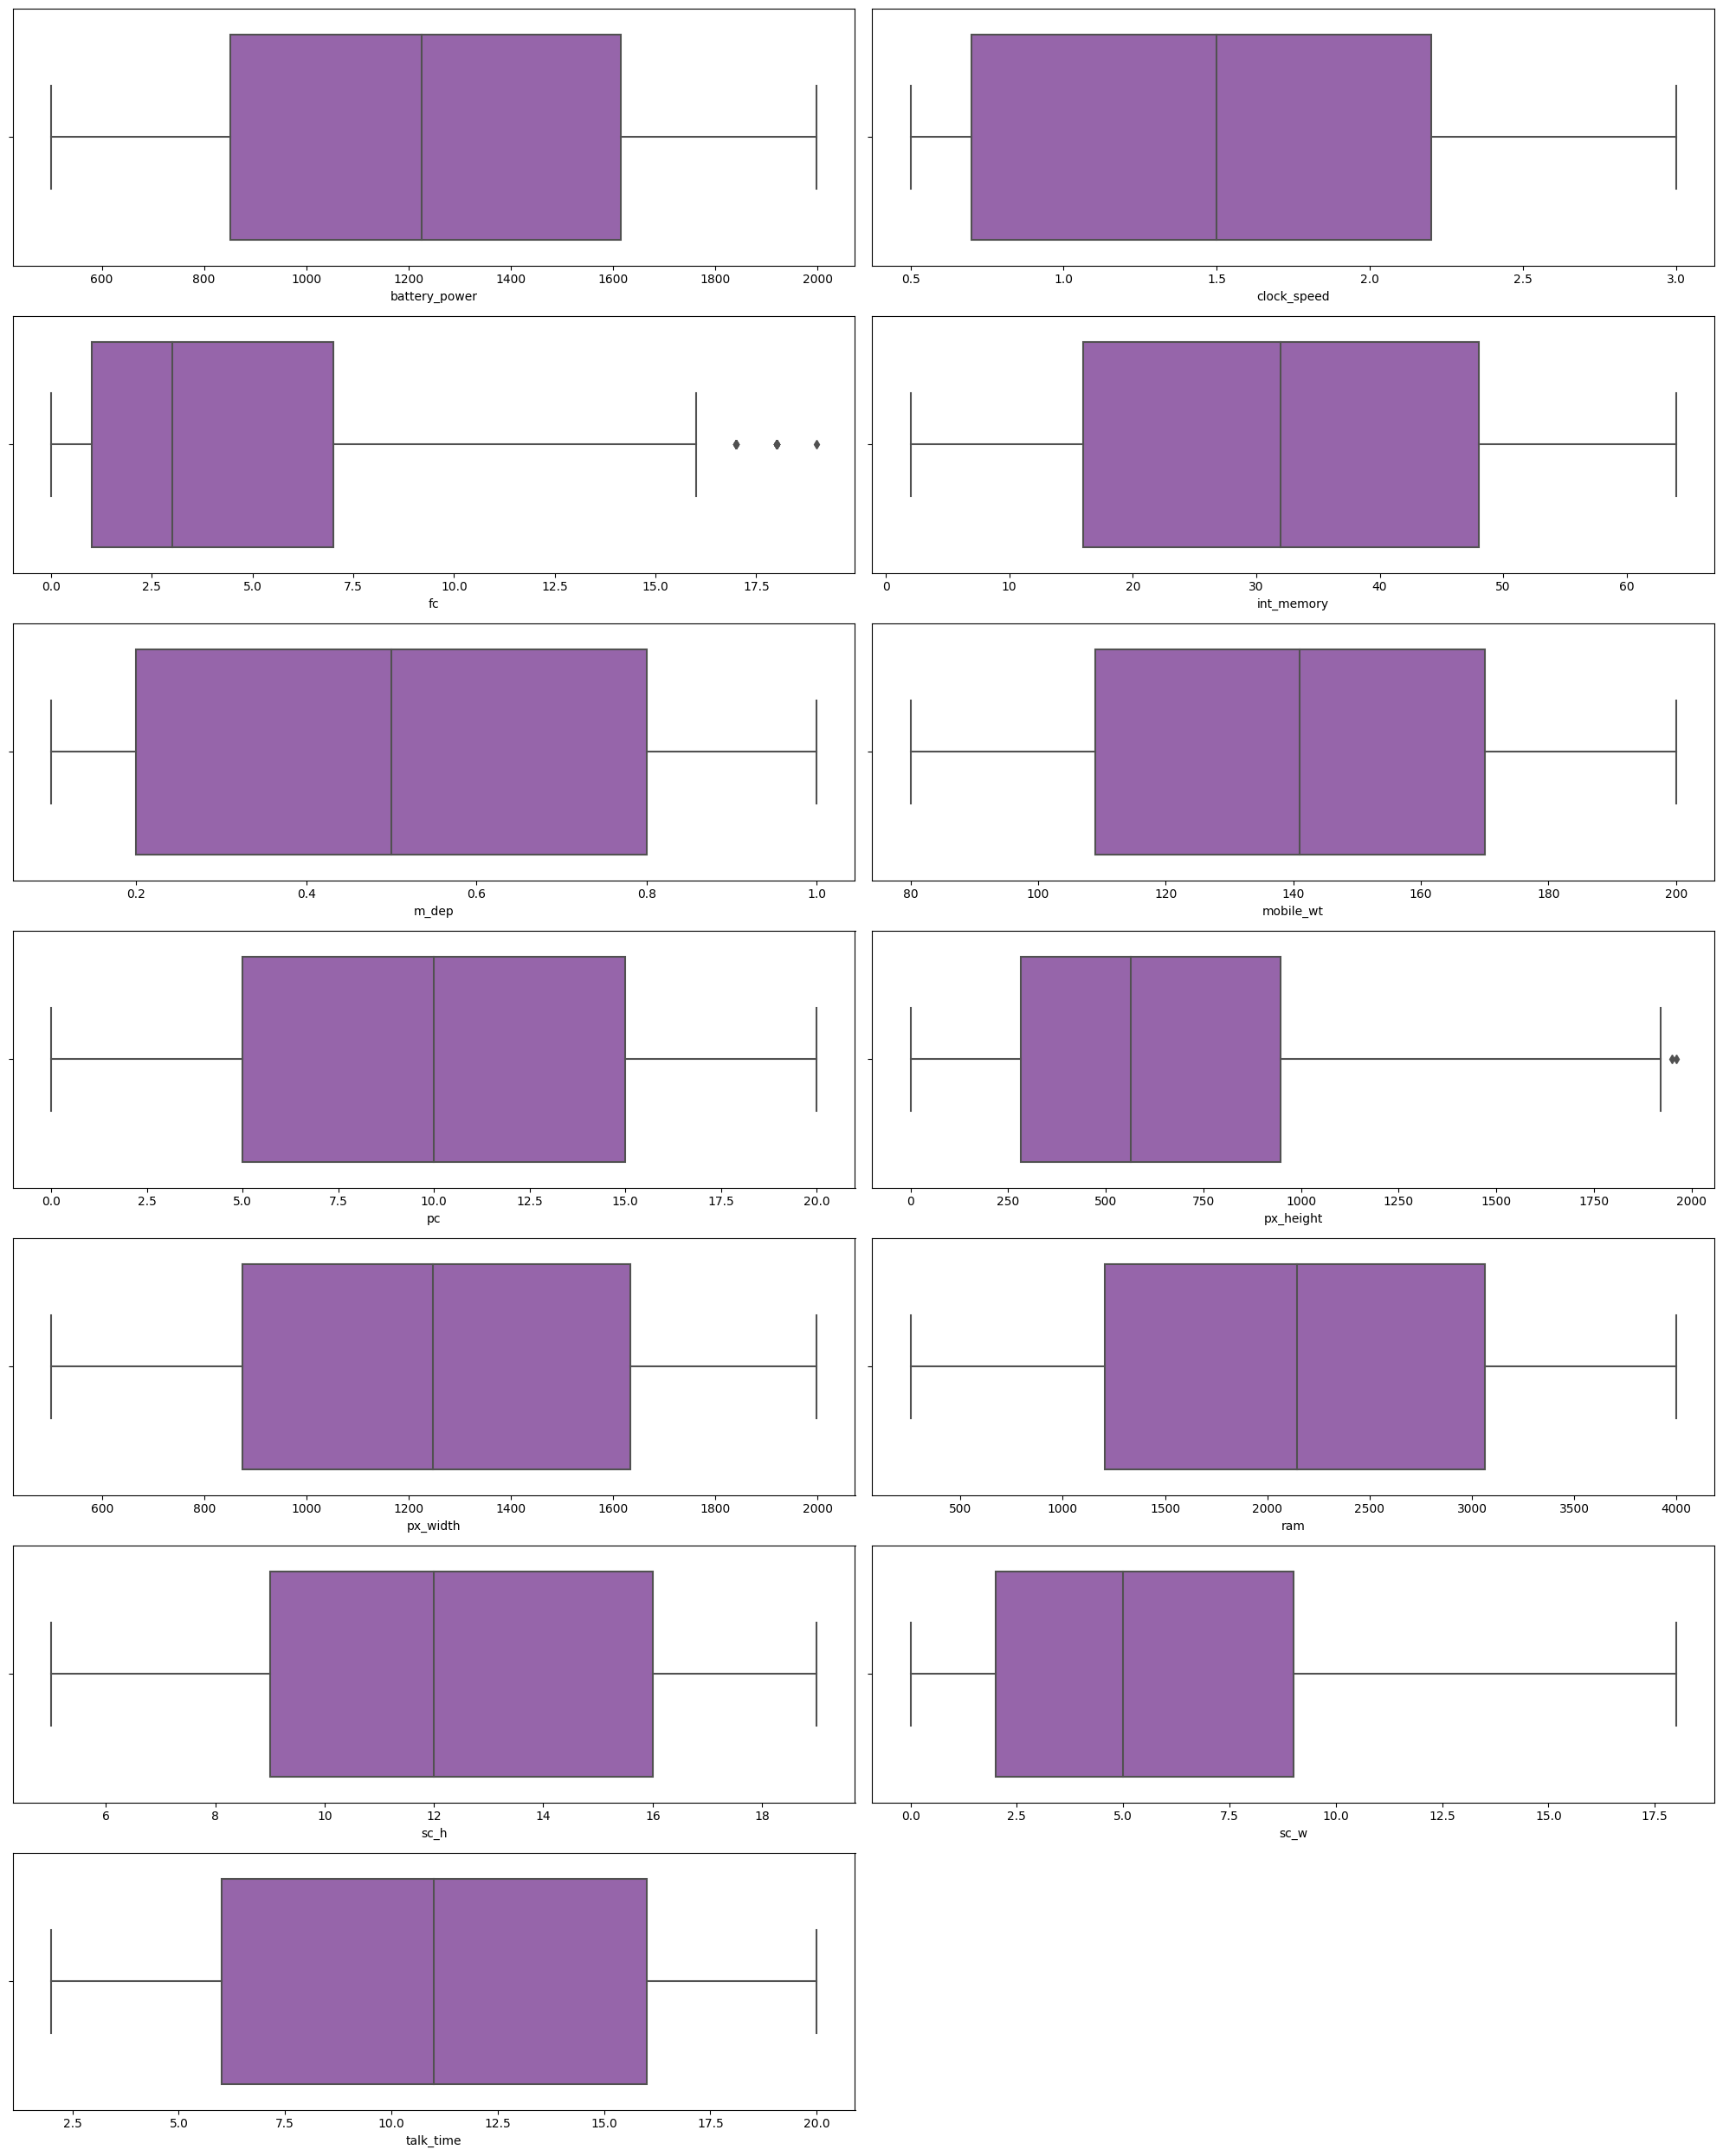

In [ ]:
#outlier detection
#list of numerical features
numerical_features=['battery_power',  'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt',  'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
      ]
i=0
plt.figure(figsize=(20,25))

for numerical in numerical_features:
  i+=1
  plt.subplot(7,2,i)
  sns.boxplot(x=df_train[numerical],data=df_train,color='#9b59b6')
plt.tight_layout()

###Outliers are present in two columns ,they are fc and px_height

#EDA on Training dataset

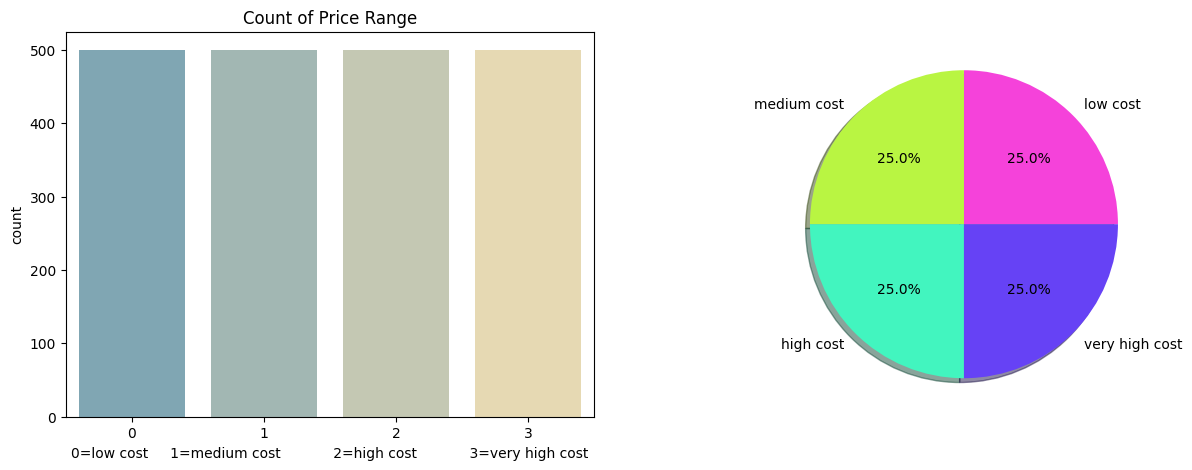

In [ ]:
# Visualize number of price range values in dataset
plt.figure(figsize=(15,5))

# Create bar plot showing count of price range value
plt.subplot(1, 2, 1)
sns.countplot(x = "price_range", data = df_train,palette='blend:#7AB,#EDA')
plt.xlabel('0=low cost     1=medium cost            2=high cost            3=very high cost')
plt.title("Count of Price Range")

# Create pie chart showing proportion of price range value
plt.subplot(1, 2, 2)
plt.pie(df_train["price_range"].value_counts(), labels = ["low cost", "medium cost","high cost","very high cost"], shadow = True, autopct = "%1.1f%%", colors = ['#f542da','#b9f542','#42f5bf','#6642f5'])

# Display plots
plt.show()

> * The mobile phones count is equally divided between each price ranges,each class have a count of 500 entries

> * The dataset is balanced

#1.Count plot

#1.1 Plotting Numerical Features

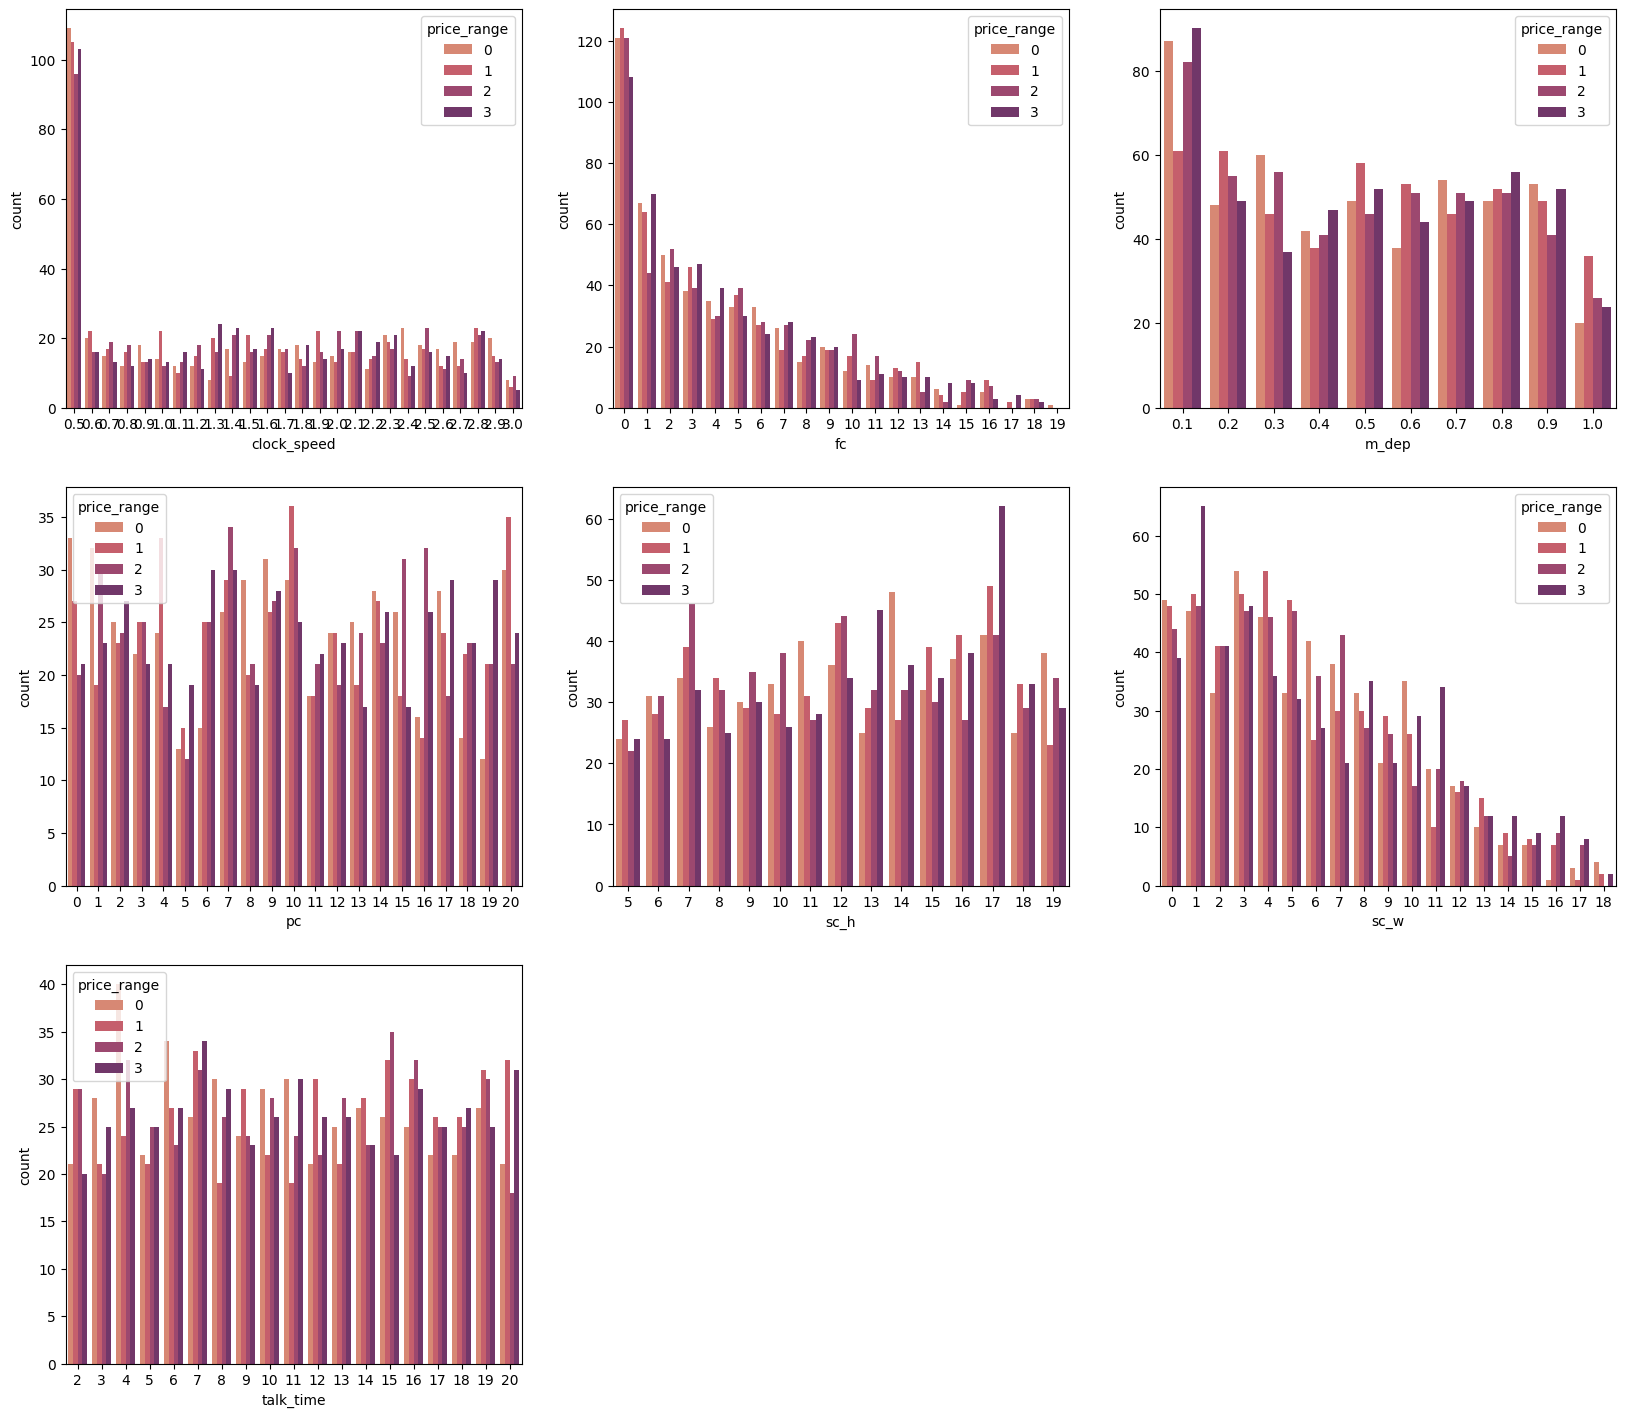

In [ ]:
i=0
plt.figure(figsize=(20,30))
columns=['battery_power',  'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt',  'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
        ]

for columns in columns:

  if (df_train[columns].nunique())<=30:
    i+=1
    plt.subplot(5,3,i)
    sns.countplot(x=df_train[columns],data=df_train,palette='flare',hue='price_range')


#1.2 Ploting Categorical Features

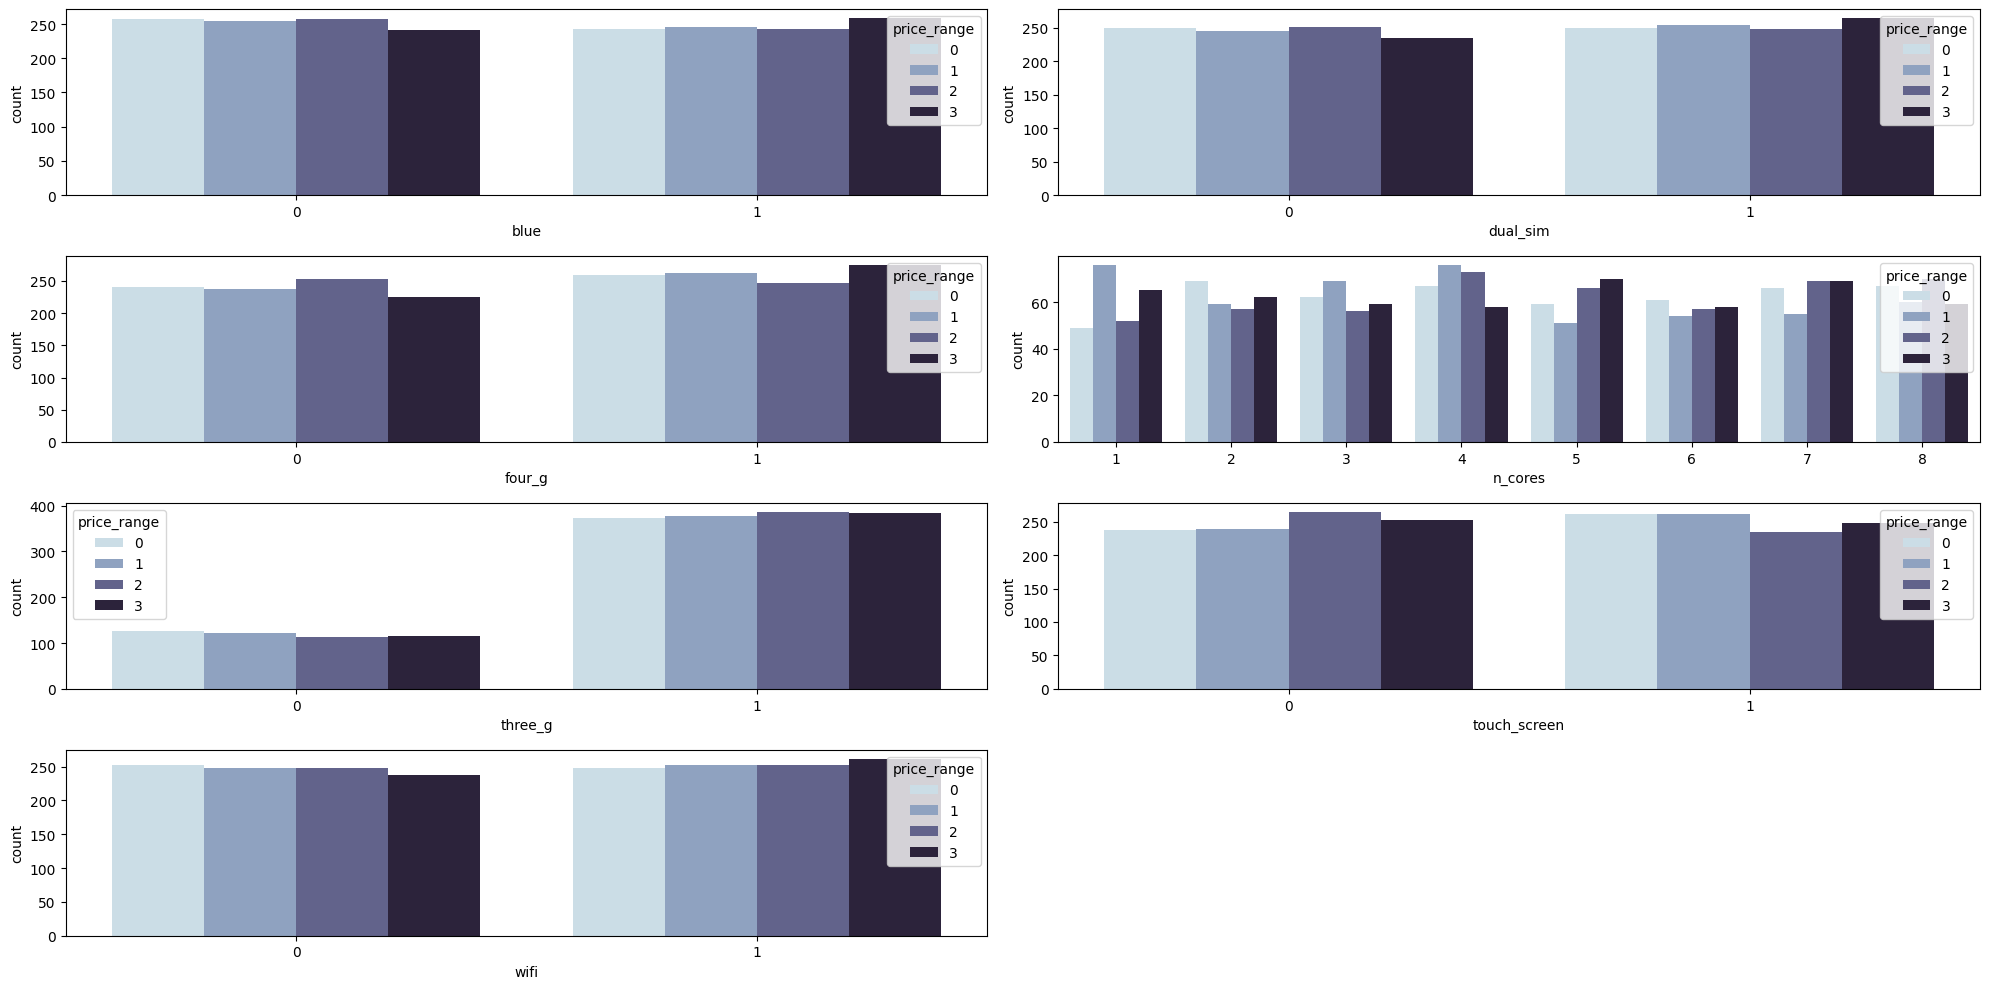

In [ ]:
#  list of categorical features
categorical = ["blue","dual_sim","four_g","n_cores","three_g","touch_screen","wifi"]

i=0
plt.figure(figsize=(20,10))

for categorical in categorical:
  i+=1
  plt.subplot(4,2,i)
  sns.countplot(x=df_train[categorical],data=df_train,hue='price_range',palette='ch:s=.25,rot=-.25')
  plt.tight_layout()

###From the above plotted count plot we can conclude that there is large difference in number of mobiles phones having 3G or not, other features count is almost same for having and not having that feature by the mobile phone.

#2.Dist plot

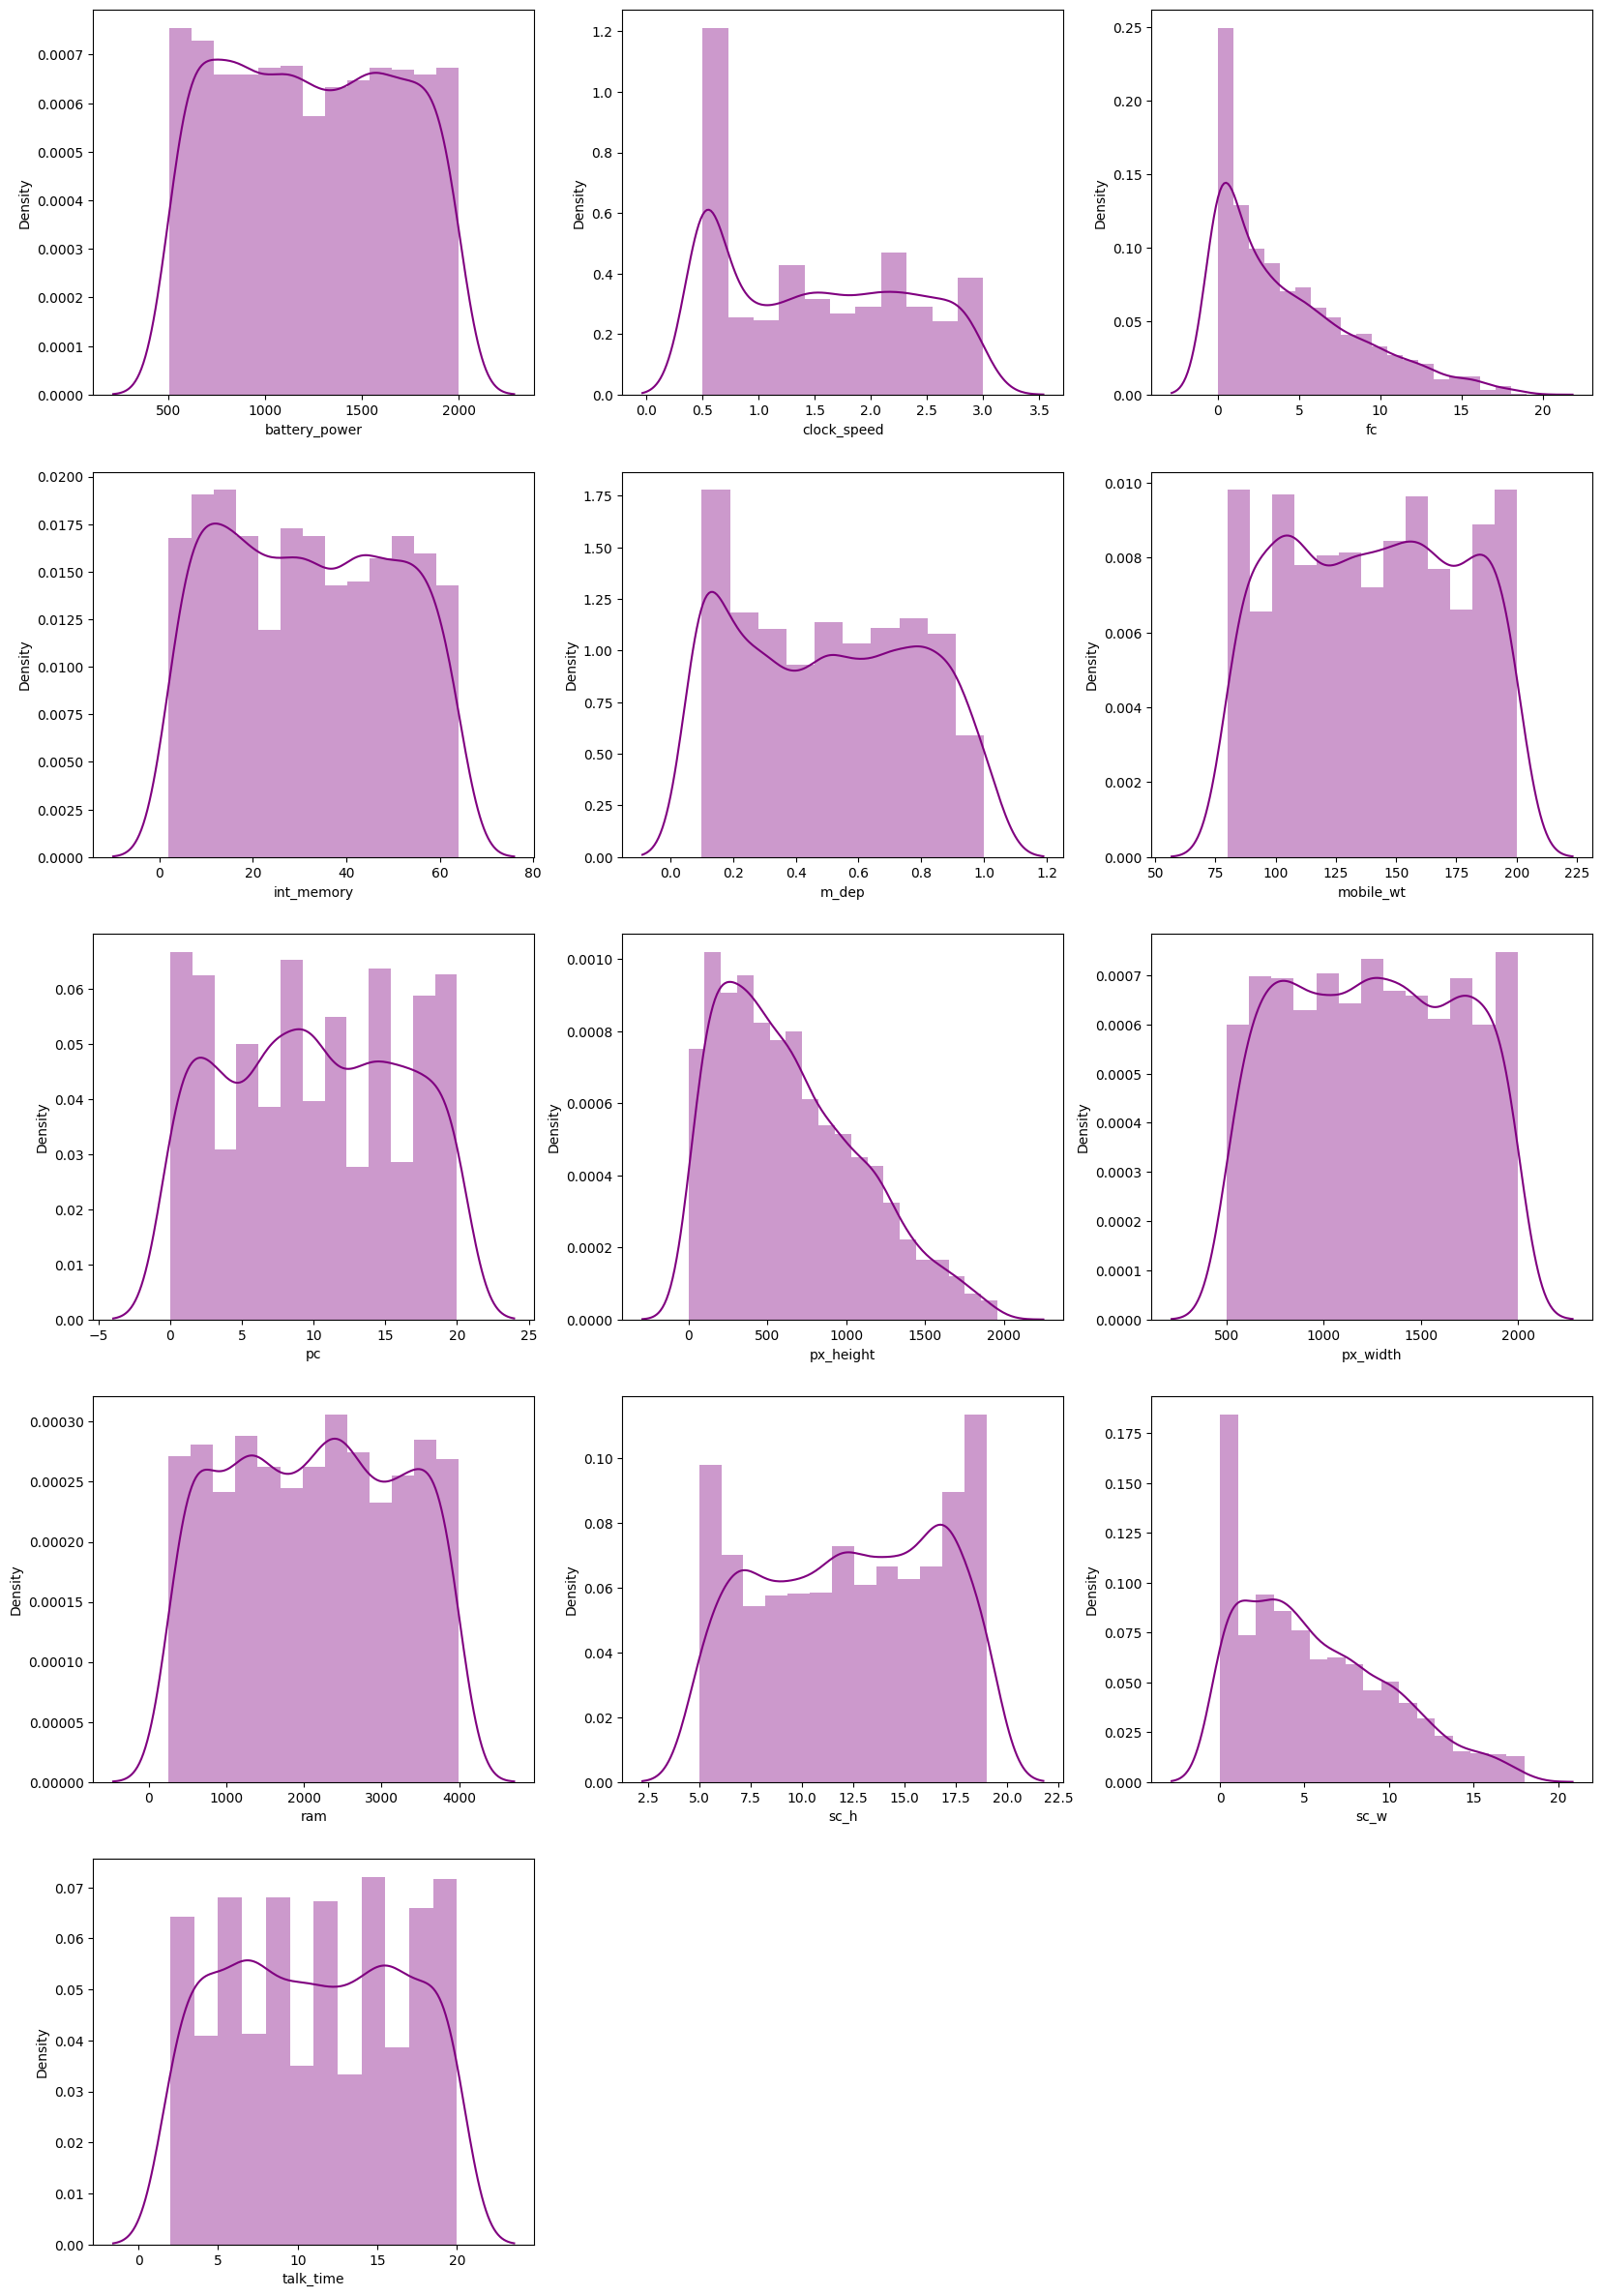

In [ ]:
i=0
plt.figure(figsize=(20,30))
numerical_columns=['battery_power',  'clock_speed',  'fc',
       'int_memory', 'm_dep', 'mobile_wt',  'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
     ]

for columns in numerical_columns:


    i+=1
    plt.subplot(5,3,i)
    sns.distplot(x=df_train[columns],color='purple')
    plt.xlabel(columns)


###From the above plotted dist plot we can conclude the following
> * fc,px_height,sc_w are right skewed
> * other features are having a multimodal distribution

#3.Pie plot

In [ ]:
df_train['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

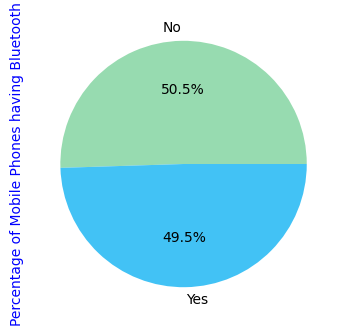

<Figure size 640x480 with 0 Axes>

In [ ]:
#Bluetooth
labels=['No','Yes']
plt.figure(figsize=(5,5))
df_train['blue'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4),colors=['#97dbb0','#42c2f5'])
plt.ylabel('Percentage of Mobile Phones having Bluetooth',color='blue')
plt.show();
plt.tight_layout();

In [ ]:
df_train['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

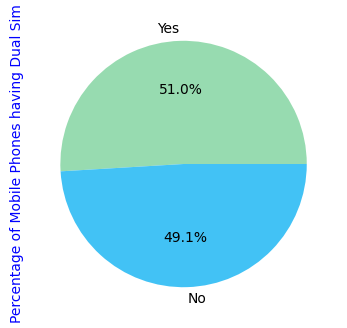

In [ ]:
#Dual sim
labels=['Yes','No']
plt.figure(figsize=(5,5))
df_train['dual_sim'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4),colors=['#97dbb0','#42c2f5'])
plt.ylabel('Percentage of Mobile Phones having Dual Sim',color='blue')
plt.show()

In [ ]:
df_train['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

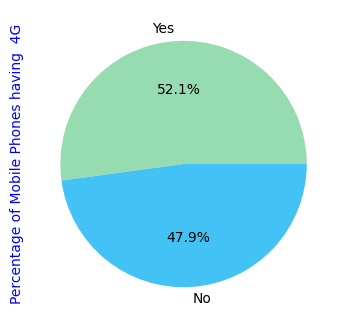

In [ ]:
#4G
labels=['Yes','No']
plt.figure(figsize=(5,5))
df_train['four_g'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4),colors=['#97dbb0','#42c2f5'])
plt.ylabel('Percentage of Mobile Phones having  4G',color='blue')
plt.show()

In [ ]:
df_train['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

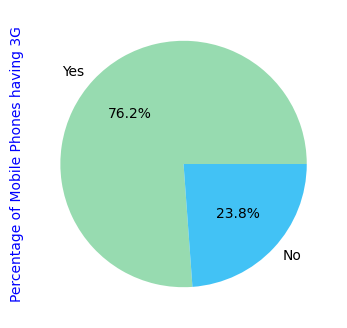

In [ ]:
#3G
labels=['Yes','No']
plt.figure(figsize=(5,5))
df_train['three_g'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4),colors=['#97dbb0','#42c2f5'])
plt.ylabel('Percentage of Mobile Phones having 3G',color='blue')
plt.show()

In [ ]:
df_train['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

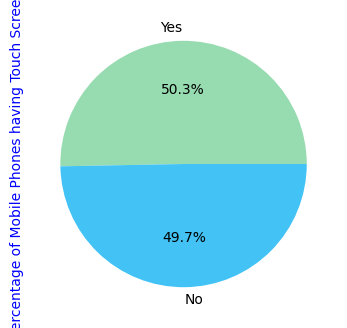

In [ ]:
#Touch Screen
labels=['Yes','No']
plt.figure(figsize=(5,5))
df_train['touch_screen'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4),colors=['#97dbb0','#42c2f5'])
plt.ylabel('Percentage of Mobile Phones having Touch Screen',color='blue')
plt.show()


In [ ]:
df_train['wifi'].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

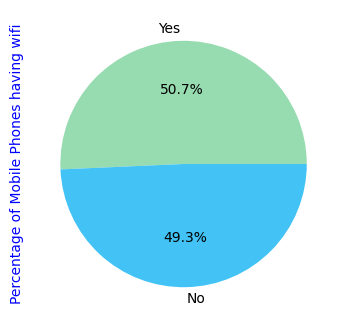

In [ ]:
#wifi
labels=['Yes','No']
plt.figure(figsize=(5,5))
df_train['wifi'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4),colors=['#97dbb0','#42c2f5'])
plt.ylabel('Percentage of Mobile Phones having wifi',color='blue')
plt.show()

In [ ]:
df_train['n_cores'].value_counts()


4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

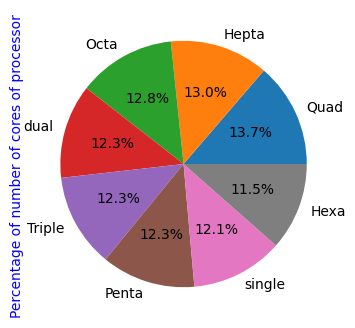

In [ ]:
#Number of core processors
labels=['Quad','Hepta','Octa','dual','Triple','Penta','single','Hexa']
plt.figure(figsize=(5,5))
df_train['n_cores'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4),)
plt.ylabel('Percentage of number of cores of processor ',color='blue')
plt.show()

#From the above plotted Pie  graph we can conclude that
> * about half percentage of mobile phones have Bluetooth,4G,touchscreen,wifi and dual sim slot.
> * different types of number of core processor is almost evenly divided between mobile phones.

#4.Line Plot

In [ ]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

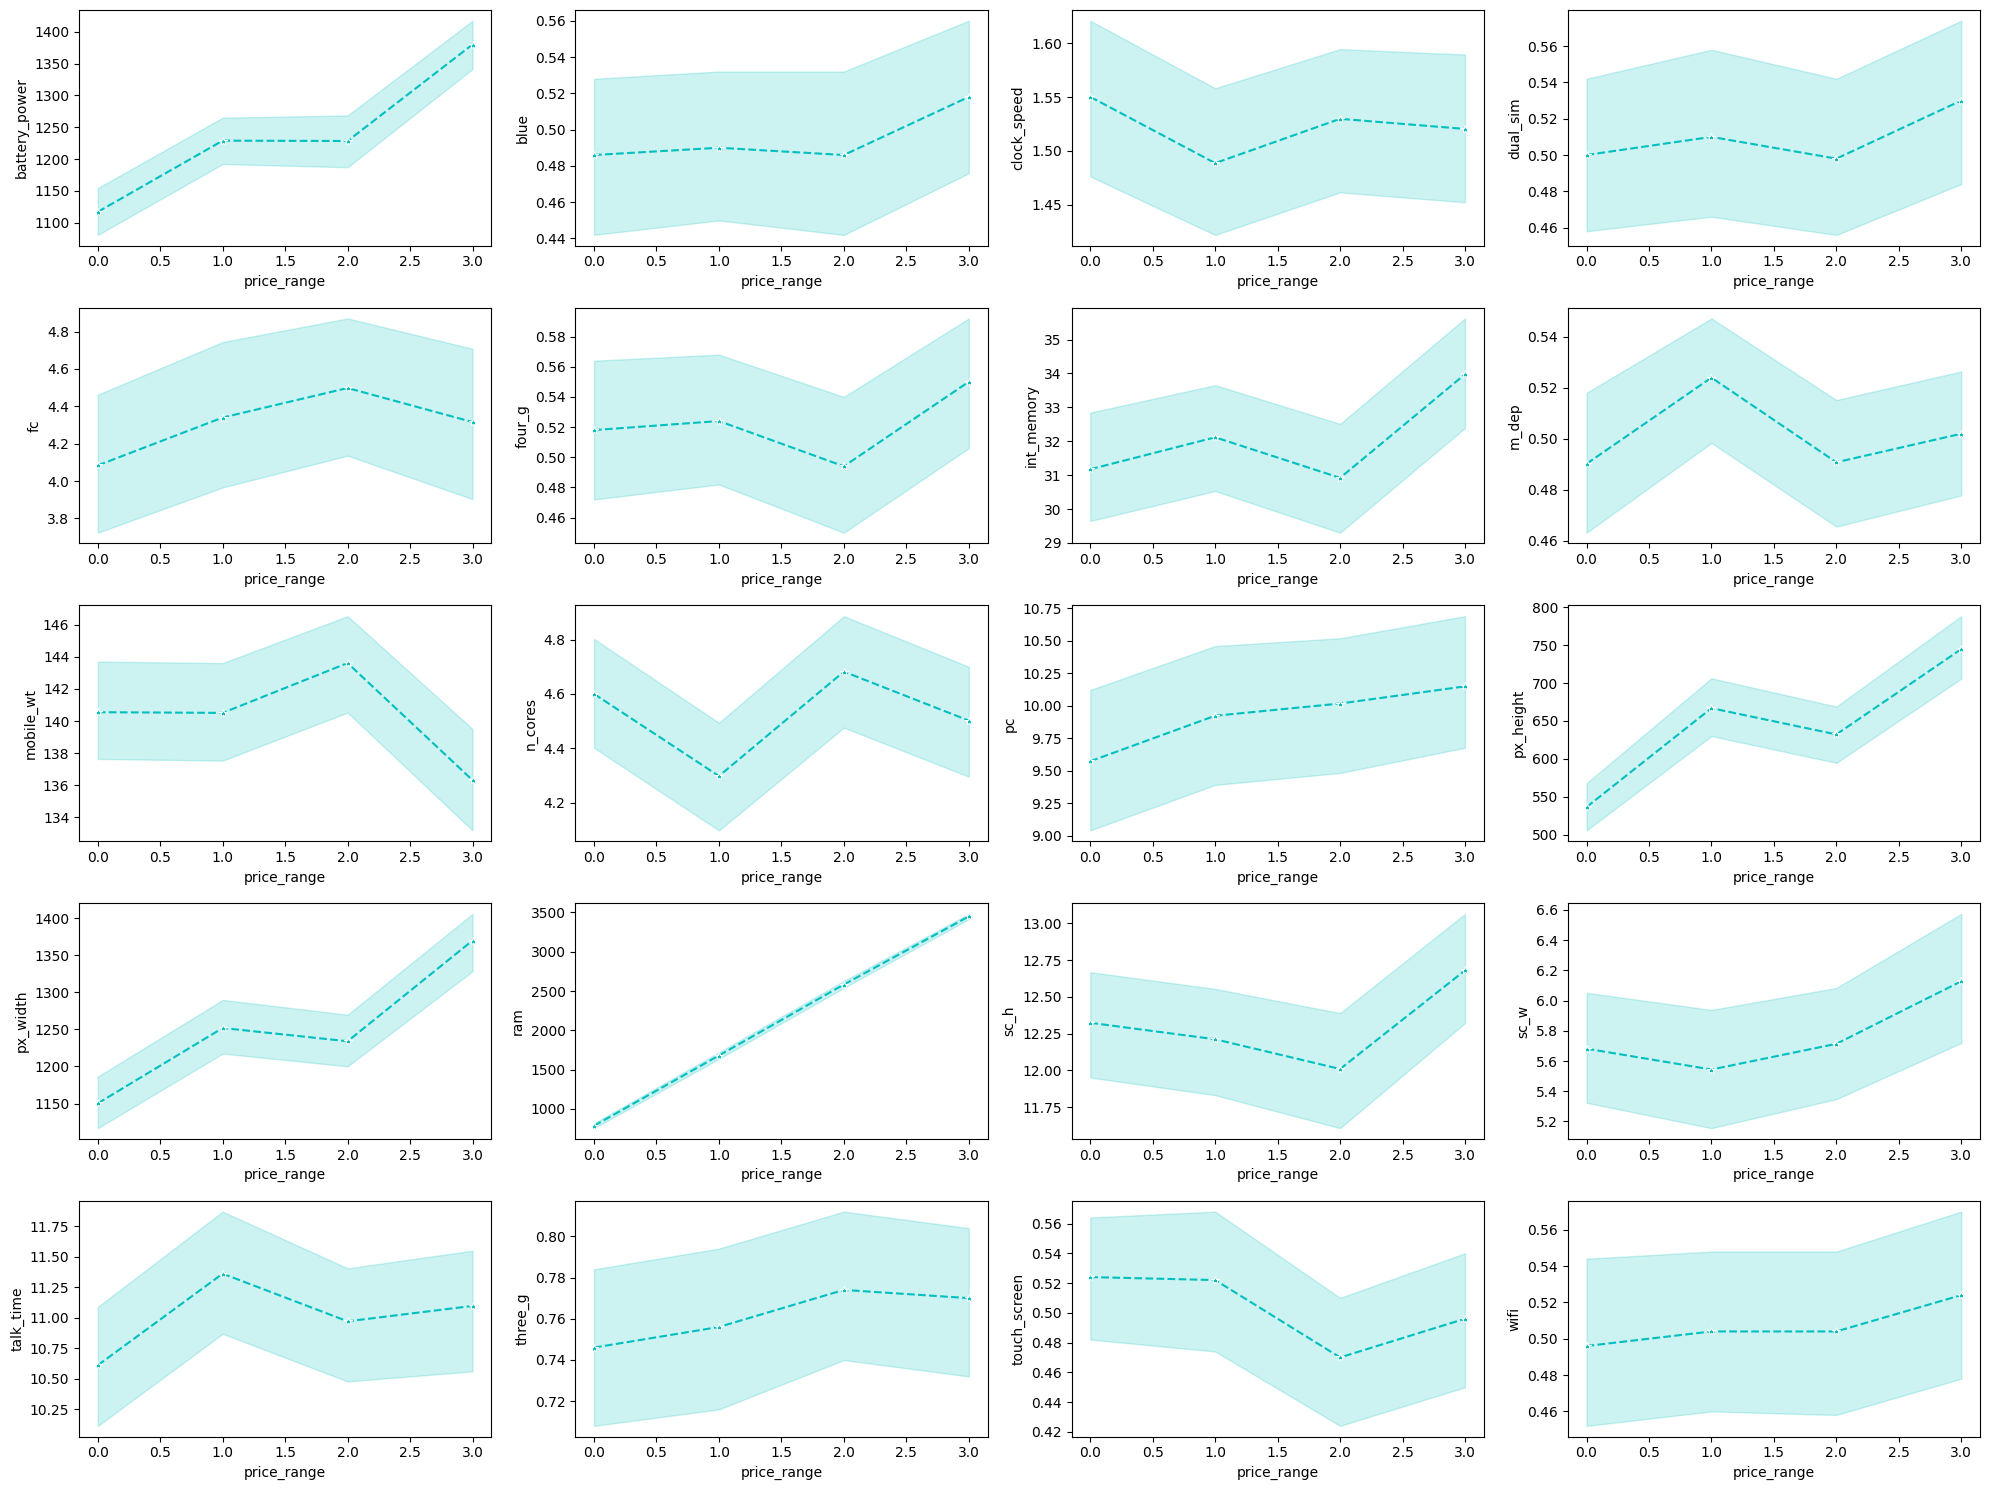

In [ ]:
columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']
plt.figure(figsize=(20,15))
i=0
for column in columns:
  i+=1
  plt.subplot(5,4,i)
  sns.lineplot(y=df_train[column],x=df_train['price_range'],c='c',linestyle='--',marker='*')
  plt.tight_layout()

###From the above plotted line plot we can conclude the following
> * higher the ram capacity higher the price
> * higher the battrey power higher the price
> * higher the px_height and px_width higher the price
> * lower the clock speed higher the price
> * higher the internal memory higher the price
> * higher the pixel of primary camera higher the price

#Correlation Matrix

<Axes: >

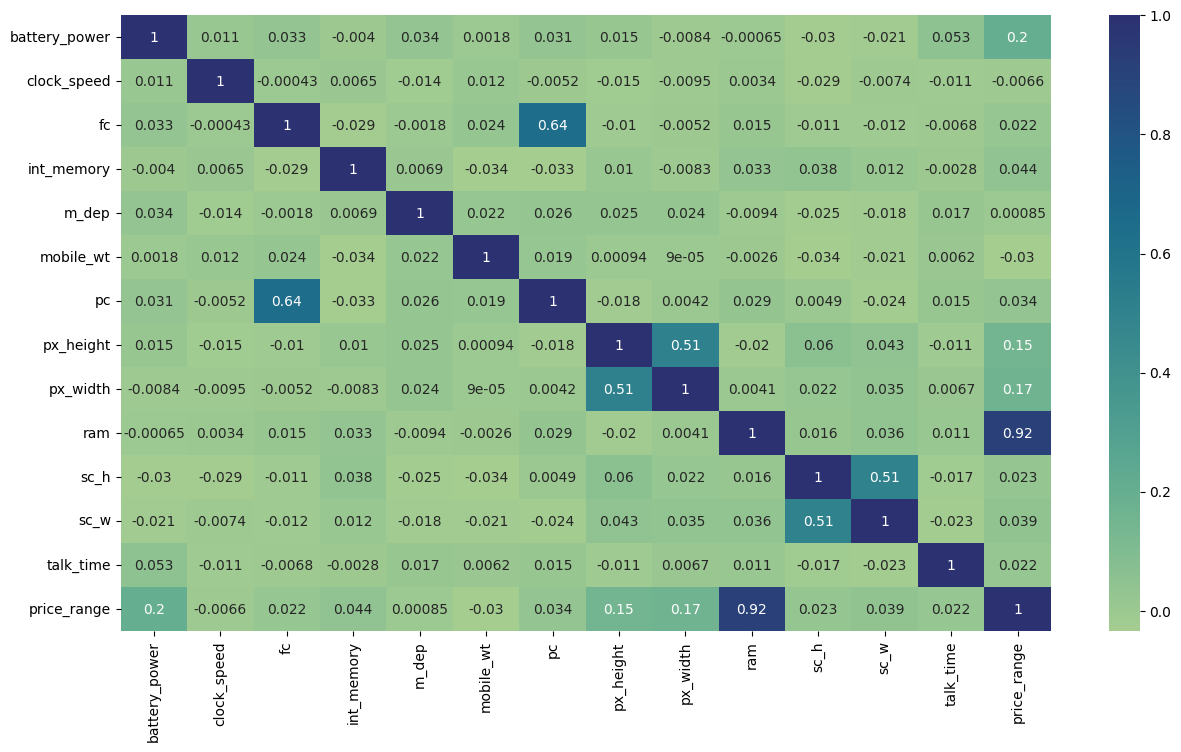

In [ ]:
columns=['battery_power',  'clock_speed',  'fc',
       'int_memory', 'm_dep', 'mobile_wt',  'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time','price_range'
     ]
plt.figure(figsize=(15,8))
#calculate correlation matrix of numerial columns
corr_matrix=df_train[columns].corr()

#Plotting the correlation matrix using heatmap
sns.heatmap(corr_matrix, annot=True, cmap='crest')

> * Ram is showing high positive correlation value of  0.92 with price_range.
> * Px_height and px_width is having a positive correlation of 0.51.
> * pc and fc is having a positive correlation of 0.64.

#Ranking dataset according to price_range

In [ ]:
#creating a new column rank_price
df_train['rank_price']=df_train['price_range'].rank()

In [ ]:
df_train.head(3)

battery_power  blue  clock_speed  ...  wifi  price_range  rank_price
0            842     0          2.2  ...     1            1       750.5
1           1021     1          0.5  ...     0            2      1250.5
2            563     1          0.5  ...     0            2      1250.5

[3 rows x 22 columns]

a new column named rank_price is created

In [ ]:
#sorting the dataset using price _range columns
df_train.sort_values(by='price_range')

battery_power  blue  clock_speed  ...  wifi  price_range  rank_price
1838            720     1          0.9  ...     0            0       250.5
1762            808     1          0.5  ...     1            0       250.5
419             914     1          0.9  ...     0            0       250.5
846            1489     0          2.4  ...     0            0       250.5
845            1907     0          2.0  ...     1            0       250.5
...             ...   ...          ...  ...   ...          ...         ...
981            1046     1          2.8  ...     1            3      1750.5
982            1035     0          0.6  ...     0            3      1750.5
987            1688     0          2.5  ...     1            3      1750.5
956             862     0          2.3  ...     1            3      1750.5
1999            510     1          2.0  ...     1            3      1750.5

[2000 rows x 22 columns]

In [ ]:
#sorting the dataset using price _range columns and displaying price range  and rank price
df_train.sort_values(by='price_range')[['price_range','rank_price']]

price_range  rank_price
1838            0       250.5
1762            0       250.5
419             0       250.5
846             0       250.5
845             0       250.5
...           ...         ...
981             3      1750.5
982             3      1750.5
987             3      1750.5
956             3      1750.5
1999            3      1750.5

[2000 rows x 2 columns]

#Scaling

###1.MinMax Scaling on training data

In [ ]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'rank_price'],
      dtype='object')

In [ ]:
#categorical columns
df_cat=df_train.drop(['battery_power',  'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range','rank_price'
       ],axis=1)

In [ ]:
#target column
df_target=df_train['price_range']

In [ ]:
#droping target columns and categorical columns
df_minmax=df_train.drop(['price_range','rank_price', 'blue',  'dual_sim', 'four_g','n_cores', 'three_g','touch_screen', 'wifi'],axis=1)

In [ ]:
#function for doing minmax scaling
def min_max(df_minmax):
  #creating an instance of minmax scaler
  min_max=MinMaxScaler()
  x1=min_max.fit_transform(df_minmax)
  return x1

In [ ]:
x1=min_max(df_minmax)#is an array
x1

array([[0.22778891, 0.68      , 0.05263158, ..., 0.28571429, 0.38888889,
        0.94444444],
       [0.34736139, 0.        , 0.        , ..., 0.85714286, 0.16666667,
        0.27777778],
       [0.04141617, 0.        , 0.10526316, ..., 0.42857143, 0.11111111,
        0.38888889],
       ...,
       [0.94188377, 0.16      , 0.05263158, ..., 0.28571429, 0.05555556,
        0.16666667],
       [0.6753507 , 0.16      , 0.21052632, ..., 0.92857143, 0.55555556,
        0.94444444],
       [0.00601202, 0.6       , 0.26315789, ..., 1.        , 0.22222222,
        0.        ]])

In [ ]:
#converting x1 back the array into dataframe
x1=pd.DataFrame(x1,columns=df_minmax.columns)

In [ ]:
x1

battery_power  clock_speed        fc  int_memory     m_dep  mobile_wt  \
0          0.227789         0.68  0.052632    0.080645  0.555556   0.900000   
1          0.347361         0.00  0.000000    0.822581  0.666667   0.466667   
2          0.041416         0.00  0.105263    0.629032  0.888889   0.541667   
3          0.076152         0.80  0.000000    0.129032  0.777778   0.425000   
4          0.881764         0.28  0.684211    0.677419  0.555556   0.508333   
...             ...          ...       ...         ...       ...        ...   
1995       0.195725         0.00  0.000000    0.000000  0.777778   0.216667   
1996       0.977956         0.84  0.000000    0.596774  0.111111   0.891667   
1997       0.941884         0.16  0.052632    0.548387  0.666667   0.233333   
1998       0.675351         0.16  0.210526    0.709677  0.000000   0.541667   
1999       0.006012         0.60  0.263158    0.693548  0.888889   0.733333   

        pc  px_height  px_width       ram      sc_h      sc_w  talk_time  
0     0.10   0.010204  0.170895  0.612774  0.285714  0.388889   0.944444  
1     0.30   0.461735  0.993324  0.634687  0.857143  0.166667   0.277778  
2     0.30   0.644388  0.811749  0.627205  0.428571  0.111111   0.388889  
3     0.45   0.620408  0.858478  0.671566  0.785714  0.444444   0.500000  
4     0.70   0.616327  0.475300  0.308658  0.214286  0.111111   0.722222  
...    ...        ...       ...       ...       ...       ...        ...  
1995  0.70   0.623469  0.927904  0.110102  0.571429  0.222222   0.944444  
1996  0.15   0.466837  0.977971  0.474613  0.428571  0.555556   0.777778  
1997  0.15   0.442857  0.755674  0.748530  0.285714  0.055556   0.166667  
1998  0.25   0.171429  0.113485  0.163816  0.928571  0.555556   0.944444  
1999  0.80   0.246429  0.169559  0.978888  1.000000  0.222222   0.000000  

[2000 rows x 13 columns]

In [ ]:
x1.describe()

battery_power  clock_speed           fc   int_memory        m_dep  \
count    2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean        0.492664     0.408900     0.226816     0.484621     0.446389   
std         0.293533     0.326402     0.228497     0.292673     0.320462   
min         0.000000     0.000000     0.000000     0.000000     0.000000   
25%         0.234302     0.080000     0.052632     0.225806     0.111111   
50%         0.484302     0.400000     0.157895     0.483871     0.444444   
75%         0.744322     0.680000     0.368421     0.741935     0.777778   
max         1.000000     1.000000     1.000000     1.000000     1.000000   

         mobile_wt           pc    px_height     px_width          ram  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.502075     0.495825     0.329137     0.501679     0.499255   
std       0.294997     0.303216     0.226419     0.288518     0.289880   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.241667     0.250000     0.144260     0.250167     0.254276   
50%       0.508333     0.500000     0.287755     0.498665     0.505211   
75%       0.750000     0.750000     0.483291     0.756342     0.750534   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              sc_h         sc_w    talk_time  
count  2000.000000  2000.000000  2000.000000  
mean      0.521893     0.320389     0.500611  
std       0.300946     0.242022     0.303553  
min       0.000000     0.000000     0.000000  
25%       0.285714     0.111111     0.222222  
50%       0.500000     0.277778     0.500000  
75%       0.785714     0.500000     0.777778  
max       1.000000     1.000000     1.000000

###After scaling all the feature values ranges in between 0 and 1

In [ ]:
#concatinating scaled data ,categorical variables and target columns
x_minmax=pd.concat([x1,df_cat,df_target],axis=1)

In [ ]:
x_minmax#minmax scaled data

battery_power  clock_speed        fc  int_memory     m_dep  mobile_wt  \
0          0.227789         0.68  0.052632    0.080645  0.555556   0.900000   
1          0.347361         0.00  0.000000    0.822581  0.666667   0.466667   
2          0.041416         0.00  0.105263    0.629032  0.888889   0.541667   
3          0.076152         0.80  0.000000    0.129032  0.777778   0.425000   
4          0.881764         0.28  0.684211    0.677419  0.555556   0.508333   
...             ...          ...       ...         ...       ...        ...   
1995       0.195725         0.00  0.000000    0.000000  0.777778   0.216667   
1996       0.977956         0.84  0.000000    0.596774  0.111111   0.891667   
1997       0.941884         0.16  0.052632    0.548387  0.666667   0.233333   
1998       0.675351         0.16  0.210526    0.709677  0.000000   0.541667   
1999       0.006012         0.60  0.263158    0.693548  0.888889   0.733333   

        pc  px_height  px_width       ram  ...      sc_w  talk_time  blue  \
0     0.10   0.010204  0.170895  0.612774  ...  0.388889   0.944444     0   
1     0.30   0.461735  0.993324  0.634687  ...  0.166667   0.277778     1   
2     0.30   0.644388  0.811749  0.627205  ...  0.111111   0.388889     1   
3     0.45   0.620408  0.858478  0.671566  ...  0.444444   0.500000     1   
4     0.70   0.616327  0.475300  0.308658  ...  0.111111   0.722222     1   
...    ...        ...       ...       ...  ...       ...        ...   ...   
1995  0.70   0.623469  0.927904  0.110102  ...  0.222222   0.944444     1   
1996  0.15   0.466837  0.977971  0.474613  ...  0.555556   0.777778     1   
1997  0.15   0.442857  0.755674  0.748530  ...  0.055556   0.166667     0   
1998  0.25   0.171429  0.113485  0.163816  ...  0.555556   0.944444     0   
1999  0.80   0.246429  0.169559  0.978888  ...  0.222222   0.000000     1   

      dual_sim  four_g  n_cores  three_g  touch_screen  wifi  price_range  
0            0       0        2        0             0     1            1  
1            1       1        3        1             1     0            2  
2            1       1        5        1             1     0            2  
3            0       0        6        1             0     0            2  
4            0       1        2        1             1     0            1  
...        ...     ...      ...      ...           ...   ...          ...  
1995         1       1        6        1             1     0            0  
1996         1       0        4        1             1     1            2  
1997         1       1        8        1             1     0            3  
1998         0       1        5        1             1     1            0  
1999         1       1        6        1             1     1            3  

[2000 rows x 21 columns]

###2.Standard Scaling on training data

In [ ]:
#droping target columns and categorical columns
df_std=df_train.drop(['price_range','rank_price', 'blue',  'dual_sim', 'four_g','n_cores', 'three_g','touch_screen', 'wifi'],axis=1)

In [ ]:
def std(df_std):
  #creating an instance of standard  scaler
  std_sc=StandardScaler()
  x2=std_sc.fit_transform(df_std)
  return x2

In [ ]:
x2=std(df_std)
x2#is an array

array([[-0.90259726,  0.83077942, -0.76249466, ..., -0.78498329,
         0.2831028 ,  1.46249332],
       [-0.49513857, -1.2530642 , -0.99289039, ...,  1.11426556,
        -0.63531667, -0.73426721],
       [-1.5376865 , -1.2530642 , -0.53209893, ..., -0.31017108,
        -0.86492153, -0.36814045],
       ...,
       [ 1.53077336, -0.76274805, -0.76249466, ..., -0.78498329,
        -1.0945264 , -1.10039396],
       [ 0.62252745, -0.76274805, -0.07130748, ...,  1.35167167,
         0.9719174 ,  1.46249332],
       [-1.65833069,  0.58562134,  0.15908825, ...,  1.58907778,
        -0.4057118 , -1.6495841 ]])

In [ ]:
#converting x2 back the array into dataframe
x2=pd.DataFrame(x2,columns=df_std.columns)

In [ ]:
x2

battery_power  clock_speed        fc  int_memory     m_dep  mobile_wt  \
0         -0.902597     0.830779 -0.762495   -1.380644  0.340740   1.349249   
1         -0.495139    -1.253064 -0.992890    1.155024  0.687548  -0.120059   
2         -1.537686    -1.253064 -0.532099    0.493546  1.381165   0.134244   
3         -1.419319     1.198517 -0.992890   -1.215274  1.034357  -0.261339   
4          1.325906    -0.395011  2.002254    0.658915  0.340740   0.021220   
...             ...          ...       ...         ...       ...        ...   
1995      -1.011860    -1.253064 -0.992890   -1.656260  1.034357  -0.967737   
1996       1.653694     1.321096 -0.992890    0.383299 -1.046495   1.320993   
1997       1.530773    -0.762748 -0.762495    0.217930  0.687548  -0.911225   
1998       0.622527    -0.762748 -0.071307    0.769162 -1.393304   0.134244   
1999      -1.658331     0.585621  0.159088    0.714039  1.381165   0.784130   

            pc  px_height  px_width       ram      sc_h      sc_w  talk_time  
0    -1.305750  -1.408949 -1.146784  0.391703 -0.784983  0.283103   1.462493  
1    -0.645989   0.585778  1.704465  0.467317  1.114266 -0.635317  -0.734267  
2    -0.645989   1.392684  1.074968  0.441498 -0.310171 -0.864922  -0.368140  
3    -0.151168   1.286750  1.236971  0.594569  0.876859  0.512708  -0.002014  
4     0.673534   1.268718 -0.091452 -0.657666 -1.022389 -0.864922   0.730240  
...        ...        ...       ...       ...       ...       ...        ...  
1995  0.673534   1.300273  1.477661 -1.342799  0.164641 -0.405712   1.462493  
1996 -1.140810   0.608317  1.651235 -0.085031 -0.310171  0.971917   0.913303  
1997 -1.140810   0.502383  0.880565  0.860139 -0.784983 -1.094526  -1.100394  
1998 -0.810929  -0.696707 -1.345816 -1.157454  1.351672  0.971917   1.462493  
1999  1.003414  -0.365380 -1.151413  1.655004  1.589078 -0.405712  -1.649584  

[2000 rows x 13 columns]

In [ ]:
x2.describe()

battery_power   clock_speed            fc    int_memory         m_dep  \
count   2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean    2.149392e-16 -1.545430e-16  5.861978e-17 -9.592327e-17 -1.030287e-16   
std     1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min    -1.678817e+00 -1.253064e+00 -9.928904e-01 -1.656260e+00 -1.393304e+00   
25%    -8.804033e-01 -1.007906e+00 -7.624947e-01 -8.845346e-01 -1.046495e+00   
50%    -2.849593e-02 -2.727384e-02 -3.017032e-01 -2.563229e-03 -6.069151e-03   
75%     8.575560e-01  8.307794e-01  6.198797e-01  8.794082e-01  1.034357e+00   
max     1.728812e+00  1.811412e+00  3.384628e+00  1.761380e+00  1.727974e+00   

          mobile_wt            pc     px_height      px_width           ram  \
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean   1.278977e-16  1.403322e-16  1.181277e-16  6.084022e-17 -1.811884e-16   
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min   -1.702391e+00 -1.635631e+00 -1.454027e+00 -1.739251e+00 -1.722711e+00   
25%   -8.829695e-01 -8.109291e-01 -8.167289e-01 -8.719579e-01 -8.453168e-01   
50%    2.122020e-02  1.377252e-02 -1.828116e-01 -1.045034e-02  2.055123e-02   
75%    8.406421e-01  8.384742e-01  6.810064e-01  8.828792e-01  8.670548e-01   
max    1.688320e+00  1.663176e+00  2.963672e+00  1.727608e+00  1.727851e+00   

               sc_h          sc_w     talk_time  
count  2.000000e+03  2.000000e+03  2.000000e+03  
mean   4.884981e-17 -5.506706e-17  1.421085e-16  
std    1.000250e+00  1.000250e+00  1.000250e+00  
min   -1.734608e+00 -1.324131e+00 -1.649584e+00  
25%   -7.849833e-01 -8.649215e-01 -9.173306e-01  
50%   -7.276497e-02 -1.761069e-01 -2.013697e-03  
75%    8.768595e-01  7.423125e-01  9.133032e-01  
max    1.589078e+00  2.808756e+00  1.645557e+00

In [ ]:
#concatinating scaled data ,categorical variables and target columns
x_std=pd.concat([x2,df_cat,df_target],axis=1)

In [ ]:
x_std#standard scaled data

battery_power  clock_speed        fc  int_memory     m_dep  mobile_wt  \
0         -0.902597     0.830779 -0.762495   -1.380644  0.340740   1.349249   
1         -0.495139    -1.253064 -0.992890    1.155024  0.687548  -0.120059   
2         -1.537686    -1.253064 -0.532099    0.493546  1.381165   0.134244   
3         -1.419319     1.198517 -0.992890   -1.215274  1.034357  -0.261339   
4          1.325906    -0.395011  2.002254    0.658915  0.340740   0.021220   
...             ...          ...       ...         ...       ...        ...   
1995      -1.011860    -1.253064 -0.992890   -1.656260  1.034357  -0.967737   
1996       1.653694     1.321096 -0.992890    0.383299 -1.046495   1.320993   
1997       1.530773    -0.762748 -0.762495    0.217930  0.687548  -0.911225   
1998       0.622527    -0.762748 -0.071307    0.769162 -1.393304   0.134244   
1999      -1.658331     0.585621  0.159088    0.714039  1.381165   0.784130   

            pc  px_height  px_width       ram  ...      sc_w  talk_time  blue  \
0    -1.305750  -1.408949 -1.146784  0.391703  ...  0.283103   1.462493     0   
1    -0.645989   0.585778  1.704465  0.467317  ... -0.635317  -0.734267     1   
2    -0.645989   1.392684  1.074968  0.441498  ... -0.864922  -0.368140     1   
3    -0.151168   1.286750  1.236971  0.594569  ...  0.512708  -0.002014     1   
4     0.673534   1.268718 -0.091452 -0.657666  ... -0.864922   0.730240     1   
...        ...        ...       ...       ...  ...       ...        ...   ...   
1995  0.673534   1.300273  1.477661 -1.342799  ... -0.405712   1.462493     1   
1996 -1.140810   0.608317  1.651235 -0.085031  ...  0.971917   0.913303     1   
1997 -1.140810   0.502383  0.880565  0.860139  ... -1.094526  -1.100394     0   
1998 -0.810929  -0.696707 -1.345816 -1.157454  ...  0.971917   1.462493     0   
1999  1.003414  -0.365380 -1.151413  1.655004  ... -0.405712  -1.649584     1   

      dual_sim  four_g  n_cores  three_g  touch_screen  wifi  price_range  
0            0       0        2        0             0     1            1  
1            1       1        3        1             1     0            2  
2            1       1        5        1             1     0            2  
3            0       0        6        1             0     0            2  
4            0       1        2        1             1     0            1  
...        ...     ...      ...      ...           ...   ...          ...  
1995         1       1        6        1             1     0            0  
1996         1       0        4        1             1     1            2  
1997         1       1        8        1             1     0            3  
1998         0       1        5        1             1     1            0  
1999         1       1        6        1             1     1            3  

[2000 rows x 21 columns]

#Predictive Modeling

###Since the target column price_range  is discrete, we can use classification algorithms to bulit the ML models.

###1.1 Logistic Regression Model on MinMax Scaled data

In [ ]:
x_min=x_minmax.drop('price_range',axis=1)#assigning features to the variable
y_min=x_minmax['price_range']#target=price_range

In [ ]:
x_train_min,x_test_min,y_train_min,y_test_min=train_test_split(x_min,y_min,test_size=0.25,random_state=42)#data spliting into train and test data

In [ ]:
def log_min(x_train_min,x_test_min,y_train_min,y_test_min):
  #creating an instance of logistic regression
  log_clf=LogisticRegression()
  model_log=log_clf.fit(x_train_min,y_train_min)#model creation
  y_pred_log_min=log_clf.predict(x_test_min)#predictions
  train_score_log_min=log_clf.score(x_train_min,y_train_min)#training score
  test_score_log_min=accuracy_score(y_test_min,y_pred_log_min)#testing score
  return train_score_log_min,test_score_log_min

In [ ]:
#calling function of Logistic Regression model
score_log_min=log_min(x_train_min,x_test_min,y_train_min,y_test_min)


In [ ]:
#train and test accuracy scores
print('The training accuracy score of Logistic Regression Model on MinMax Scaled data is',score_log_min[0]*100)
print('The  accuracy score of Logistic Regression Model on test(MinMax Scaled) data is',score_log_min[1]*100)

The training accuracy score of Logistic Regression Model on MinMax Scaled data is 93.46666666666667
The  accuracy score of Logistic Regression Model on test(MinMax Scaled) data is 91.60000000000001


In [ ]:
df_train['price_range'].value_counts(normalize=True)#checking the target columns value counts

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

###Balanced data so K Fold Cross Validation can be used

##1.1.1) K fold Cross Validation of Logistic Regression Model (since it is a balanced model) on MinMax Scaled data

In [ ]:
#function for doing  kfold cross validation on logistic regression model
def cv_log_min(x_train_min,y_train_min):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  log_clf=LogisticRegression()#instance of logistic regression
  model_log_min=log_clf.fit(x_train_min,y_train_min)#model creation
  cv_result_log_min=cross_val_score(model_log_min,x_train_min,y_train_min,cv=kfold_validator)#cross validation score
  return cv_result_log_min

In [ ]:
cv_result_log_min=cv_log_min(x_train_min,y_train_min)

In [ ]:
cv_result_log_min

array([0.9       , 0.9       , 0.93333333, 0.83333333, 0.93333333,
       0.92666667, 0.93333333, 0.91333333, 0.91333333, 0.9       ])

In [ ]:
print('The KFold Cross Validation Score of Logistic Regression Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_log_min)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of Logistic Regression Model(on MinMax Scaled Data ) is :  90.86666666666667


###1.2 Logistic Regression Model on Standard Scaled data

In [ ]:
x_log_std=x_std.drop('price_range',axis=1)#features assigning
y_log_std=x_std['price_range']#target assigning

In [ ]:
x_train_std,x_test_std,y_train_std,y_test_std=train_test_split(x_log_std,y_log_std,test_size=0.25,random_state=42)

In [ ]:
#function for doing logistic regression model on standard scaled data
def log_std(x_train_std,x_test_std,y_train_std,y_test_std):
  #creating an instance of logistic regression
  log_clf=LogisticRegression()
  model_log_std=log_clf.fit(x_train_std,y_train_std)#model creation
  y_pred_log_std=model_log_std.predict(x_test_std)#prediction
  train_score_log_std=log_clf.score(x_train_std,y_train_std)#training score
  test_score_log_std=accuracy_score(y_test_std,y_pred_log_std)#testing score
  return  train_score_log_std,test_score_log_std

In [ ]:
score_log_std=log_std(x_train_std,x_test_std,y_train_std,y_test_std)

In [ ]:
print('The training accuracy score of Logistic Regression Model on Standard Scaled data is',score_log_std[0]*100)
print('The  accuracy score of Logistic Regression Model on test(Standard Scaled) data is',score_log_std[1]*100)

The training accuracy score of Logistic Regression Model on Standard Scaled data is 97.66666666666667
The  accuracy score of Logistic Regression Model on test(Standard Scaled) data is 96.2


###1.2.1) K fold Cross Validation of Logistic Regression Model (since it is a balanced model) on Standard Scaled data

In [ ]:
#function for doing kfold cross validation of logistic regression model on standard scaled data
def cv_log_std(x_train_std,y_train_std):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  log_clf=LogisticRegression()#instance of logistic regression
  model_log_std=log_clf.fit(x_train_std,y_train_std)#model creation
  cv_result_log_std=cross_val_score(model_log_std,x_train_std,y_train_std,cv=kfold_validator)#cross value scores
  return cv_result_log_std

In [ ]:
cv_result_log_std=cv_log_std(x_train_std,y_train_std)
print('The KFold Cross Validation Score of Logistic Regression Model(on standard Scaled Data ) is : ',np.mean(cv_result_log_std)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of Logistic Regression Model(on standard Scaled Data ) is :  95.66666666666667


**GridSearchCV**
It helps in determining the ideal hyperparameter values for a particular model by performing hyperparameter tuning. GridSearchCV uses the Cross-Validation method to test all possible combinations of the values provided in the dictionary and analyzes the model for each one. As a result, we can get the accuracy for each combination of hyperparameters and choose the one that performs the best.

In [ ]:
# function to print average accuracy score across the ten folds, and the standard deviation of the accuracy score
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']#mean score
    stds = results.cv_results_['std_test_score']#standard deviation score

    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))#printing the mean and std


###1.2.2 Fine Tuning of Logistic Regression Model

In [ ]:
log_clf_std=LogisticRegression()#instance of logistic regression
param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
            'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter':[100,1000,2500,5000],
            'penalty':['l1','l2','elasticnet','none']}#dictionary of parameter names and list of parameters
kfold_validator=KFold(10,shuffle=True,random_state=42) #cross validator is kfold

In [ ]:

#create a grid search object
grid_log=GridSearchCV(log_clf_std,param_grid=param_grid,verbose=3,refit=True,n_jobs=-1,cv=kfold_validator)#verbose-controls verbosity,the higher,the more messages,n_jobs-number of jobs to run in parallel,-1-means using all processors

In [ ]:
#fitting the training data
best_log_std_clf=grid_log.fit(x_train_std,y_train_std)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [ ]:
#calling fuction to print the results of tuning
print_results(grid_log)

BEST PARAMS: {'C': 0.001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}

nan (+/-nan) for {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.253 (+/-0.08) for {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'sag'}
0.239 (+/-0.059) for {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
0.681 (+/-0.125) for {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.681 (+/-0.125) for {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.645 (+/-0.133) for {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.681 (+/-0.125) for {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}
0.681 (+/-0.125) for {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
nan (+/-nan) for {'C': 0.001, 'max_iter': 100, 'pen

###1.2.3 Logistic Regression Model Evalution

###Accuracy scores of top few models:-
0.965 (+/-0.028) for {'C': 0.001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}

0.964 (+/-0.027) for {'C': 0.1, 'max_iter': 100, 'penalty': 'none', 'solver': 'sag'}

0.963 (+/-0.026) for {'C': 0.001, 'max_iter': 100, 'penalty': 'none', 'solver': 'sag'}

0.963 (+/-0.032) for {'C': 0.001, 'max_iter': 2500, 'penalty': 'none', 'solver': 'sag'}

0.963 (+/-0.033) for {'C': 0.001, 'max_iter': 2500, 'penalty': 'none', 'solver': 'saga'}

0.962 (+/-0.03) for {'C': 0.001, 'max_iter': 100, 'penalty': 'none', 'solver': 'saga'}

0.962 (+/-0.03) for {'C': 0.1, 'max_iter': 100, 'penalty': 'none', 'solver': 'saga'}

0.962 (+/-0.034) for {'C': 0.001, 'max_iter': 1000, 'penalty': 'none', 'solver': 'sag'}

0.962 (+/-0.029) for {'C': 0.001, 'max_iter': 1000, 'penalty': 'none', 'solver': 'saga'}

0.959 (+/-0.028) for {'C': 0.001, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}

In [ ]:
#model buliding using top few models
model_log_std1=LogisticRegression(C=0.001,max_iter=100,penalty='none',solver='lbfgs').fit(x_train_std,y_train_std)
model_log_std2=LogisticRegression(C=0.1,max_iter=100,penalty='none',solver='sag').fit(x_train_std,y_train_std)
model_log_std3=LogisticRegression(C=0.001,max_iter=100,penalty='none',solver='sag').fit(x_train_std,y_train_std)
model_log_std4=LogisticRegression(C=0.001,max_iter=2500,penalty='none',solver='sag').fit(x_train_std,y_train_std)
model_log_std5=LogisticRegression(C=0.001,max_iter=2500,penalty='none',solver='saga').fit(x_train_std,y_train_std)
model_log_std6=LogisticRegression(C=0.001,max_iter=100,penalty='none',solver='saga').fit(x_train_std,y_train_std)
model_log_std7=LogisticRegression(C=0.1,max_iter=100,penalty='none',solver='saga').fit(x_train_std,y_train_std)
model_log_std8=LogisticRegression(C=0.001,max_iter=1000,penalty='none',solver='sag').fit(x_train_std,y_train_std)
model_log_std9=LogisticRegression(C=0.001,max_iter=1000,penalty='none',solver='saga').fit(x_train_std,y_train_std)
model_log_std10=LogisticRegression(C=0.001,max_iter=100,penalty='none',solver='newton-cg').fit(x_train_std,y_train_std)

In [ ]:
#printing the test accuracy score for top few models
for model in [model_log_std1,model_log_std2,model_log_std3,model_log_std4,model_log_std5,model_log_std6,model_log_std7,model_log_std8,model_log_std9,model_log_std10]:
  y_pred_log_std=model.predict(x_test_std)
  accuracy=accuracy_score(y_test_std,y_pred_log_std)
  print('c:{} / max_iter:{} / penalty:{} / solver:{} -- A:{}'.format(model.C,model.max_iter,model.penalty,model.solver,accuracy))

c:0.001 / max_iter:100 / penalty:none / solver:lbfgs -- A:0.968
c:0.1 / max_iter:100 / penalty:none / solver:sag -- A:0.962
c:0.001 / max_iter:100 / penalty:none / solver:sag -- A:0.962
c:0.001 / max_iter:2500 / penalty:none / solver:sag -- A:0.976
c:0.001 / max_iter:2500 / penalty:none / solver:saga -- A:0.972
c:0.001 / max_iter:100 / penalty:none / solver:saga -- A:0.964
c:0.1 / max_iter:100 / penalty:none / solver:saga -- A:0.964
c:0.001 / max_iter:1000 / penalty:none / solver:sag -- A:0.972
c:0.001 / max_iter:1000 / penalty:none / solver:saga -- A:0.972
c:0.001 / max_iter:100 / penalty:none / solver:newton-cg -- A:0.964


In [ ]:
#best model prediction

#creating an instance and fit the training data
model_log_std=LogisticRegression(C=0.001,max_iter=2500,penalty='none',solver='sag').fit(x_train_std,y_train_std)

#Prediction
y_pred_log={
    'train':model_log_std.predict(x_train_std),
    'test':model_log_std.predict(x_test_std)

}

#create train and test score

score_log_std={
    'train':accuracy_score(y_train_std,y_pred_log['train']),
    'test':accuracy_score(y_test_std,y_pred_log['test'])
}

print('The training accuracy score for Logistic Regression model on standard scaled data is:',score_log_std['train']*100)
print('The testing accuracy score for Logistic Regression model on standard scaled data is:',score_log_std['test']*100)

The training accuracy score for Logistic Regression model on standard scaled data is: 99.06666666666666
The testing accuracy score for Logistic Regression model on standard scaled data is: 97.6


In [ ]:
#feature importance
#w=model_log_std.coef_[0]
#import math
#w1=pow(math.e,w)
#feature importance
#log_features_imp=pd.DataFrame({'feature_name':x_train_std.columns,'importance':w1})

In [ ]:
coefficients = model_log_std.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
log_feature_importance = pd.DataFrame({'Feature': x_train_std.columns, 'Importance': avg_importance})
log_feature_importance = log_feature_importance.sort_values('Importance', ascending=True)


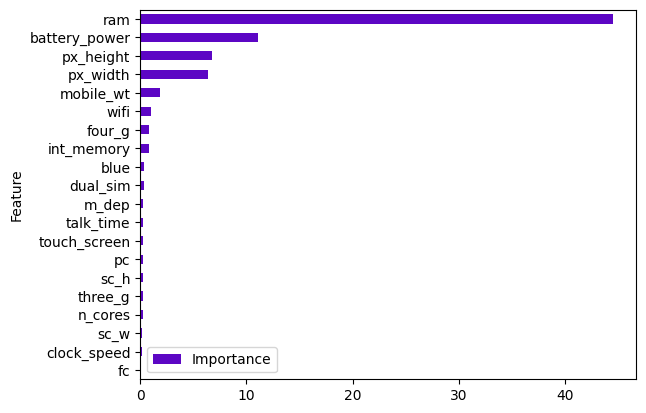

In [ ]:
#ploting importance
log_feature_importance.plot.barh(x='Feature',y='Importance',color='#5c06c4');

In [ ]:
log_feature_importance .sort_values(by=['Importance'],ascending=False,inplace=True)

###Ranking Features

In [ ]:
log_feature_importance['rank']=log_feature_importance['Importance'].rank(ascending=False)

In [ ]:
log_feature_importance

Feature  Importance  rank
9             ram   44.504954   1.0
0   battery_power   11.093017   2.0
7       px_height    6.710726   3.0
8        px_width    6.419489   4.0
5       mobile_wt    1.873973   5.0
19           wifi    1.052683   6.0
15         four_g    0.804244   7.0
3      int_memory    0.776022   8.0
13           blue    0.356150   9.0
14       dual_sim    0.329839  10.0
4           m_dep    0.288565  11.0
12      talk_time    0.267751  12.0
18   touch_screen    0.267597  13.0
6              pc    0.242932  14.0
10           sc_h    0.240826  15.0
17        three_g    0.219840  16.0
16        n_cores    0.218147  17.0
11           sc_w    0.177305  18.0
1     clock_speed    0.146884  19.0
2              fc    0.069499  20.0

In [ ]:
#confusion matrix
confusion_matrix_log_std=pd.DataFrame(confusion_matrix(y_test_std,y_pred_log['test']),columns=['predict 0','predict 1','predict 2','predict 3'])
confusion_matrix_log_std.index=['true 0','true 1','true 2','true 3']
confusion_matrix_log_std

predict 0  predict 1  predict 2  predict 3
true 0        127          5          0          0
true 1          0        118          0          0
true 2          0          2        115          3
true 3          0          0          2        128

In [ ]:
#display classification report
print(classification_report(y_test_std,y_pred_log['test']))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       132
           1       0.94      1.00      0.97       118
           2       0.98      0.96      0.97       120
           3       0.98      0.98      0.98       130

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



###1.2.4 Learning curve Logistic Regression Model

In [ ]:
train_sizes,train_scores,test_scores=learning_curve(model_log_std,x_train_std,y_train_std,cv=10,scoring='accuracy',train_sizes=np.linspace(0.01, 1.0, 50))

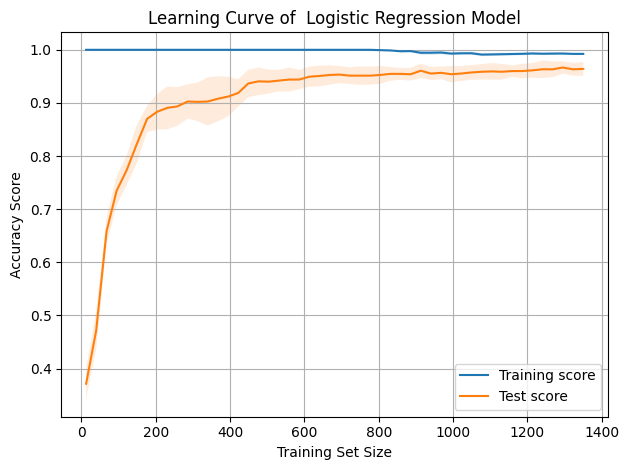

In [ ]:

# Mean and Standard Deviation of training scores
mean_training = np.mean(train_scores, axis=1)
Standard_Deviation_training = np.std(train_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(test_scores, axis=1)
Standard_Deviation_testing = np.std(test_scores, axis=1)

plt.plot(train_sizes, mean_training,  label="Training score")
plt.fill_between(train_sizes, mean_training+ Standard_Deviation_training, mean_training - Standard_Deviation_training, alpha=0.15, )
plt.plot(train_sizes, mean_testing,  label="Test score")
plt.fill_between(train_sizes, mean_testing +Standard_Deviation_testing, mean_testing  - Standard_Deviation_testing, alpha=0.15, )

# Drawing plot
plt.title("Learning Curve of  Logistic Regression Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()

###2.1KNN Model on MinMax Scaled Data

KNN (LAZY LEARN ALGORITHM)-It will not create model when training data is given ,model is created while testing

In [ ]:
x_min=x_minmax.drop('price_range',axis=1)#features
y_min=x_minmax['price_range']#target
x_train_min,x_test_min,y_train_min,y_test_min=train_test_split(x_min,y_min,test_size=0.25,random_state=42)

In [ ]:
#function for knn model creation on minmax scaled data
def knn_min(x_train_min,x_test_min,y_train_min,y_test_min):
  metric_k= []#empty list for appending accuracy of model for each k values
  neighbors = np.arange(3, 20)#k value from 3 to 19

  for k in neighbors:
    #creating an instance of knn
    knn_clf=KNeighborsClassifier(n_neighbors=k)
    model_knn_min=knn_clf.fit(x_train_min,y_train_min)#model creation
    y_pred_knn_min=model_knn_min.predict(x_test_min)#prediction
    acc_knn_min=accuracy_score(y_test_min,y_pred_knn_min)#accuracy score
    metric_k.append(acc_knn_min)#appending accuracy of model for each k values

  return metric_k

In [ ]:
score_knn_min=knn_min(x_train_min,x_test_min,y_train_min,y_test_min)

In [ ]:
print('The  accuracy score of K Nearest Neighbors  Model on test(MinMax Scaled) data is',score_knn_min)

The  accuracy score of K Nearest Neighbors  Model on test(MinMax Scaled) data is [0.372, 0.382, 0.386, 0.39, 0.396, 0.396, 0.386, 0.394, 0.364, 0.38, 0.368, 0.382, 0.378, 0.4, 0.392, 0.412, 0.402]


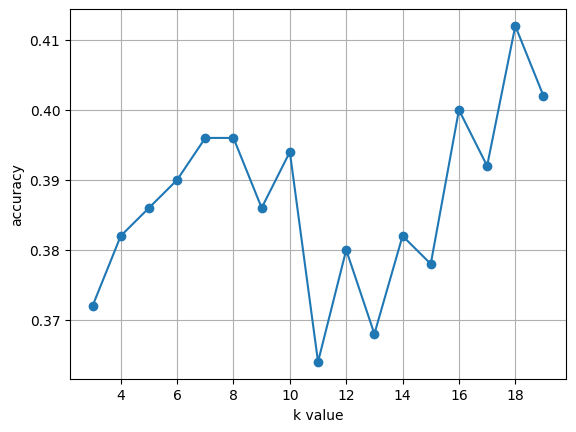

In [ ]:
#Ploting line graph of accuracy of model for each value of k

neighbors = np.arange(3, 20)#k value from 3 to 19
plt.plot(neighbors,score_knn_min,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
#accuracy is more for k=18,so creating model using k=18
def knn_min(x_train_min,x_test_min,y_train_min,y_test_min):



    #creating an instance of knn
    knn_clf=KNeighborsClassifier(n_neighbors=18)
    model_knn_min=knn_clf.fit(x_train_min,y_train_min)#model creation
    y_pred_knn_min=model_knn_min.predict(x_test_min)#prediction
    acc_knn_min=accuracy_score(y_test_min,y_pred_knn_min)#test accuracy score calculation
    train_score_knn_min=knn_clf.score(x_train_min,y_train_min)#training score
    return train_score_knn_min,acc_knn_min

In [ ]:
score_knn_min=knn_min(x_train_min,x_test_min,y_train_min,y_test_min)

In [ ]:
print('The  training accuracy score of K Nearest Neighbors  Model on test(MinMAx Scaled) data is',score_knn_min[0]*100)
print('The  accuracy score of K Nearest Neighbors  Model on test(MinMax Scaled) data is',score_knn_min[1]*100)

The  training accuracy score of K Nearest Neighbors  Model on test(MinMAx Scaled) data is 55.93333333333334
The  accuracy score of K Nearest Neighbors  Model on test(MinMax Scaled) data is 41.199999999999996


##2.1.1) K fold Cross Validation of K Nearest Neighbors Model (since it is a balanced model) on MinMax Scaled data

In [ ]:
#fucntion for knn model cross validation on minmax scaled data
def cv_knn_min(x_train_min,y_train_min):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  knn_clf=KNeighborsClassifier(n_neighbors=18)#instance of knn classifier
  model_knn_min=knn_clf.fit(x_train_min,y_train_min)#model creation
  cv_result_knn_min=cross_val_score(model_knn_min,x_train_min,y_train_min,cv=kfold_validator)#cross value score calculation
  return cv_result_knn_min

In [ ]:
cv_result_knn_min=cv_knn_min(x_train_min,y_train_min)
print('The KFold Cross Validation Score of K Nearest Neighbors  Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_knn_min)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of K Nearest Neighbors  Model(on MinMax Scaled Data ) is :  41.8


###2.2 KNN Model on Standard Scaled Data

In [ ]:
x_log_std=x_std.drop('price_range',axis=1)#features
y_log_std=x_std['price_range']#target
x_train_std,x_test_std,y_train_std,y_test_std=train_test_split(x_log_std,y_log_std,test_size=0.25,random_state=42)

In [ ]:
#function for knn model creation on standard scaled data
def knn_std(x_train_std,x_test_std,y_train_std,y_test_std):
  metric_k= []#empty list for appending accuracy of model for each k values
  neighbors = np.arange(3, 20)#k value from 3 to 19

  for k in neighbors:
    #creating an instance of knn
    knn_clf=KNeighborsClassifier(n_neighbors=k)
    model_knn_std=knn_clf.fit(x_train_std,y_train_std)#model creation
    y_pred_knn_std=model_knn_std.predict(x_test_std)#prediction
    acc_knn_std=accuracy_score(y_test_std,y_pred_knn_std)
    metric_k.append(acc_knn_std)#appending accuracy of model for each k values

  return metric_k

In [ ]:
score_knn_std=knn_std(x_train_std,x_test_std,y_train_std,y_test_std)

In [ ]:
print('The  accuracy score of K Nearest Neighbors  Model on test(MinMax Scaled) data is',score_knn_std)

The  accuracy score of K Nearest Neighbors  Model on test(MinMax Scaled) data is [0.512, 0.548, 0.586, 0.57, 0.598, 0.622, 0.624, 0.628, 0.626, 0.63, 0.626, 0.64, 0.62, 0.642, 0.632, 0.64, 0.634]


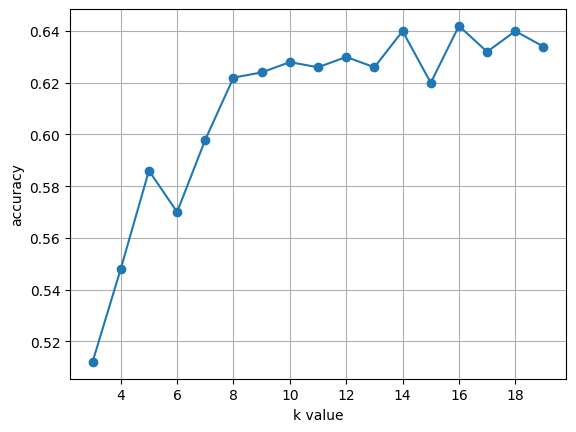

In [ ]:
#Ploting line graph of accuracy of model for each value of k

neighbors = np.arange(3, 20)#k value from 3 to 19
plt.plot(neighbors,score_knn_std,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()


In [ ]:
#accuracy is more for k=16,so creating model using k=16
def knn_std(x_train_std,x_test_std,y_train_std,y_test_std):



    #creating an instance of knn
    knn_clf=KNeighborsClassifier(n_neighbors=16)
    model_knn_std=knn_clf.fit(x_train_std,y_train_std)
    y_pred_knn_std=model_knn_std.predict(x_test_std)
    acc_knn_std=accuracy_score(y_test_std,y_pred_knn_std)
    train_score_knn_std=knn_clf.score(x_train_std,y_train_std)
    return train_score_knn_std,acc_knn_std

In [ ]:
score_knn_std=knn_std(x_train_std,x_test_std,y_train_std,y_test_std)

In [ ]:
print('The  training accuracy score of K Nearest Neighbors  Model on test(Standard Scaled) data is',score_knn_std[0]*100)
print('The  accuracy score of K Nearest Neighbors  Model on test(Standard Scaled) data is',score_knn_std[1]*100)

The  training accuracy score of K Nearest Neighbors  Model on test(Standard Scaled) data is 69.26666666666667
The  accuracy score of K Nearest Neighbors  Model on test(Standard Scaled) data is 64.2


##2.2.1) K fold Cross Validation of K Nearest Neighbors Model (since it is a balanced model) on Standard Scaled data

In [ ]:
#function for cross knn cross validation on standard scaled data
def cv_knn_std(x_train_std,y_train_std):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  knn_clf=KNeighborsClassifier(n_neighbors=16)
  model_knn_std=knn_clf.fit(x_train_std,y_train_std)
  cv_result_knn_std=cross_val_score(model_knn_std,x_train_std,y_train_std,cv=kfold_validator)
  return cv_result_knn_std

In [ ]:
cv_result_knn_std=cv_knn_std(x_train_std,y_train_std)
print('The KFold Cross Validation Score of K Nearest Neighbors Model(on Standard Scaled Data ) is : ',np.mean(cv_result_knn_std)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of K Nearest Neighbors Model(on Standard Scaled Data ) is :  60.399999999999984


###2.2.2 Fine Tuning of KNN Model

In [ ]:
kfold_validator=KFold(10,shuffle=True,random_state=42)
# Create a GridSearchCV object
knn_clf=KNeighborsClassifier(n_neighbors=16)
# defining parameter range
param_grid = { 'n_neighbors' : [3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}


In [ ]:
grid_knn_std= GridSearchCV(knn_clf, param_grid = param_grid, verbose = 3, cv=kfold_validator, n_jobs = -1) # -1 means using all processors

In [ ]:
# fitting the training data
grid_knn_std.fit(x_train_std, y_train_std)

Fitting 10 folds for each of 504 candidates, totalling 5040 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=16), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [ ]:
print_results(grid_knn_std)

BEST PARAMS: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 43, 'weights': 'distance'}

0.496 (+/-0.112) for {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}
0.535 (+/-0.102) for {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}
0.545 (+/-0.098) for {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
0.545 (+/-0.101) for {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.547 (+/-0.075) for {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'}
0.562 (+/-0.068) for {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}
0.579 (+/-0.096) for {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}
0.587 (+/-0.075) for {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}
0.581 (+/-0.092) for {'algorithm': 'auto', 'met

###2.2.3 KNN Model Evalution

###Accuracy scores of top few models:-

0.705 (+/-0.063) for {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 39, 'weights': 'distance'}

0.705 (+/-0.063) for {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 39, 'weights': 'distance'}

0.706 (+/-0.066) for {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 41, 'weights': 'distance'}

0.706 (+/-0.066) for {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 41, 'weights': 'distance'}

0.706 (+/-0.066) for {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 41, 'weights': 'distance'}

0.711 (+/-0.083) for {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 43, 'weights': 'uniform'}


0.711 (+/-0.083) for {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 43, 'weights': 'uniform'}

0.711 (+/-0.083) for {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 43, 'weights': 'uniform'}

0.714 (+/-0.084) for {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 41, 'weights': 'uniform'}

0.714 (+/-0.084) for {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 41, 'weights': 'uniform'}

0.714 (+/-0.084) for {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 41, 'weights': 'uniform'}

0.715 (+/-0.076) for {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 43, 'weights': 'distance'}

0.715 (+/-0.076) for {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 43, 'weights': 'distance'}

0.715 (+/-0.076) for {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 43, 'weights': 'distance'}

In [ ]:
#model buliding using top few models
model_knn_std1=KNeighborsClassifier(algorithm='ball_tree',metric='manhattan',n_neighbors=39,weights='distance').fit(x_train_std,y_train_std)
model_knn_std2=KNeighborsClassifier(algorithm='brute',metric='manhattan',n_neighbors=39,weights='distance').fit(x_train_std,y_train_std)
model_knn_std3=KNeighborsClassifier(algorithm='auto',metric='manhattan',n_neighbors=41,weights='distance').fit(x_train_std,y_train_std)
model_knn_std4=KNeighborsClassifier(algorithm='brute',metric='manhattan',n_neighbors=41,weights='distance').fit(x_train_std,y_train_std)
model_knn_std5=KNeighborsClassifier(algorithm='ball_tree',metric='manhattan',n_neighbors=41,weights='distance').fit(x_train_std,y_train_std)
model_knn_std6=KNeighborsClassifier(algorithm='ball_tree',metric='manhattan',n_neighbors=43,weights='uniform').fit(x_train_std,y_train_std)
model_knn_std7=KNeighborsClassifier(algorithm='auto',metric='manhattan',n_neighbors=43,weights='uniform').fit(x_train_std,y_train_std)
model_knn_std8=KNeighborsClassifier(algorithm='brute',metric='manhattan',n_neighbors=43,weights='uniform').fit(x_train_std,y_train_std)
model_knn_std9=KNeighborsClassifier(algorithm='brute',metric='manhattan',n_neighbors=41,weights='uniform').fit(x_train_std,y_train_std)
model_knn_std10=KNeighborsClassifier(algorithm='ball_tree',metric='manhattan',n_neighbors=41,weights='uniform').fit(x_train_std,y_train_std)
model_knn_std11=KNeighborsClassifier(algorithm='auto',metric='manhattan',n_neighbors=41,weights='uniform').fit(x_train_std,y_train_std)
model_knn_std12=KNeighborsClassifier(algorithm='ball_tree',metric='manhattan',n_neighbors=43,weights='distance').fit(x_train_std,y_train_std)
model_knn_std13=KNeighborsClassifier(algorithm='brute',metric='manhattan',n_neighbors=43,weights='distance').fit(x_train_std,y_train_std)
model_knn_std14=KNeighborsClassifier(algorithm='auto',metric='manhattan',n_neighbors=43,weights='distance').fit(x_train_std,y_train_std)

In [ ]:
#printing the test accuracy score for top few models
for model in [model_knn_std1,model_knn_std2,model_knn_std3,model_knn_std4,model_knn_std5,model_knn_std6,model_knn_std7,model_knn_std8,model_knn_std9,model_knn_std10,model_knn_std11,model_knn_std12,model_knn_std13,model_knn_std14,]:
  y_pred_knn_std=model.predict(x_test_std)
  accuracy=accuracy_score(y_test_std,y_pred_knn_std)
  print('algorithm:{} / metric:{} / neighbors:{} / weights:{} -- A:{}'.format(model.algorithm,model.metric,model.n_neighbors,model.weights,accuracy))

algorithm:ball_tree / metric:manhattan / neighbors:39 / weights:distance -- A:0.734
algorithm:brute / metric:manhattan / neighbors:39 / weights:distance -- A:0.734
algorithm:auto / metric:manhattan / neighbors:41 / weights:distance -- A:0.73
algorithm:brute / metric:manhattan / neighbors:41 / weights:distance -- A:0.73
algorithm:ball_tree / metric:manhattan / neighbors:41 / weights:distance -- A:0.73
algorithm:ball_tree / metric:manhattan / neighbors:43 / weights:uniform -- A:0.736
algorithm:auto / metric:manhattan / neighbors:43 / weights:uniform -- A:0.736
algorithm:brute / metric:manhattan / neighbors:43 / weights:uniform -- A:0.736
algorithm:brute / metric:manhattan / neighbors:41 / weights:uniform -- A:0.73
algorithm:ball_tree / metric:manhattan / neighbors:41 / weights:uniform -- A:0.73
algorithm:auto / metric:manhattan / neighbors:41 / weights:uniform -- A:0.73
algorithm:ball_tree / metric:manhattan / neighbors:43 / weights:distance -- A:0.74
algorithm:brute / metric:manhattan /

In [ ]:
#best model prediction

#creating an instance and fit the training data
model_knn_std=KNeighborsClassifier(algorithm='ball_tree',metric='manhattan',n_neighbors=43,weights='distance').fit(x_train_std,y_train_std)

#Prediction
y_pred_knn={
    'train':model_knn_std.predict(x_train_std),
    'test':model_knn_std.predict(x_test_std)

}

#create train and test score

score_knn_std={
    'train':accuracy_score(y_train_std,y_pred_knn['train']),
    'test':accuracy_score(y_test_std,y_pred_knn['test'])
}

print('The training accuracy score for KNN Classifier model on standard scaled data is:',score_knn_std['train']*100)
print('The testing accuracy score for KNN Classifier model on standard scaled data is:',score_knn_std['test']*100)

The training accuracy score for KNN Classifier model on standard scaled data is: 100.0
The testing accuracy score for KNN Classifier model on standard scaled data is: 74.0


feature importance cannot be calculated for knn

In [ ]:
#confusion matrix
confusion_matrix_knn_std=pd.DataFrame(confusion_matrix(y_test_std,y_pred_knn['test']),columns=['predict 0','predict 1','predict 2','predict 3'])
confusion_matrix_knn_std.index=['true 0','true 1','true 2','true 3']
confusion_matrix_knn_std

predict 0  predict 1  predict 2  predict 3
true 0        105         27          0          0
true 1         22         80         16          0
true 2          1         26         82         11
true 3          0          1         26        103

In [ ]:
#display classification report
print(classification_report(y_test_std,y_pred_knn['test']))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       132
           1       0.60      0.68      0.63       118
           2       0.66      0.68      0.67       120
           3       0.90      0.79      0.84       130

    accuracy                           0.74       500
   macro avg       0.75      0.74      0.74       500
weighted avg       0.75      0.74      0.74       500



###2.2.4 Learning Curve of KNN model

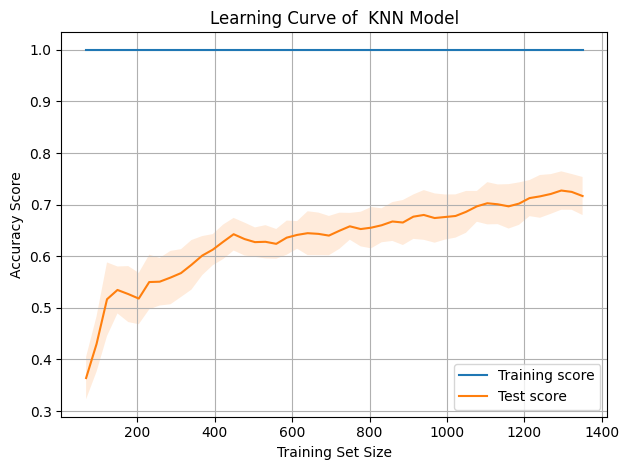

In [ ]:
train_sizes,train_scores,test_scores=learning_curve(model_knn_std,x_train_std,y_train_std,cv=10,scoring='accuracy',train_sizes=np.linspace(0.01, 1.0, 50))
# Mean and Standard Deviation of training scores
mean_training = np.mean(train_scores, axis=1)
Standard_Deviation_training = np.std(train_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(test_scores, axis=1)
Standard_Deviation_testing = np.std(test_scores, axis=1)

plt.plot(train_sizes, mean_training,  label="Training score")
plt.fill_between(train_sizes, mean_training+ Standard_Deviation_training, mean_training - Standard_Deviation_training, alpha=0.15, )
plt.plot(train_sizes, mean_testing,  label="Test score")
plt.fill_between(train_sizes, mean_testing +Standard_Deviation_testing, mean_testing  - Standard_Deviation_testing, alpha=0.15, )

# Drawing plot
plt.title("Learning Curve of  KNN Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()

###3.1 SVM (Support Vector Machine) Model on MinMax Scaled Data

In [ ]:
x_min=x_minmax.drop('price_range',axis=1)#features
y_min=x_minmax['price_range']#target
x_train_min,x_test_min,y_train_min,y_test_min=train_test_split(x_min,y_min,test_size=0.25,random_state=42)

In [ ]:
#function for svm model creation on minmax scaled data
def svm_min(x_train_min,x_test_min,y_train_min,y_test_min):
  #creating an instance of svm classifier
    svm_clf=SVC(kernel='rbf')
    model_svm_min=svm_clf.fit(x_train_min,y_train_min)
    y_pred_svm_min=model_svm_min.predict(x_test_min)
    test_svm_min=accuracy_score(y_test_min,y_pred_svm_min)
    train_score_svm_min=svm_clf.score(x_train_min,y_train_min)
    return train_score_svm_min,test_svm_min

In [ ]:
#printing training and test score
score_svm_min=svm_min(x_train_min,x_test_min,y_train_min,y_test_min)
print('The  training accuracy score of SVM Classifier  Model on test(MinMAx Scaled) data is',score_svm_min[0]*100)
print('The  accuracy score of SVM Classifier  Model on test(MinMax Scaled) data is',score_svm_min[1]*100)

The  training accuracy score of SVM Classifier  Model on test(MinMAx Scaled) data is 84.2
The  accuracy score of SVM Classifier  Model on test(MinMax Scaled) data is 80.4


###3.1.1 K fold Cross Validation of SVM Classifier Model (since it is a balanced model) on MinMax Scaled data

In [ ]:
#function for kfold cross validation of svm model using minmax scaled data
def cv_svm_min(x_train_min,y_train_min):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  svm_clf=SVC(kernel='rbf')
  model_svm_min=svm_clf.fit(x_train_min,y_train_min)
  cv_result_svm_min=cross_val_score(model_svm_min,x_train_min,y_train_min,cv=kfold_validator)
  return cv_result_svm_min

In [ ]:
#printing mean cross validation  score for svm
cv_result_svm_min=cv_svm_min(x_train_min,y_train_min)
print('The KFold Cross Validation Score of SVM Classifier  Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_svm_min)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of SVM Classifier  Model(on MinMax Scaled Data ) is :  77.86666666666666


###3.2 SVM (Support Vector Machine) Model on Standard Scaled Data

In [ ]:
x_log_std=x_std.drop('price_range',axis=1)#features
y_log_std=x_std['price_range']#target
x_train_std,x_test_std,y_train_std,y_test_std=train_test_split(x_log_std,y_log_std,test_size=0.25,random_state=42)

In [ ]:
#function for svm model creation using standard scaled data
def svm_std(x_train_std,x_test_std,y_train_std,y_test_std):
   #creating an instance of svm classifier
    svm_clf=SVC(kernel='rbf')
    model_svm_std=svm_clf.fit(x_train_std,y_train_std)
    y_pred_svm_std=model_svm_std.predict(x_test_std)
    test_svm_std=accuracy_score(y_test_std,y_pred_svm_std)
    train_score_svm_std=svm_clf.score(x_train_std,y_train_std)
    return train_score_svm_std,test_svm_std

In [ ]:
#printing the training and test accuracy score of svm model
score_svm_std=svm_std(x_train_std,x_test_std,y_train_std,y_test_std)
print('The  training accuracy score of SVM Classifier  Model on test(Standard Scaled) data is',score_svm_std[0]*100)
print('The  accuracy score of SVM Classifier  Model on test(Standard Scaled) data is',score_svm_std[1]*100)

The  training accuracy score of SVM Classifier  Model on test(Standard Scaled) data is 96.39999999999999
The  accuracy score of SVM Classifier  Model on test(Standard Scaled) data is 91.2


###3.2.1 K fold Cross Validation of SVM Classifier Model (since it is a balanced model) on Standard Scaled data

In [ ]:
#fucntion for kfold cross validation
def cv_svm_std(x_train_std,y_train_std):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  svm_clf=SVC(kernel='rbf')
  model_svm_std=svm_clf.fit(x_train_std,y_train_std)
  cv_result_svm_std=cross_val_score(model_svm_std,x_train_std,y_train_std,cv=kfold_validator)
  return cv_result_svm_std

In [ ]:
cv_result_svm_std=cv_svm_std(x_train_std,y_train_std)
print('The KFold Cross Validation Score of SVM Classifier Model(on Standard Scaled Data ) is : ',np.mean(cv_result_svm_std)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of SVM Classifier Model(on Standard Scaled Data ) is :  90.26666666666668


3.2.2 Fine Tuning of SVM Model

In [ ]:
svm_clf_std=SVC()
kfold_validator=KFold(10,shuffle=True,random_state=42)
# defining parameter range
param_grid = {'C': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4, 1e5],
              'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': [ 'rbf','linear']}

In [ ]:
# Create a GridSearchCV object
grid_svm = GridSearchCV(svm_clf_std, param_grid= param_grid , refit = True, verbose = 3, n_jobs=-1, cv=kfold_validator)

In [ ]:
# fitting the training data
grid_svm.fit(x_train_std, y_train_std)

Fitting 10 folds for each of 154 candidates, totalling 1540 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0,
                               1000.0, 10000.0, 100000.0],
                         'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [ ]:
# calling function
print_results(grid_svm)

BEST PARAMS: {'C': 10000.0, 'gamma': 0.0001, 'kernel': 'rbf'}

0.234 (+/-0.052) for {'C': 1e-05, 'gamma': 100, 'kernel': 'rbf'}
0.234 (+/-0.052) for {'C': 1e-05, 'gamma': 100, 'kernel': 'linear'}
0.234 (+/-0.052) for {'C': 1e-05, 'gamma': 10, 'kernel': 'rbf'}
0.234 (+/-0.052) for {'C': 1e-05, 'gamma': 10, 'kernel': 'linear'}
0.234 (+/-0.052) for {'C': 1e-05, 'gamma': 1, 'kernel': 'rbf'}
0.234 (+/-0.052) for {'C': 1e-05, 'gamma': 1, 'kernel': 'linear'}
0.234 (+/-0.052) for {'C': 1e-05, 'gamma': 0.1, 'kernel': 'rbf'}
0.234 (+/-0.052) for {'C': 1e-05, 'gamma': 0.1, 'kernel': 'linear'}
0.234 (+/-0.052) for {'C': 1e-05, 'gamma': 0.01, 'kernel': 'rbf'}
0.234 (+/-0.052) for {'C': 1e-05, 'gamma': 0.01, 'kernel': 'linear'}
0.234 (+/-0.052) for {'C': 1e-05, 'gamma': 0.001, 'kernel': 'rbf'}
0.234 (+/-0.052) for {'C': 1e-05, 'gamma': 0.001, 'kernel': 'linear'}
0.234 (+/-0.052) for {'C': 1e-05, 'gamma': 0.0001, 'kernel': 'rbf'}
0.234 (+/-0.052) for {'C': 1e-05, 'gamma': 0.0001, 'kernel': 'linear'}


###3.2.3 SVC Model Evalution

###Accuracy scores of top few models:-

0.915 (+/-0.047) for {'C': 10000.0, 'gamma': 0.01, 'kernel': 'rbf'}

0.923 (+/-0.064) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

0.927 (+/-0.059) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

0.945 (+/-0.033) for {'C': 10000.0, 'gamma': 0.001, 'kernel': 'rbf'}

0.947 (+/-0.034) for {'C': 100000.0, 'gamma': 0.001, 'kernel': 'rbf'}

0.955 (+/-0.029) for {'C': 100000.0, 'gamma': 0.0001, 'kernel': 'rbf'}

0.959 (+/-0.03) for {'C': 10000.0, 'gamma': 0.0001, 'kernel': 'linear'}

0.959 (+/-0.028) for {'C': 100000.0, 'gamma': 0.01, 'kernel': 'linear'}

0.959 (+/-0.029) for {'C': 100.0, 'gamma': 100, 'kernel': 'linear'}

0.959 (+/-0.028) for {'C': 100000.0, 'gamma': 0.0001, 'kernel': 'linear'}

0.959 (+/-0.028) for {'C': 100000.0, 'gamma': 0.001, 'kernel': 'linear'}

0.959 (+/-0.029) for {'C': 100.0, 'gamma': 10, 'kernel': 'linear'}

0.959 (+/-0.03) for {'C': 10000.0, 'gamma': 0.1, 'kernel': 'linear'}

0.959 (+/-0.03) for {'C': 10000.0, 'gamma': 0.01, 'kernel': 'linear'}

0.959 (+/-0.03) for {'C': 10000.0, 'gamma': 0.001, 'kernel': 'linear'}

0.961 (+/-0.034) for {'C': 10, 'gamma': 1, 'kernel': 'linear'}

0.961 (+/-0.034) for {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

0.961 (+/-0.034) for {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

0.961 (+/-0.034) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}

0.961 (+/-0.034) for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}

0.962 (+/-0.035) for {'C': 10000.0, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:
#model buliding using top few models
model_svm_std1=SVC(C=10000,gamma=.01,kernel='rbf').fit(x_train_std,y_train_std)
model_svm_std2=SVC(C=10,gamma=.01,kernel='rbf').fit(x_train_std,y_train_std)
model_svm_std3=SVC(C=10,gamma=.001,kernel='rbf').fit(x_train_std,y_train_std)
model_svm_std4=SVC(C=10000,gamma=.001,kernel='rbf').fit(x_train_std,y_train_std)
model_svm_std5=SVC(C=100000,gamma=.001,kernel='rbf').fit(x_train_std,y_train_std)
model_svm_std6=SVC(C=100000,gamma=.0001,kernel='rbf').fit(x_train_std,y_train_std)
model_svm_std7=SVC(C=10000,gamma=.0001,kernel='linear').fit(x_train_std,y_train_std)
model_svm_std8=SVC(C=100000,gamma=.01,kernel='linear').fit(x_train_std,y_train_std)
model_svm_std9=SVC(C=100,gamma=100,kernel='linear').fit(x_train_std,y_train_std)
model_svm_std10=SVC(C=100000,gamma=.0001,kernel='linear').fit(x_train_std,y_train_std)
model_svm_std11=SVC(C=100000,gamma=.001,kernel='linear').fit(x_train_std,y_train_std)
model_svm_std12=SVC(C=100,gamma=10,kernel='linear').fit(x_train_std,y_train_std)
model_svm_std13=SVC(C=10000,gamma=.1,kernel='linear').fit(x_train_std,y_train_std)
model_svm_std14=SVC(C=10000,gamma=.01,kernel='linear').fit(x_train_std,y_train_std)
model_svm_std15=SVC(C=10000,gamma=.001,kernel='linear').fit(x_train_std,y_train_std)
model_svm_std16=SVC(C=10,gamma=1,kernel='linear').fit(x_train_std,y_train_std)
model_svm_std17=SVC(C=10,gamma=.1,kernel='linear').fit(x_train_std,y_train_std)
model_svm_std18=SVC(C=10,gamma=.01,kernel='linear').fit(x_train_std,y_train_std)
model_svm_std19=SVC(C=10,gamma=.001,kernel='linear').fit(x_train_std,y_train_std)
model_svm_std20=SVC(C=10,gamma=.0001,kernel='linear').fit(x_train_std,y_train_std)
model_svm_std21=SVC(C=10000,gamma=.0001,kernel='rbf').fit(x_train_std,y_train_std)


In [ ]:
#printing the test accuracy score for top few models
for model in [model_svm_std1,model_svm_std2,model_svm_std3,model_svm_std4,model_svm_std5,model_svm_std6,model_svm_std7,model_svm_std8,model_svm_std9,model_svm_std10,model_svm_std11,model_svm_std12,model_svm_std13,model_svm_std14,model_svm_std15,model_svm_std16,model_svm_std17,model_svm_std18,model_svm_std19,model_svm_std20,model_svm_std21,]:
  y_pred_svm_std=model.predict(x_test_std)
  accuracy=accuracy_score(y_test_std,y_pred_svm_std)
  print('c:{} / gamma:{} / kernel:{}  -- A:{}'.format(model.C,model.gamma,model.kernel,accuracy))

c:10000 / gamma:0.01 / kernel:rbf  -- A:0.924
c:10 / gamma:0.01 / kernel:rbf  -- A:0.914
c:10 / gamma:0.001 / kernel:rbf  -- A:0.922
c:10000 / gamma:0.001 / kernel:rbf  -- A:0.944
c:100000 / gamma:0.001 / kernel:rbf  -- A:0.94
c:100000 / gamma:0.0001 / kernel:rbf  -- A:0.954
c:10000 / gamma:0.0001 / kernel:linear  -- A:0.964
c:100000 / gamma:0.01 / kernel:linear  -- A:0.964
c:100 / gamma:100 / kernel:linear  -- A:0.976
c:100000 / gamma:0.0001 / kernel:linear  -- A:0.964
c:100000 / gamma:0.001 / kernel:linear  -- A:0.964
c:100 / gamma:10 / kernel:linear  -- A:0.976
c:10000 / gamma:0.1 / kernel:linear  -- A:0.964
c:10000 / gamma:0.01 / kernel:linear  -- A:0.964
c:10000 / gamma:0.001 / kernel:linear  -- A:0.964
c:10 / gamma:1 / kernel:linear  -- A:0.966
c:10 / gamma:0.1 / kernel:linear  -- A:0.966
c:10 / gamma:0.01 / kernel:linear  -- A:0.966
c:10 / gamma:0.001 / kernel:linear  -- A:0.966
c:10 / gamma:0.0001 / kernel:linear  -- A:0.966
c:10000 / gamma:0.0001 / kernel:rbf  -- A:0.954


In [ ]:
#best model prediction

#creating an instance and fit the training data
model_svm_std=SVC(C=100,gamma=100,kernel='linear').fit(x_train_std,y_train_std).fit(x_train_std,y_train_std)

#Prediction
y_pred_svm_std={
    'train':model_svm_std.predict(x_train_std),
    'test':model_svm_std.predict(x_test_std)

}

#create train and test score

score_svm_std={
    'train':accuracy_score(y_train_std,y_pred_svm_std['train']),
    'test':accuracy_score(y_test_std,y_pred_svm_std['test'])
}

print('The training accuracy score for SVC model on standard scaled data is:',score_svm_std['train']*100)
print('The testing accuracy score for SVC model on standard scaled data is:',score_svm_std['test']*100)

The training accuracy score for SVC model on standard scaled data is: 98.8
The testing accuracy score for SVC model on standard scaled data is: 97.6


In [ ]:
#feature importance for SVC is possible only  when kernel='linear'
coefficients = model_svm_std.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
svm_feature_importance = pd.DataFrame({'Feature': x_train_std.columns, 'Importance': avg_importance})
svm_feature_importance = svm_feature_importance.sort_values('Importance', ascending=True)


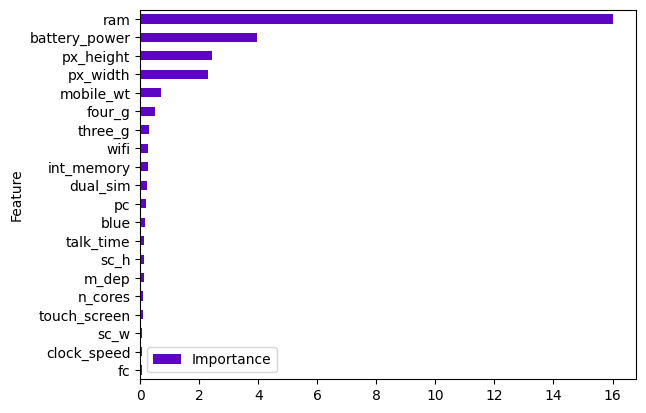

In [ ]:
#ploting importance
svm_feature_importance.plot.barh(x='Feature',y='Importance',color='#5c06c4');

###Ranking Features

In [ ]:
svm_feature_importance .sort_values(by=['Importance'],ascending=False,inplace=True)

In [ ]:
svm_feature_importance['rank']=log_feature_importance['Importance'].rank(ascending=False)

In [ ]:
svm_feature_importance

Feature  Importance  rank
9             ram   16.005253   1.0
0   battery_power    3.945203   2.0
7       px_height    2.420713   3.0
8        px_width    2.308351   4.0
5       mobile_wt    0.708784   5.0
15         four_g    0.495516   7.0
17        three_g    0.281223  16.0
19           wifi    0.254289   6.0
3      int_memory    0.249085   8.0
14       dual_sim    0.215481  10.0
6              pc    0.191936  14.0
13           blue    0.170799   9.0
12      talk_time    0.135067  12.0
10           sc_h    0.132829  15.0
4           m_dep    0.110693  11.0
16        n_cores    0.088244  17.0
18   touch_screen    0.087926  13.0
11           sc_w    0.069007  18.0
1     clock_speed    0.055062  19.0
2              fc    0.047879  20.0

In [ ]:
#confusion matrix
confusion_matrix_svm_std=pd.DataFrame(confusion_matrix(y_test_std,y_pred_svm_std['test']),columns=['predict 0','predict 1','predict 2','predict 3'])
confusion_matrix_svm_std.index=['true 0','true 1','true 2','true 3']
confusion_matrix_svm_std

predict 0  predict 1  predict 2  predict 3
true 0        127          5          0          0
true 1          0        118          0          0
true 2          0          3        114          3
true 3          0          0          1        129

In [ ]:
#display classification report
print(classification_report(y_test_std,y_pred_svm_std['test']))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       132
           1       0.94      1.00      0.97       118
           2       0.99      0.95      0.97       120
           3       0.98      0.99      0.98       130

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



###3.2.4 Learning Curve of SVM Classifier Model

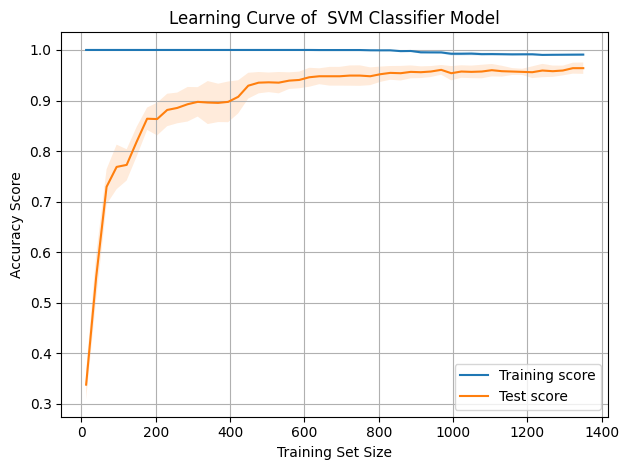

In [ ]:
train_sizes,train_scores,test_scores=learning_curve(model_svm_std,x_train_std,y_train_std,cv=10,scoring='accuracy',train_sizes=np.linspace(0.01, 1.0, 50))
# Mean and Standard Deviation of training scores
mean_training = np.mean(train_scores, axis=1)
Standard_Deviation_training = np.std(train_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(test_scores, axis=1)
Standard_Deviation_testing = np.std(test_scores, axis=1)

plt.plot(train_sizes, mean_training,  label="Training score")
plt.fill_between(train_sizes, mean_training+ Standard_Deviation_training, mean_training - Standard_Deviation_training, alpha=0.15, )
plt.plot(train_sizes, mean_testing,  label="Test score")
plt.fill_between(train_sizes, mean_testing +Standard_Deviation_testing, mean_testing  - Standard_Deviation_testing, alpha=0.15, )

# Drawing plot
plt.title("Learning Curve of  SVM Classifier Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()

###4.1 Decision Tree Model on MinMax Scaled Data

In [ ]:
x_min=x_minmax.drop('price_range',axis=1)
y_min=x_minmax['price_range']
x_train_min,x_test_min,y_train_min,y_test_min=train_test_split(x_min,y_min,test_size=0.25,random_state=42)

In [ ]:
def dt_min(x_train_min,x_test_min,y_train_min,y_test_min):
    #creating an instance of decision tree classifier
    dt_clf=DecisionTreeClassifier(random_state=42)
    model_dt_min=dt_clf.fit(x_train_min,y_train_min)
    y_pred_dt_min=model_dt_min.predict(x_test_min)
    test_dt_min=accuracy_score(y_test_min,y_pred_dt_min)
    train_score_dt_min=dt_clf.score(x_train_min,y_train_min)
    return train_score_dt_min,test_dt_min

In [ ]:
score_dt_min=dt_min(x_train_min,x_test_min,y_train_min,y_test_min)
print('The  training accuracy score of Decision Tree Classifier  Model on test(MinMAx Scaled) data is',score_dt_min[0]*100)
print('The  accuracy score of Decision Tree  Classifier  Model on test(MinMax Scaled) data is',score_dt_min[1]*100)

The  training accuracy score of Decision Tree Classifier  Model on test(MinMAx Scaled) data is 100.0
The  accuracy score of Decision Tree  Classifier  Model on test(MinMax Scaled) data is 81.0


###4.1.1 K fold Cross Validation of Decision Tree Classifier Model (since it is a balanced model) on MinMax Scaled data

In [ ]:
def cv_dt_min(x_train_min,y_train_min):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  dt_clf=DecisionTreeClassifier(random_state=42)
  model_dt_min=dt_clf.fit(x_train_min,y_train_min)
  cv_result_dt_min=cross_val_score(model_dt_min,x_train_min,y_train_min,cv=kfold_validator)
  return cv_result_dt_min

In [ ]:
cv_result_dt_min=cv_dt_min(x_train_min,y_train_min)
print('The KFold Cross Validation Score of Decision Tree  Classifier  Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_dt_min)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of Decision Tree  Classifier  Model(on MinMax Scaled Data ) is :  83.2


###4.2 Decision Tree Model on Standard Scaled Data

In [ ]:
x_log_std=x_std.drop('price_range',axis=1)
y_log_std=x_std['price_range']
x_train_std,x_test_std,y_train_std,y_test_std=train_test_split(x_log_std,y_log_std,test_size=0.25,random_state=42)

In [ ]:

def dt_std(x_train_std,x_test_std,y_train_std,y_test_std):
    #creating an instance of decision tree classifier
    dt_clf=DecisionTreeClassifier(random_state=42)
    model_dt_std=dt_clf.fit(x_train_std,y_train_std)
    y_pred_dt_std=model_dt_std.predict(x_test_std)
    test_dt_std=accuracy_score(y_test_std,y_pred_dt_std)
    train_score_dt_std=dt_clf.score(x_train_std,y_train_std)
    return train_score_dt_std,test_dt_std

In [ ]:
score_dt_std=dt_std(x_train_std,x_test_std,y_train_std,y_test_std)
print('The  training accuracy score of Decision Tree Classifier  Model on test(Standard Scaled) data is',score_dt_std[0]*100)
print('The  accuracy score of Decision Tree Classifier  Model on test(Standard Scaled) data is',score_dt_std[1]*100)

The  training accuracy score of Decision Tree Classifier  Model on test(Standard Scaled) data is 100.0
The  accuracy score of Decision Tree Classifier  Model on test(Standard Scaled) data is 80.80000000000001


###4.2.1 K fold Cross Validation of Decision Tree Classifier Model (since it is a balanced model) on Standard Scaled data

In [ ]:
def cv_dt_std(x_train_std,y_train_std):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  dt_clf=DecisionTreeClassifier(random_state=42)
  model_dt_std=dt_clf.fit(x_train_std,y_train_std)
  cv_result_dt_std=cross_val_score(model_dt_std,x_train_std,y_train_std,cv=kfold_validator)
  return cv_result_dt_std

In [ ]:
cv_result_dt_std=cv_dt_std(x_train_std,y_train_std)
print('The KFold Cross Validation Score of Decision Tree Classifier Model(on Standard Scaled Data ) is : ',np.mean(cv_result_dt_std)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of Decision Tree Classifier Model(on Standard Scaled Data ) is :  83.06666666666666


###4.2.2 Fine Tuning of Decision Tree Model

In [ ]:
dt_clf_std=DecisionTreeClassifier()
# defining parameter range
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
            'min_samples_leaf': [1, 5, 10, 20, 50, 100],
            'criterion': ["gini", "entropy"]}
kfold_validator=KFold(10,shuffle=True,random_state=42)

In [ ]:
grid_dt_std=GridSearchCV(dt_clf_std,param_grid=param_grid,refit=True,verbose=3,n_jobs=-1,cv=kfold_validator)

In [ ]:
best_dt_std=grid_dt_std.fit(x_train_std,y_train_std)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


In [ ]:
print_results(grid_dt_std)

BEST PARAMS: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1}

0.492 (+/-0.113) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
0.492 (+/-0.113) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 5}
0.492 (+/-0.113) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10}
0.492 (+/-0.113) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 20}
0.492 (+/-0.113) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 50}
0.492 (+/-0.113) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 100}
0.757 (+/-0.06) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}
0.757 (+/-0.06) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
0.757 (+/-0.06) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.757 (+/-0.06) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}
0.757 (+/-0.06) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 50}
0.757 (+/-0.06) 

###4.2.3 Decision Tree Model Evaluation

###Accuracy scores of top few models:-

0.865 (+/-0.037) for {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 5}  

0.865 (+/-0.042) for {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 10}

0.863 (+/-0.037) for {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 10}

0.861 (+/-0.057) for {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 5}

0.861 (+/-0.057) for {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 5}

0.859 (+/-0.066) for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

0.858 (+/-0.069) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5}

0.855 (+/-0.057) for {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}


0.854 (+/-0.059) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5}

0.847 (+/-0.053) for {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5}


0.843 (+/-0.06) for {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5}

0.84 (+/-0.055) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1}

0.84 (+/-0.027) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}


0.835 (+/-0.078) for {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1}

0.833 (+/-0.038) for {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10}

0.831 (+/-0.072) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1}

0.836 (+/-0.041) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 10}

0.82 (+/-0.067) for {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20}

In [ ]:
model_dt_std1=DecisionTreeClassifier(criterion='entropy',max_depth=14,min_samples_leaf=5,random_state=42).fit(x_train_std,y_train_std)
model_dt_std2=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=10,random_state=42).fit(x_train_std,y_train_std)
model_dt_std3=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=10,random_state=42).fit(x_train_std,y_train_std)
model_dt_std4=DecisionTreeClassifier(criterion='gini',max_depth=13,min_samples_leaf=5,random_state=42).fit(x_train_std,y_train_std)
model_dt_std5=DecisionTreeClassifier(criterion='gini',max_depth=19,min_samples_leaf=5,random_state=42).fit(x_train_std,y_train_std)
model_dt_std6=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=5,random_state=42).fit(x_train_std,y_train_std)
model_dt_std7=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=5,random_state=42).fit(x_train_std,y_train_std)
model_dt_std8=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=10,random_state=42).fit(x_train_std,y_train_std)
model_dt_std9=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=5,random_state=42).fit(x_train_std,y_train_std)
model_dt_std10=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=5,random_state=42).fit(x_train_std,y_train_std)
model_dt_std11=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=5,random_state=42).fit(x_train_std,y_train_std)
model_dt_std12=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=1,random_state=42).fit(x_train_std,y_train_std)
model_dt_std13=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=10,random_state=42).fit(x_train_std,y_train_std)
model_dt_std14=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=1,random_state=42).fit(x_train_std,y_train_std)
model_dt_std15=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=10,random_state=42).fit(x_train_std,y_train_std)
model_dt_std16=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=1,random_state=42).fit(x_train_std,y_train_std)
model_dt_std17=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=10,random_state=42).fit(x_train_std,y_train_std)
model_dt_std18=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=20,random_state=42).fit(x_train_std,y_train_std)

In [ ]:
# finding accuracy of top few models
for model in [model_dt_std1,model_dt_std2,model_dt_std3,model_dt_std4,model_dt_std5,model_dt_std6,model_dt_std7,model_dt_std8,model_dt_std9,model_dt_std10,model_dt_std11,model_dt_std12,model_dt_std13,model_dt_std14,model_dt_std15,model_dt_std16,model_dt_std17,model_dt_std18]:
    y_pred_dt_std = model.predict(x_test_std)
    accuracy = accuracy_score(y_test_std, y_pred_dt_std)
    print('max_depth: {} / min_samples_leaf: {} /criterion:{}-- A: {} '.format(model.max_depth, model.min_samples_leaf, model.criterion,accuracy ))

max_depth: 14 / min_samples_leaf: 5 /criterion:entropy-- A: 0.868 
max_depth: 8 / min_samples_leaf: 10 /criterion:entropy-- A: 0.868 
max_depth: 7 / min_samples_leaf: 10 /criterion:entropy-- A: 0.868 
max_depth: 13 / min_samples_leaf: 5 /criterion:gini-- A: 0.826 
max_depth: 19 / min_samples_leaf: 5 /criterion:gini-- A: 0.826 
max_depth: 10 / min_samples_leaf: 5 /criterion:gini-- A: 0.826 
max_depth: 8 / min_samples_leaf: 5 /criterion:gini-- A: 0.82 
max_depth: 6 / min_samples_leaf: 10 /criterion:entropy-- A: 0.86 
max_depth: 7 / min_samples_leaf: 5 /criterion:gini-- A: 0.81 
max_depth: 6 / min_samples_leaf: 5 /criterion:entropy-- A: 0.862 
max_depth: 6 / min_samples_leaf: 5 /criterion:gini-- A: 0.802 
max_depth: 7 / min_samples_leaf: 1 /criterion:gini-- A: 0.812 
max_depth: 5 / min_samples_leaf: 10 /criterion:entropy-- A: 0.832 
max_depth: 6 / min_samples_leaf: 1 /criterion:gini-- A: 0.808 
max_depth: 7 / min_samples_leaf: 10 /criterion:gini-- A: 0.814 
max_depth: 8 / min_samples_leaf

In [ ]:
# best model prediction

# create instance and fit the training data
model_dt_std = DecisionTreeClassifier(max_depth =14 , min_samples_leaf =5, criterion = 'entropy', random_state=42).fit(x_train_std, y_train_std)

# Make predictions
y_predict_dt_std= {
    "train": model_dt_std.predict(x_train_std),
    "test": model_dt_std.predict(x_test_std),
}

# Create train and test scores
score_dt_std= {
    "train": accuracy_score(y_train_std, y_predict_dt_std["train"]),
    "test": accuracy_score(y_test_std, y_predict_dt_std["test"])
}

print('The training accuracy score for Decision Tree Classifier model on standard scaled data is:',score_dt_std['train']*100)
print('The testing accuracy score for Decision Tree Classifier model on standard scaled data is:',score_dt_std['test']*100)

The training accuracy score for Decision Tree Classifier model on standard scaled data is: 95.33333333333334
The testing accuracy score for Decision Tree Classifier model on standard scaled data is: 86.8


In [ ]:
#feature importance
dt_features_imp=pd.DataFrame({'feature_name':x_train_std.columns,'importance':model_dt_std.feature_importances_})
dt_features_imp.sort_values(by=['importance'],ascending=False,inplace=True)

dt_features_imp

feature_name  importance
9             ram    0.710653
0   battery_power    0.124964
8        px_width    0.074348
7       px_height    0.068503
5       mobile_wt    0.005307
4           m_dep    0.004965
12      talk_time    0.003380
16        n_cores    0.002296
2              fc    0.001880
15         four_g    0.001736
11           sc_w    0.001299
3      int_memory    0.000668
18   touch_screen    0.000000
17        three_g    0.000000
10           sc_h    0.000000
14       dual_sim    0.000000
13           blue    0.000000
1     clock_speed    0.000000
6              pc    0.000000
19           wifi    0.000000

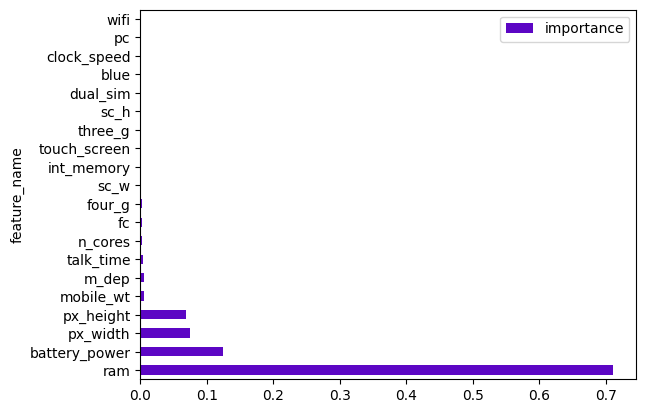

In [ ]:
#ploting importance
dt_features_imp.plot.barh(x='feature_name',y='importance',color='#5c06c4');

###Ranking Features

In [ ]:
dt_features_imp['rank']=dt_features_imp['importance'].rank(ascending=False,method='min')

In [ ]:
dt_features_imp

features_name  importance  rank
9             ram    0.710653   1.0
0   battery_power    0.124964   2.0
8        px_width    0.074348   3.0
7       px_height    0.068503   4.0
5       mobile_wt    0.005307   5.0
4           m_dep    0.004965   6.0
12      talk_time    0.003380   7.0
16        n_cores    0.002296   8.0
2              fc    0.001880   9.0
15         four_g    0.001736  10.0
11           sc_w    0.001299  11.0
3      int_memory    0.000668  12.0
18   touch_screen    0.000000  13.0
17        three_g    0.000000  13.0
10           sc_h    0.000000  13.0
14       dual_sim    0.000000  13.0
13           blue    0.000000  13.0
1     clock_speed    0.000000  13.0
6              pc    0.000000  13.0
19           wifi    0.000000  13.0

In [ ]:
#confusion matrix
confusion_matrix_dt_std=pd.DataFrame(confusion_matrix(y_test_std,y_predict_dt_std['test']),columns=['predict 0','predict 1','predict 2','predict 3'])
confusion_matrix_dt_std.index=['true 0','true 1','true 2','true 3']
confusion_matrix_dt_std

predict 0  predict 1  predict 2  predict 3
true 0        123          9          0          0
true 1         10        105          3          0
true 2          0         16         89         15
true 3          0          0         13        117

In [ ]:
#display classification report
print(classification_report(y_test_std,y_predict_dt_std['test']))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       132
           1       0.81      0.89      0.85       118
           2       0.85      0.74      0.79       120
           3       0.89      0.90      0.89       130

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.86       500
weighted avg       0.87      0.87      0.87       500



###4.2.4 Learning Curve of Decision Tree Model

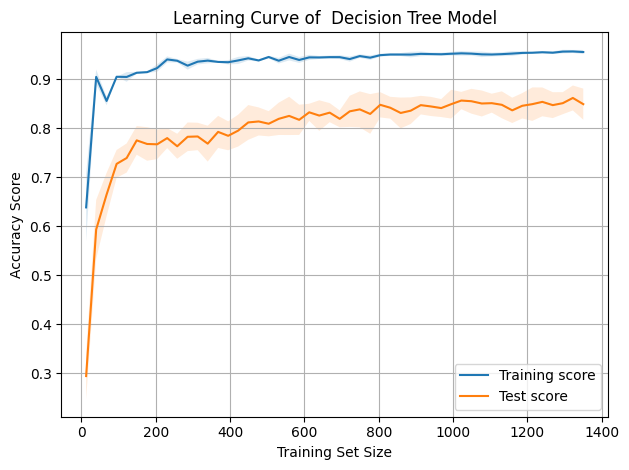

In [ ]:
train_sizes,train_scores,test_scores=learning_curve(model_dt_std,x_train_std,y_train_std,cv=10,scoring='accuracy',train_sizes=np.linspace(0.01, 1.0, 50))
# Mean and Standard Deviation of training scores
mean_training = np.mean(train_scores, axis=1)
Standard_Deviation_training = np.std(train_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(test_scores, axis=1)
Standard_Deviation_testing = np.std(test_scores, axis=1)

plt.plot(train_sizes, mean_training,  label="Training score")
plt.fill_between(train_sizes, mean_training+ Standard_Deviation_training, mean_training - Standard_Deviation_training, alpha=0.15, )
plt.plot(train_sizes, mean_testing,  label="Test score")
plt.fill_between(train_sizes, mean_testing +Standard_Deviation_testing, mean_testing  - Standard_Deviation_testing, alpha=0.15, )

# Drawing plot
plt.title("Learning Curve of  Decision Tree Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()

###5.1 Random Forest Model on MinMax Scaled Data

In [ ]:
x_min=x_minmax.drop('price_range',axis=1)
y_min=x_minmax['price_range']
x_train_min,x_test_min,y_train_min,y_test_min=train_test_split(x_min,y_min,test_size=0.25,random_state=42)

In [ ]:
def rf_min(x_train_min,x_test_min,y_train_min,y_test_min):
    #creating an instance of Random Forest classifier
    rf_clf=RandomForestClassifier(random_state=42)
    model_rf_min=rf_clf.fit(x_train_min,y_train_min)
    y_pred_rf_min=model_rf_min.predict(x_test_min)
    test_rf_min=accuracy_score(y_test_min,y_pred_rf_min)
    train_score_rf_min=rf_clf.score(x_train_min,y_train_min)
    return train_score_rf_min,test_rf_min

In [ ]:
score_rf_min=rf_min(x_train_min,x_test_min,y_train_min,y_test_min)
print('The  training accuracy score of Random Forest Classifier  Model on test(MinMAx Scaled) data is',score_rf_min[0]*100)
print('The  accuracy score of  Random Forest  Model on test(MinMax Scaled) data is',score_rf_min[1]*100)

The  training accuracy score of Random Forest Classifier  Model on test(MinMAx Scaled) data is 100.0
The  accuracy score of  Random Forest  Model on test(MinMax Scaled) data is 86.6


###5.1.1 K fold Cross Validation of Random Forest Classifier Model (since it is a balanced model) on MinMax Scaled data

In [ ]:
def cv_rf_min(x_train_min,y_train_min):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  rf_clf=RandomForestClassifier(random_state=42)
  model_rf_min=rf_clf.fit(x_train_min,y_train_min)
  cv_result_rf_min=cross_val_score(model_rf_min,x_train_min,y_train_min,cv=kfold_validator)
  return cv_result_rf_min

In [ ]:
cv_result_rf_min=cv_rf_min(x_train_min,y_train_min)
print('The KFold Cross Validation Score of  Random Forest  Classifier  Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_rf_min)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of  Random Forest  Classifier  Model(on MinMax Scaled Data ) is :  86.6


###5.2 Random Forest Model on Standard Scaled Data

In [ ]:

x_log_std=x_std.drop('price_range',axis=1)
y_log_std=x_std['price_range']
x_train_std,x_test_std,y_train_std,y_test_std=train_test_split(x_log_std,y_log_std,test_size=0.25,random_state=42)

In [ ]:

def rf_std(x_train_std,x_test_std,y_train_std,y_test_std):
    #creating an instance of Random Forest classifier
    rf_clf=RandomForestClassifier(random_state=42)
    model_rf_std=rf_clf.fit(x_train_std,y_train_std)
    y_pred_rf_std=model_rf_std.predict(x_test_std)
    test_rf_std=accuracy_score(y_test_std,y_pred_rf_std)
    train_score_rf_std=rf_clf.score(x_train_std,y_train_std)
    return train_score_rf_std,test_rf_std

In [ ]:
score_rf_std=rf_std(x_train_std,x_test_std,y_train_std,y_test_std)
print('The  training accuracy score of Random Forest Classifier  Model on test(Standard Scaled) data is',score_rf_std[0]*100)
print('The  accuracy score of Random Forest Classifier  Model on test(Standard Scaled) data is',score_rf_std[1]*100)

The  training accuracy score of Random Forest Classifier  Model on test(Standard Scaled) data is 100.0
The  accuracy score of Random Forest Classifier  Model on test(Standard Scaled) data is 86.8


###5.2.1 K fold Cross Validation of Random Forest Classifier Model (since it is a balanced model) on Standard Scaled data

In [ ]:
def cv_rf_std(x_train_std,y_train_std):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  rf_clf=RandomForestClassifier(random_state=42)
  model_rf_std=rf_clf.fit(x_train_std,y_train_std)
  cv_result_rf_std=cross_val_score(model_rf_std,x_train_std,y_train_std,cv=kfold_validator)
  return cv_result_rf_std

In [ ]:
cv_result_rf_std=cv_rf_std(x_train_std,y_train_std)
print('The KFold Cross Validation Score of Random Forest Classifier Model(on Standard Scaled Data ) is : ',np.mean(cv_result_rf_std)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of Random Forest Classifier Model(on Standard Scaled Data ) is :  86.33333333333333


#5.2.2 Fine Tuning of Random Forest Model

In [ ]:

rf_clf_std=RandomForestClassifier(random_state=42)
kfold_validator=KFold(10,shuffle=True,random_state=42)
# defining parameter range
param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 150, 200, 250, 300, 350],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
            'criterion': ['gini', 'entropy'],
            #'bootstrap':[True,False]
            }

In [ ]:
# Create a GridSearchCV object
grid_rf_std = GridSearchCV(rf_clf_std, param_grid= param_grid , refit = True, verbose = 3, n_jobs=-1, cv=kfold_validator)

In [ ]:
# fitting the training data
grid_rf_std.fit(x_train_std, y_train_std)

Fitting 10 folds for each of 1680 candidates, totalling 16800 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          150, 200, 250, 300, 350]},
             verbose=3)

In [ ]:
# calling function
print_results(grid_rf_std)

BEST PARAMS: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 150}

0.483 (+/-0.113) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 10}
0.537 (+/-0.124) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 20}
0.547 (+/-0.13) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 30}
0.588 (+/-0.083) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 40}
0.591 (+/-0.066) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 50}
0.588 (+/-0.067) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 60}
0.615 (+/-0.088) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 70}
0.607 (+/-0.1) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 80}
0.611 (+/-0.103) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'au

###5.2.3 Model Evaluation of Random Forest Model

###Accuracy Score of top few models
0.849 (+/-0.08) for {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 20}

0.865 (+/-0.068) for {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 30}

0.866 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 40}

0.875 (+/-0.082) for {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 50}

0.879 (+/-0.07) for {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 60}

0.877 (+/-0.078) for {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 70}

0.883 (+/-0.066) for {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 80}

0.887 (+/-0.069) for {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 90}

0.889 (+/-0.057) for {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 150}

0.885 (+/-0.057) for {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 200}

0.885 (+/-0.06) for {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 250}

0.885 (+/-0.064) for {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 300}

0.883 (+/-0.063) for {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 350}

In [ ]:
model_rf_std1=RandomForestClassifier(n_estimators =20 , max_depth =12 , max_features = 'auto', criterion = 'entropy', random_state=42).fit(x_train_std,y_train_std)
model_rf_std2=RandomForestClassifier(n_estimators = 30, max_depth =12 , max_features = 'auto', criterion = 'entropy', random_state=42).fit(x_train_std,y_train_std)
model_rf_std3=RandomForestClassifier(n_estimators =40 , max_depth =12 , max_features = 'auto', criterion = 'entropy', random_state=42).fit(x_train_std,y_train_std)
model_rf_std4=RandomForestClassifier(n_estimators =50 , max_depth =12 , max_features = 'auto', criterion = 'entropy', random_state=42).fit(x_train_std,y_train_std)
model_rf_std5=RandomForestClassifier(n_estimators =60 , max_depth =12 , max_features = 'auto', criterion = 'entropy', random_state=42).fit(x_train_std,y_train_std)
model_rf_std6=RandomForestClassifier(n_estimators =70 , max_depth = 12, max_features = 'auto', criterion = 'entropy', random_state=42).fit(x_train_std,y_train_std)
model_rf_std7=RandomForestClassifier(n_estimators =80 , max_depth =12 , max_features = 'auto', criterion = 'entropy', random_state=42).fit(x_train_std,y_train_std)
model_rf_std8=RandomForestClassifier(n_estimators =90 , max_depth = 12, max_features = 'auto', criterion = 'entropy', random_state=42).fit(x_train_std,y_train_std)
model_rf_std9=RandomForestClassifier(n_estimators =150 , max_depth =12 , max_features = 'auto', criterion = 'entropy', random_state=42).fit(x_train_std,y_train_std)
model_rf_std10=RandomForestClassifier(n_estimators =200 , max_depth = 12, max_features = 'auto', criterion = 'entropy', random_state=42).fit(x_train_std,y_train_std)
model_rf_std11=RandomForestClassifier(n_estimators =250 , max_depth = 12, max_features = 'auto', criterion = 'entropy', random_state=42).fit(x_train_std,y_train_std)
model_rf_std12=RandomForestClassifier(n_estimators = 300, max_depth = 12, max_features = 'auto', criterion = 'entropy', random_state=42).fit(x_train_std,y_train_std)
model_rf_std13=RandomForestClassifier(n_estimators = 350, max_depth = 12, max_features = 'auto', criterion = 'entropy', random_state=42).fit(x_train_std,y_train_std)

In [ ]:


# finding accuracy, of top few models
for model in [model_rf_std1,model_rf_std2,model_rf_std3,model_rf_std4,model_rf_std5,model_rf_std6,model_rf_std7,model_rf_std8,model_rf_std9,model_rf_std10,model_rf_std11,model_rf_std12,model_rf_std13]:
    y_pred_rf_std= model.predict(x_test_std)
    accuracy = accuracy_score(y_test_std, y_pred_rf_std)

    print('max_depth: {} / max_features: {}/ criterion:{}/n_estimator{} -- A: {} '.format( model.max_depth,model.max_features,model.criterion,model.n_estimators, accuracy))

max_depth: 12 / max_features: auto/ criterion:entropy/n_estimator20 -- A: 0.83 
max_depth: 12 / max_features: auto/ criterion:entropy/n_estimator30 -- A: 0.856 
max_depth: 12 / max_features: auto/ criterion:entropy/n_estimator40 -- A: 0.87 
max_depth: 12 / max_features: auto/ criterion:entropy/n_estimator50 -- A: 0.874 
max_depth: 12 / max_features: auto/ criterion:entropy/n_estimator60 -- A: 0.888 
max_depth: 12 / max_features: auto/ criterion:entropy/n_estimator70 -- A: 0.88 
max_depth: 12 / max_features: auto/ criterion:entropy/n_estimator80 -- A: 0.88 
max_depth: 12 / max_features: auto/ criterion:entropy/n_estimator90 -- A: 0.88 
max_depth: 12 / max_features: auto/ criterion:entropy/n_estimator150 -- A: 0.886 
max_depth: 12 / max_features: auto/ criterion:entropy/n_estimator200 -- A: 0.876 
max_depth: 12 / max_features: auto/ criterion:entropy/n_estimator250 -- A: 0.88 
max_depth: 12 / max_features: auto/ criterion:entropy/n_estimator300 -- A: 0.884 
max_depth: 12 / max_features: 

In [ ]:
# best model prediction

# create instance and fit the training data
model_rf_std = RandomForestClassifier(n_estimators = 60, max_depth =12 , max_features = 'auto', criterion = 'entropy', random_state=42).fit(x_train_std, y_train_std)

# Make predictions
y_predict_rf_std = {
    "train": model_rf_std.predict(x_train_std),
    "test": model_rf_std.predict(x_test_std)
}

# Create train and test scores
score_rf_std = {
    "train": accuracy_score(y_train_std, y_predict_rf_std["train"]),
    "test": accuracy_score(y_test_std, y_predict_rf_std["test"])
}

print('The training accuracy score for Random Forest Classifier model on standard scaled data is:',score_rf_std['train']*100)
print('The testing accuracy score for Random Forest Classifier model on standard scaled data is:',score_rf_std['test']*100)

The training accuracy score for Random Forest Classifier model on standard scaled data is: 100.0
The testing accuracy score for Random Forest Classifier model on standard scaled data is: 88.8


In [ ]:
# feature importance
rf_features_imp = pd.DataFrame({"feature_name": x_train_std.columns, "importance": model_rf_std.feature_importances_})
rf_features_imp.sort_values(by=["importance"], ascending=False, inplace=True)

# display feature importance
display(rf_features_imp)

feature_name  importance
9             ram    0.519685
0   battery_power    0.076921
7       px_height    0.054297
8        px_width    0.050997
5       mobile_wt    0.034075
3      int_memory    0.033385
6              pc    0.027045
12      talk_time    0.026980
1     clock_speed    0.026151
11           sc_w    0.025164
4           m_dep    0.025084
10           sc_h    0.024126
2              fc    0.022165
16        n_cores    0.019309
13           blue    0.006109
18   touch_screen    0.005864
19           wifi    0.005790
14       dual_sim    0.005736
17        three_g    0.005603
15         four_g    0.005515

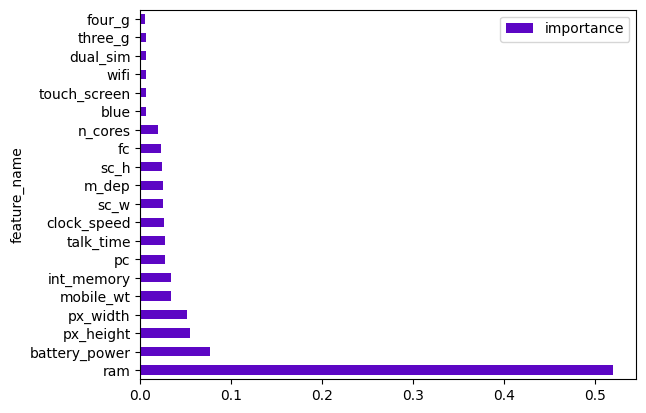

In [ ]:
#ploting importance
rf_features_imp.plot.barh(x='feature_name',y='importance',color='#5c06c4');

In [ ]:
#confusion matrix
confusion_matrix_rf_std=pd.DataFrame(confusion_matrix(y_test_std,y_predict_rf_std['test']),columns=['predict 0','predict 1','predict 2','predict 3'])
confusion_matrix_rf_std.index=['true 0','true 1','true 2','true 3']
confusion_matrix_rf_std

predict 0  predict 1  predict 2  predict 3
true 0        122         10          0          0
true 1          9        103          6          0
true 2          0         12         99          9
true 3          0          0         10        120

In [ ]:
#display classification report
print(classification_report(y_test_std,y_predict_rf_std['test']))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       132
           1       0.82      0.87      0.85       118
           2       0.86      0.82      0.84       120
           3       0.93      0.92      0.93       130

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



###5.2.4 Learning curve of Random Forest Model

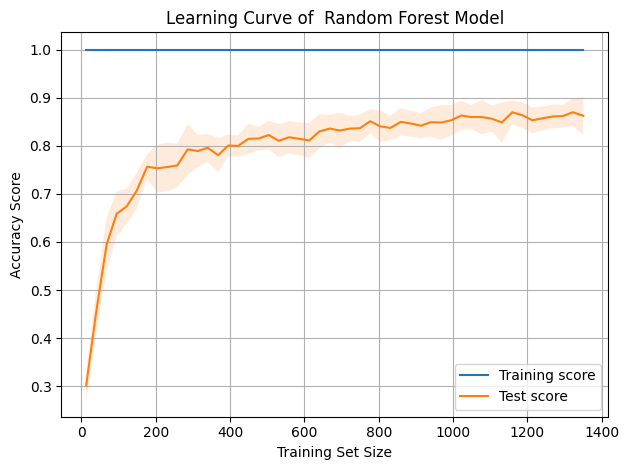

In [ ]:
train_sizes,train_scores,test_scores=learning_curve(model_rf_std,x_train_std,y_train_std,cv=10,scoring='accuracy',train_sizes=np.linspace(0.01, 1.0, 50))
# Mean and Standard Deviation of training scores
mean_training = np.mean(train_scores, axis=1)
Standard_Deviation_training = np.std(train_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(test_scores, axis=1)
Standard_Deviation_testing = np.std(test_scores, axis=1)


plt.plot(train_sizes, mean_training,  label="Training score")
plt.fill_between(train_sizes, mean_training+ Standard_Deviation_training, mean_training - Standard_Deviation_training, alpha=0.15, )
plt.plot(train_sizes, mean_testing,  label="Test score")
plt.fill_between(train_sizes, mean_testing +Standard_Deviation_testing, mean_testing  - Standard_Deviation_testing, alpha=0.15, )

# Drawing plot
plt.title("Learning Curve of  Random Forest Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()

###6.1 Naive Bayes Model on MinMax Scaled Data

In [ ]:
x_min=x_minmax.drop('price_range',axis=1)
y_min=x_minmax['price_range']
x_train_min,x_test_min,y_train_min,y_test_min=train_test_split(x_min,y_min,test_size=0.25,random_state=42)

In [ ]:
def gnb_min(x_train_min,x_test_min,y_train_min,y_test_min):
    #creating an instance of Naive Bayes classifier
    gnb_clf=GaussianNB()
    model_gnb_min=gnb_clf.fit(x_train_min,y_train_min)
    y_pred_gnb_min=model_gnb_min.predict(x_test_min)
    test_gnb_min=accuracy_score(y_test_min,y_pred_gnb_min)
    train_score_gnb_min=gnb_clf.score(x_train_min,y_train_min)
    return train_score_gnb_min,test_gnb_min

In [ ]:
score_gnb_min=gnb_min(x_train_min,x_test_min,y_train_min,y_test_min)
print('The  training accuracy score of Gaussian Naive Bayes   Model on test(MinMAx Scaled) data is',score_gnb_min[0]*100)
print('The  accuracy score of Gaussian Naive Bayes  Model on test(MinMax Scaled) data is',score_gnb_min[1]*100)

The  training accuracy score of Gaussian Naive Bayes   Model on test(MinMAx Scaled) data is 81.73333333333333
The  accuracy score of Gaussian Naive Bayes  Model on test(MinMax Scaled) data is 79.2


###6.1.1 K fold Cross Validation of Gaussian Naive Bayes  Model (since it is a balanced model) on MinMax Scaled data

In [ ]:
def cv_gnb_min(x_train_min,y_train_min):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  gnb_clf=GaussianNB()
  model_gnb_min=gnb_clf.fit(x_train_min,y_train_min)
  cv_result_gnb_min=cross_val_score(model_gnb_min,x_train_min,y_train_min,cv=kfold_validator)
  return cv_result_gnb_min

In [ ]:
cv_result_gnb_min=cv_gnb_min(x_train_min,y_train_min)
print('The KFold Cross Validation Score of  Gaussian Naive Bayes  Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_gnb_min)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of  Gaussian Naive Bayes  Model(on MinMax Scaled Data ) is :  80.39999999999999


###6.2 Naive Bayes Model on Standard Scaled Data

In [ ]:

x_log_std=x_std.drop('price_range',axis=1)
y_log_std=x_std['price_range']
x_train_std,x_test_std,y_train_std,y_test_std=train_test_split(x_log_std,y_log_std,test_size=0.25,random_state=42)

In [ ]:

def gnb_std(x_train_std,x_test_std,y_train_std,y_test_std):
    #creating an instance of Naive Bayes classifier
    gnb_clf=GaussianNB()
    model_gnb_std=gnb_clf.fit(x_train_std,y_train_std)
    y_pred_gnb_std=model_gnb_std.predict(x_test_std)
    test_gnb_std=accuracy_score(y_test_std,y_pred_gnb_std)
    train_score_gnb_std=gnb_clf.score(x_train_std,y_train_std)
    return train_score_gnb_std,test_gnb_std

In [ ]:
score_gnb_std=gnb_std(x_train_std,x_test_std,y_train_std,y_test_std)
print('The  training accuracy score of Gaussian Naive Bayes  Model on test(Standard Scaled) data is',score_gnb_std[0]*100)
print('The  accuracy score of Gaussian Naive Bayes  Model on test(Standard Scaled) data is',score_gnb_std[1]*100)

The  training accuracy score of Gaussian Naive Bayes  Model on test(Standard Scaled) data is 81.73333333333333
The  accuracy score of Gaussian Naive Bayes  Model on test(Standard Scaled) data is 79.2


###6.2.1 K fold Cross Validation of Gaussian Naive Bayes  Model (since it is a balanced model) on Standard Scaled data

In [ ]:
def cv_gnb_std(x_train_std,y_train_std):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  gnb_clf=GaussianNB()
  model_gnb_std=gnb_clf.fit(x_train_std,y_train_std)
  cv_result_gnb_std=cross_val_score(model_gnb_std,x_train_std,y_train_std,cv=kfold_validator)
  return cv_result_gnb_std

In [ ]:
cv_result_gnb_std=cv_gnb_std(x_train_std,y_train_std)
print('The KFold Cross Validation Score of Gaussian Naive Bayes Model(on Standard Scaled Data ) is : ',np.mean(cv_result_gnb_std)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of Gaussian Naive Bayes Model(on Standard Scaled Data ) is :  80.39999999999999


###6.2.2 Fine Tuning of Gaussian Naive Bayes Model

Naive Bayes almost have no parameters to tune

In [ ]:
kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
gnb_clf_std=GaussianNB()
param_grid={'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
grid_gnb_std=GridSearchCV(gnb_clf_std,param_grid=param_grid,refit=True,verbose=3,n_jobs=-1,cv=kfold_validator)

In [ ]:
best_gnb_std=grid_gnb_std.fit(x_train_std,y_train_std)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
print_results(grid_gnb_std)

BEST PARAMS: {'var_smoothing': 0.04328761281083057}

0.693 (+/-0.13) for {'var_smoothing': 1.0}
0.708 (+/-0.121) for {'var_smoothing': 0.8111308307896871}
0.717 (+/-0.108) for {'var_smoothing': 0.657933224657568}
0.731 (+/-0.1) for {'var_smoothing': 0.533669923120631}
0.739 (+/-0.101) for {'var_smoothing': 0.43287612810830584}
0.747 (+/-0.104) for {'var_smoothing': 0.3511191734215131}
0.759 (+/-0.119) for {'var_smoothing': 0.2848035868435802}
0.77 (+/-0.121) for {'var_smoothing': 0.23101297000831597}
0.779 (+/-0.127) for {'var_smoothing': 0.1873817422860384}
0.789 (+/-0.121) for {'var_smoothing': 0.15199110829529336}
0.797 (+/-0.119) for {'var_smoothing': 0.12328467394420659}
0.802 (+/-0.1) for {'var_smoothing': 0.1}
0.811 (+/-0.096) for {'var_smoothing': 0.08111308307896872}
0.819 (+/-0.086) for {'var_smoothing': 0.0657933224657568}
0.821 (+/-0.077) for {'var_smoothing': 0.0533669923120631}
0.823 (+/-0.065) for {'var_smoothing': 0.04328761281083057}
0.823 (+/-0.06) for {'var_smoothing

###6.2.3 Gaussian Naive Bayes Classifier Model Evalution

###Accuracy scores of top few models:-
0.809 (+/-0.052) for {'var_smoothing': 0.0015199110829529332}

0.811 (+/-0.096) for {'var_smoothing': 0.08111308307896872}

0.811 (+/-0.054) for {'var_smoothing': 0.005336699231206307}

0.813 (+/-0.055) for {'var_smoothing': 0.006579332246575682}

0.814 (+/-0.056) for {'var_smoothing': 0.008111308307896872}

0.815 (+/-0.06) for {'var_smoothing': 0.012328467394420659}

0.815 (+/-0.061) for {'var_smoothing': 0.01}

0.816 (+/-0.057) for {'var_smoothing': 0.01519911082952933}


0.817 (+/-0.07) for {'var_smoothing': 0.01873817422860384}

0.818 (+/-0.064) for {'var_smoothing': 0.02310129700083159}

0.819 (+/-0.086) for {'var_smoothing': 0.0657933224657568}


0.821 (+/-0.054) for {'var_smoothing': 0.02848035868435802}

0.821 (+/-0.077) for {'var_smoothing': 0.0533669923120631}

0.823 (+/-0.065) for {'var_smoothing': 0.04328761281083057}

0.823 (+/-0.06) for {'var_smoothing': 0.03511191734215131}










In [ ]:
#model buliding using top few models
model_gnb_std1=GaussianNB(var_smoothing=0.0015199110829529332).fit(x_train_std,y_train_std)
model_gnb_std2=GaussianNB(var_smoothing=0.08111308307896872).fit(x_train_std,y_train_std)
model_gnb_std3=GaussianNB(var_smoothing=0.005336699231206307).fit(x_train_std,y_train_std)
model_gnb_std4=GaussianNB(var_smoothing=0.006579332246575682).fit(x_train_std,y_train_std)
model_gnb_std5=GaussianNB(var_smoothing=0.008111308307896872).fit(x_train_std,y_train_std)
model_gnb_std6=GaussianNB(var_smoothing=0.012328467394420659).fit(x_train_std,y_train_std)
model_gnb_std7=GaussianNB(var_smoothing= 0.01).fit(x_train_std,y_train_std)
model_gnb_std8=GaussianNB(var_smoothing=0.01519911082952933).fit(x_train_std,y_train_std)
model_gnb_std9=GaussianNB(var_smoothing=0.01873817422860384).fit(x_train_std,y_train_std)
model_gnb_std10=GaussianNB(var_smoothing=0.02310129700083159).fit(x_train_std,y_train_std)
model_gnb_std11=GaussianNB(var_smoothing=0.0657933224657568).fit(x_train_std,y_train_std)
model_gnb_std12=GaussianNB(var_smoothing=0.02848035868435802).fit(x_train_std,y_train_std)
model_gnb_std13=GaussianNB(var_smoothing=0.0533669923120631).fit(x_train_std,y_train_std)
model_gnb_std14=GaussianNB(var_smoothing=0.04328761281083057).fit(x_train_std,y_train_std)
model_gnb_std15=GaussianNB(var_smoothing=0.03511191734215131).fit(x_train_std,y_train_std)

In [ ]:
#printing the test accuracy score for top few models
for model in [model_gnb_std1,model_gnb_std2,model_gnb_std3,model_gnb_std4,model_gnb_std5,model_gnb_std6,model_gnb_std7,model_gnb_std8,model_gnb_std9,model_gnb_std10,model_gnb_std11,model_gnb_std12,model_gnb_std13,model_gnb_std14,model_gnb_std15]:
  y_pred_gnb_std=model.predict(x_test_std)
  accuracy=accuracy_score(y_test_std,y_pred_gnb_std)
  print('var_smoothing:{} /  -- A:{}'.format(model.var_smoothing,accuracy))

var_smoothing:0.0015199110829529332 /  -- A:0.794
var_smoothing:0.08111308307896872 /  -- A:0.806
var_smoothing:0.005336699231206307 /  -- A:0.8
var_smoothing:0.006579332246575682 /  -- A:0.804
var_smoothing:0.008111308307896872 /  -- A:0.8
var_smoothing:0.012328467394420659 /  -- A:0.806
var_smoothing:0.01 /  -- A:0.804
var_smoothing:0.01519911082952933 /  -- A:0.806
var_smoothing:0.01873817422860384 /  -- A:0.8
var_smoothing:0.02310129700083159 /  -- A:0.804
var_smoothing:0.0657933224657568 /  -- A:0.814
var_smoothing:0.02848035868435802 /  -- A:0.81
var_smoothing:0.0533669923120631 /  -- A:0.814
var_smoothing:0.04328761281083057 /  -- A:0.812
var_smoothing:0.03511191734215131 /  -- A:0.81


In [ ]:
#best model prediction

#creating an instance and fit the training data
model_gnb_std=GaussianNB(var_smoothing=0.0533669923120631).fit(x_train_std,y_train_std)

#Prediction
y_pred_gnb_std={
    'train':model_gnb_std.predict(x_train_std),
    'test':model_gnb_std.predict(x_test_std)

}

#create train and test score

score_gnb_std={
    'train':accuracy_score(y_train_std,y_pred_gnb_std['train']),
    'test':accuracy_score(y_test_std,y_pred_gnb_std['test'])
}

print('The training accuracy score for Gausiian Naive Bayes Classifier model on standard scaled data is:',score_gnb_std['train']*100)
print('The testing accuracy score for Gausiian Naive Bayes Classifier model on standard scaled data is:',score_gnb_std['test']*100)

The training accuracy score for Gausiian Naive Bayes Classifier model on standard scaled data is: 84.46666666666667
The testing accuracy score for Gausiian Naive Bayes Classifier model on standard scaled data is: 81.39999999999999


The GaussianNB does not offer an intrinsic method to evaluate feature importances.

In [ ]:
#confusion matrix
confusion_matrix_gnb_std=pd.DataFrame(confusion_matrix(y_test_std,y_pred_gnb_std['test']),columns=['predict 0','predict 1','predict 2','predict 3'])
confusion_matrix_gnb_std.index=['true 0','true 1','true 2','true 3']
confusion_matrix_gnb_std

predict 0  predict 1  predict 2  predict 3
true 0        121         10          1          0
true 1         18         80         20          0
true 2          0         18         91         11
true 3          0          0         15        115

In [ ]:
#display classification report
print(classification_report(y_test_std,y_pred_gnb_std['test']))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       132
           1       0.74      0.68      0.71       118
           2       0.72      0.76      0.74       120
           3       0.91      0.88      0.90       130

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



###6.2.4 Learning Curve of Gaussian Naive Bayes Model

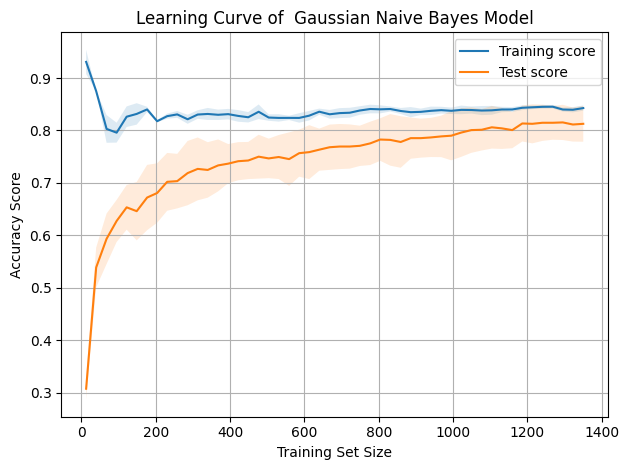

In [ ]:
train_sizes,train_scores,test_scores=learning_curve(model_gnb_std,x_train_std,y_train_std,cv=10,scoring='accuracy',train_sizes=np.linspace(0.01, 1.0, 50))
# Mean and Standard Deviation of training scores
mean_training = np.mean(train_scores, axis=1)
Standard_Deviation_training = np.std(train_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(test_scores, axis=1)
Standard_Deviation_testing = np.std(test_scores, axis=1)


plt.plot(train_sizes, mean_training,  label="Training score")
plt.fill_between(train_sizes, mean_training+ Standard_Deviation_training, mean_training - Standard_Deviation_training, alpha=0.15, )
plt.plot(train_sizes, mean_testing,  label="Test score")
plt.fill_between(train_sizes, mean_testing +Standard_Deviation_testing, mean_testing  - Standard_Deviation_testing, alpha=0.15, )

# Drawing plot
plt.title("Learning Curve of  Gaussian Naive Bayes Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()

###7.1 Gradient Boosting Model on MinMax Scaled Data

In [ ]:
x_min=x_minmax.drop('price_range',axis=1)
y_min=x_minmax['price_range']
x_train_min,x_test_min,y_train_min,y_test_min=train_test_split(x_min,y_min,test_size=0.25,random_state=42)

In [ ]:
def gb_min(x_train_min,x_test_min,y_train_min,y_test_min):
    #creating an instance of Gradient Boosting classifier
    gb_clf=GradientBoostingClassifier(random_state=42)
    model_gb_min=gb_clf.fit(x_train_min,y_train_min)
    y_pred_gb_min=model_gb_min.predict(x_test_min)
    test_gb_min=accuracy_score(y_test_min,y_pred_gb_min)
    train_score_gb_min=gb_clf.score(x_train_min,y_train_min)
    return train_score_gb_min,test_gb_min

In [ ]:
score_gb_min=gb_min(x_train_min,x_test_min,y_train_min,y_test_min)
print('The  training accuracy score of Gradient Boosting Classifier   Model on test(MinMAx Scaled) data is',score_gb_min[0]*100)
print('The  accuracy score of Gradient Boosting Classifier  Model on test(MinMax Scaled) data is',score_gb_min[1]*100)

The  training accuracy score of Gradient Boosting Classifier   Model on test(MinMAx Scaled) data is 100.0
The  accuracy score of Gradient Boosting Classifier  Model on test(MinMax Scaled) data is 88.6


###7.1.1 K fold Cross Validation of Gradient Boosting Classifier  Model (since it is a balanced model) on MinMax Scaled data

In [ ]:
def cv_gb_min(x_train_min,y_train_min):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  gb_clf=GradientBoostingClassifier(random_state=42)
  model_gb_min=gb_clf.fit(x_train_min,y_train_min)
  cv_result_gb_min=cross_val_score(model_gb_min,x_train_min,y_train_min,cv=kfold_validator)
  return cv_result_gb_min

In [ ]:
cv_result_gb_min=cv_gb_min(x_train_min,y_train_min)
print('The KFold Cross Validation Score of  Gradient Boosting Classifier  Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_gb_min)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of  Gradient Boosting Classifier  Model(on MinMax Scaled Data ) is :  89.8


###7.2 Gradient Boosting Model on Standard Scaled Data

In [ ]:

x_log_std=x_std.drop('price_range',axis=1)
y_log_std=x_std['price_range']
x_train_std,x_test_std,y_train_std,y_test_std=train_test_split(x_log_std,y_log_std,test_size=0.25,random_state=42)

In [ ]:

def gb_std(x_train_std,x_test_std,y_train_std,y_test_std):
    #creating an instance of Gradient Boosting classifier
    gb_clf=GradientBoostingClassifier(random_state=42)
    model_gb_std=gb_clf.fit(x_train_std,y_train_std)
    y_pred_gb_std=model_gb_std.predict(x_test_std)
    test_gb_std=accuracy_score(y_test_std,y_pred_gb_std)
    train_score_gb_std=gb_clf.score(x_train_std,y_train_std)
    return train_score_gb_std,test_gb_std

In [ ]:
score_gb_std=gb_std(x_train_std,x_test_std,y_train_std,y_test_std)
print('The  training accuracy score of Gradient Boosting Classifier  Model on test(Standard Scaled) data is',score_gb_std[0]*100)
print('The  accuracy score of Gradient Boosting Classifier   Model on test(Standard Scaled) data is',score_gb_std[1]*100)

The  training accuracy score of Gradient Boosting Classifier  Model on test(Standard Scaled) data is 100.0
The  accuracy score of Gradient Boosting Classifier   Model on test(Standard Scaled) data is 88.6


###7.2.1 K fold Cross Validation of Gradient Boosting Classifier  Model (since it is a balanced model) on standard Scaled data

In [ ]:
def cv_gb_std(x_train_std,y_train_std):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  gb_clf=GradientBoostingClassifier(random_state=42)
  model_gb_std=gb_clf.fit(x_train_std,y_train_std)
  cv_result_gb_std=cross_val_score(model_gb_std,x_train_std,y_train_std,cv=kfold_validator)
  return cv_result_gb_std

In [ ]:
cv_result_gb_std=cv_gb_std(x_train_std,y_train_std)
print('The KFold Cross Validation Score of Gradient Boosting Classifier Model(on Standard Scaled Data ) is : ',np.mean(cv_result_gb_std)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of Gradient Boosting Classifier Model(on Standard Scaled Data ) is :  89.8


###7.2.2Fine Tuning Of Gradient Boosting Classifier Model

In [ ]:
gb_clf_std=GradientBoostingClassifier(random_state=42)
kfold_validator=KFold(10,shuffle=True,random_state=42)
# defining parameter range
param_grid={
    "n_estimators":[5,50,100,150,250,500],
    "max_depth":[1,3,5,7,9,11,13,15,17,19],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [ ]:
# Create a GridSearchCV object
grid_gb_std = GridSearchCV(gb_clf_std, param_grid= param_grid , refit = True, verbose = 3, n_jobs=-1, cv=kfold_validator)

In [ ]:
# fitting the training data
grid_gb_std.fit(x_train_std, y_train_std)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [5, 50, 100, 150, 250, 500]},
             verbose=3)

In [ ]:
# calling function
print_results(grid_gb_std)

BEST PARAMS: {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 250}

0.695 (+/-0.149) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.741 (+/-0.068) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.743 (+/-0.07) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}
0.747 (+/-0.065) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 150}
0.757 (+/-0.062) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.777 (+/-0.055) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.758 (+/-0.058) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.8 (+/-0.058) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.802 (+/-0.067) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
0.809 (+/-0.065) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
0.835 (+/-0.08) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.881 (+/-0.039) for {'learning_rate

###7.2.3 Model Evaluation of Gradient Boosting  Model

###Accuracy Score of top few models
0.923 (+/-0.047) for {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 250}

0.922 (+/-0.043) for {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 500}

0.921 (+/-0.036) for {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 150}

0.912 (+/-0.046) for {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 100}

0.911 (+/-0.049) for {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 250}

0.911 (+/-0.049) for {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 500}

0.91 (+/-0.044) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

0.91 (+/-0.045) for {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}


0.907 (+/-0.041) for {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 50}


0.907 (+/-0.047) for {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 150}

0.905 (+/-0.038) for {'learning_rate': 1, 'max_depth': 7, 'n_estimators': 50}

0.905 (+/-0.038) for {'learning_rate': 1, 'max_depth': 7, 'n_estimators': 100}

0.905 (+/-0.038) for {'learning_rate': 1, 'max_depth': 7, 'n_estimators': 150}

0.905 (+/-0.038) for {'learning_rate': 1, 'max_depth': 7, 'n_estimators': 250}

0.905 (+/-0.038) for {'learning_rate': 1, 'max_depth': 7, 'n_estimators': 500}

0.867 (+/-0.054) for {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 5}

In [ ]:
model_gb_std1=GradientBoostingClassifier(n_estimators=250,max_depth=1,learning_rate=1,random_state=42).fit(x_train_std,y_train_std)
model_gb_std2=GradientBoostingClassifier(n_estimators=500,max_depth=1,learning_rate=1,random_state=42).fit(x_train_std,y_train_std)
model_gb_std3=GradientBoostingClassifier(n_estimators=150,max_depth=1,learning_rate=1,random_state=42).fit(x_train_std,y_train_std)
model_gb_std4=GradientBoostingClassifier(n_estimators=100,max_depth=1,learning_rate=1,random_state=42).fit(x_train_std,y_train_std)
model_gb_std5=GradientBoostingClassifier(n_estimators=250,max_depth=3,learning_rate=1,random_state=42).fit(x_train_std,y_train_std)
model_gb_std6=GradientBoostingClassifier(n_estimators=500,max_depth=3,learning_rate=1,random_state=42).fit(x_train_std,y_train_std)
model_gb_std7=GradientBoostingClassifier(n_estimators=250,max_depth=3,learning_rate=0.1,random_state=42).fit(x_train_std,y_train_std)
model_gb_std8=GradientBoostingClassifier(n_estimators=100,max_depth=3,learning_rate=1,random_state=42).fit(x_train_std,y_train_std)
model_gb_std9=GradientBoostingClassifier(n_estimators=50,max_depth=3,learning_rate=1,random_state=42).fit(x_train_std,y_train_std)
model_gb_std10=GradientBoostingClassifier(n_estimators=150,max_depth=3,learning_rate=1,random_state=42).fit(x_train_std,y_train_std)
model_gb_std11=GradientBoostingClassifier(n_estimators=50,max_depth=7,learning_rate=1,random_state=42).fit(x_train_std,y_train_std)
model_gb_std12=GradientBoostingClassifier(n_estimators=100,max_depth=7,learning_rate=1,random_state=42).fit(x_train_std,y_train_std)
model_gb_std13=GradientBoostingClassifier(n_estimators=150,max_depth=7,learning_rate=1,random_state=42).fit(x_train_std,y_train_std)
model_gb_std14=GradientBoostingClassifier(n_estimators=250,max_depth=7,learning_rate=1,random_state=42).fit(x_train_std,y_train_std)
model_gb_std15=GradientBoostingClassifier(n_estimators=500,max_depth=7,learning_rate=1,random_state=42).fit(x_train_std,y_train_std)
model_gb_std16=GradientBoostingClassifier(n_estimators=5,max_depth=3,learning_rate=1,random_state=42).fit(x_train_std,y_train_std)

In [ ]:


# finding accuracy, of top few models
for model in [model_gb_std1,model_gb_std2,model_gb_std3,model_gb_std4,model_gb_std5,model_gb_std6,model_gb_std7,model_gb_std8,model_gb_std9,model_gb_std10,model_gb_std11,model_gb_std12,model_gb_std13,model_gb_std14,model_gb_std15,model_gb_std16]:
    y_pred_gb_std= model.predict(x_test_std)
    accuracy = accuracy_score(y_test_std, y_pred_gb_std)

    print('max_depth: {} /  learning_rate:{} /n_estimator{} -- A: {} '.format( model.max_depth,model.learning_rate,model.n_estimators, accuracy))

max_depth: 1 /  learning_rate:1 /n_estimator250 -- A: 0.92 
max_depth: 1 /  learning_rate:1 /n_estimator500 -- A: 0.924 
max_depth: 1 /  learning_rate:1 /n_estimator150 -- A: 0.914 
max_depth: 1 /  learning_rate:1 /n_estimator100 -- A: 0.91 
max_depth: 3 /  learning_rate:1 /n_estimator250 -- A: 0.892 
max_depth: 3 /  learning_rate:1 /n_estimator500 -- A: 0.892 
max_depth: 3 /  learning_rate:0.1 /n_estimator250 -- A: 0.904 
max_depth: 3 /  learning_rate:1 /n_estimator100 -- A: 0.904 
max_depth: 3 /  learning_rate:1 /n_estimator50 -- A: 0.898 
max_depth: 3 /  learning_rate:1 /n_estimator150 -- A: 0.896 
max_depth: 7 /  learning_rate:1 /n_estimator50 -- A: 0.884 
max_depth: 7 /  learning_rate:1 /n_estimator100 -- A: 0.884 
max_depth: 7 /  learning_rate:1 /n_estimator150 -- A: 0.884 
max_depth: 7 /  learning_rate:1 /n_estimator250 -- A: 0.884 
max_depth: 7 /  learning_rate:1 /n_estimator500 -- A: 0.884 
max_depth: 3 /  learning_rate:1 /n_estimator5 -- A: 0.848 


In [ ]:
# best model prediction

# create instance and fit the training data
model_gb_std = GradientBoostingClassifier(n_estimators = 500, max_depth = 1,learning_rate=1, random_state=42).fit(x_train_std, y_train_std)

# Make predictions
y_predict_gb_std = {
    "train": model_gb_std.predict(x_train_std),
    "test": model_gb_std.predict(x_test_std)
}

# Create train and test scores
score_gb_std = {
    "train": accuracy_score(y_train_std, y_predict_gb_std["train"]),
    "test": accuracy_score(y_test_std, y_predict_gb_std["test"])
}

print('The training accuracy score for Gradient Boosting Classifier model on standard scaled data is:',score_gb_std['train']*100)
print('The testing accuracy score for Gradient Boosting  Classifier model on standard scaled data is:',score_gb_std['test']*100)

The training accuracy score for Gradient Boosting Classifier model on standard scaled data is: 100.0
The testing accuracy score for Gradient Boosting  Classifier model on standard scaled data is: 92.4


In [ ]:
# feature importance
gb_features_imp = pd.DataFrame({"feature_name": x_train_std.columns, "importance": model_gb_std.feature_importances_})
gb_features_imp.sort_values(by=["importance"], ascending=False, inplace=True)

# display feature importance
display(gb_features_imp)

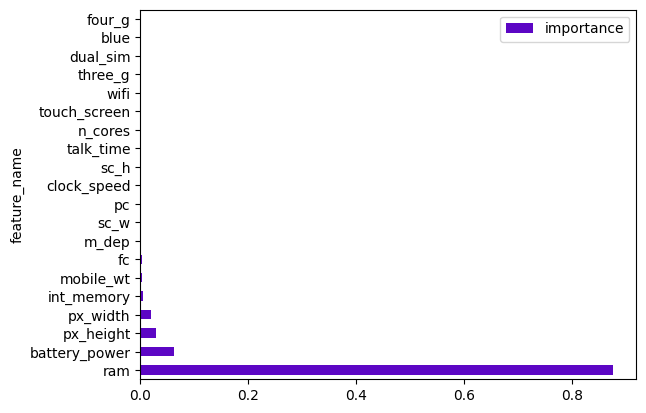

In [ ]:
#ploting importance
gb_features_imp.plot.barh(x='feature_name',y='importance',color='#5c06c4');

###Ranking Features

In [ ]:
gb_features_imp['rank']=gb_features_imp['importance'].rank(ascending=False)

In [ ]:
gb_features_imp

feature_name  importance  rank
9             ram    0.875277   1.0
0   battery_power    0.061477   2.0
7       px_height    0.029108   3.0
8        px_width    0.020128   4.0
3      int_memory    0.005113   5.0
5       mobile_wt    0.002917   6.0
2              fc    0.002007   7.0
4           m_dep    0.001326   8.0
11           sc_w    0.000861   9.0
6              pc    0.000461  10.0
1     clock_speed    0.000359  11.0
10           sc_h    0.000325  12.0
12      talk_time    0.000262  13.0
16        n_cores    0.000143  14.0
18   touch_screen    0.000114  15.0
19           wifi    0.000106  16.0
17        three_g    0.000008  17.0
14       dual_sim    0.000007  18.0
13           blue    0.000001  19.0
15         four_g    0.000000  20.0

In [ ]:
#confusion matrix
confusion_matrix_gb_std=pd.DataFrame(confusion_matrix(y_test_std,y_predict_rf_std['test']),columns=['predict 0','predict 1','predict 2','predict 3'])
confusion_matrix_gb_std.index=['true 0','true 1','true 2','true 3']
confusion_matrix_gb_std

predict 0  predict 1  predict 2  predict 3
true 0        122         10          0          0
true 1          9        103          6          0
true 2          0         12         99          9
true 3          0          0         10        120

In [ ]:
#display classification report
print(classification_report(y_test_std,y_predict_gb_std['test']))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       132
           1       0.88      0.93      0.91       118
           2       0.91      0.86      0.88       120
           3       0.95      0.94      0.94       130

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



###7.2.4 Learning Curve of Gradient Boosting Model

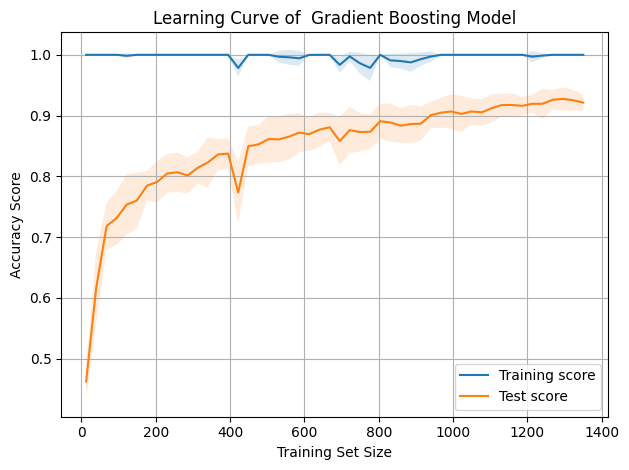

In [ ]:
train_sizes,train_scores,test_scores=learning_curve(model_gb_std,x_train_std,y_train_std,cv=10,scoring='accuracy',train_sizes=np.linspace(0.01, 1.0, 50))
# Mean and Standard Deviation of training scores
mean_training = np.mean(train_scores, axis=1)
Standard_Deviation_training = np.std(train_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(test_scores, axis=1)
Standard_Deviation_testing = np.std(test_scores, axis=1)


plt.plot(train_sizes, mean_training,  label="Training score")
plt.fill_between(train_sizes, mean_training+ Standard_Deviation_training, mean_training - Standard_Deviation_training, alpha=0.15, )
plt.plot(train_sizes, mean_testing,  label="Test score")
plt.fill_between(train_sizes, mean_testing +Standard_Deviation_testing, mean_testing  - Standard_Deviation_testing, alpha=0.15, )

# Drawing plot
plt.title("Learning Curve of  Gradient Boosting Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()

###8.1 Stochastic Gradient Descent Model on MinMax Scaled Data

In [ ]:
x_min=x_minmax.drop('price_range',axis=1)
y_min=x_minmax['price_range']
x_train_min,x_test_min,y_train_min,y_test_min=train_test_split(x_min,y_min,test_size=0.25,random_state=42)

In [ ]:
def sgd_min(x_train_min,x_test_min,y_train_min,y_test_min):
    #creating an instance of Stochastic Gradient Descent classifier
    sgd_clf=SGDClassifier(random_state=42)
    model_sgd_min=sgd_clf.fit(x_train_min,y_train_min)
    y_pred_sgd_min=model_sgd_min.predict(x_test_min)
    test_sgd_min=accuracy_score(y_test_min,y_pred_sgd_min)
    train_score_sgd_min=sgd_clf.score(x_train_min,y_train_min)
    return train_score_sgd_min,test_sgd_min

In [ ]:
score_sgd_min=sgd_min(x_train_min,x_test_min,y_train_min,y_test_min)
print('The  training accuracy score of Stochastic Gradient Descent  Classifier   Model on test(MinMAx Scaled) data is',score_sgd_min[0]*100)
print('The  accuracy score of Stochastic Gradient Descent  Classifier  Model on test(MinMax Scaled) data is',score_sgd_min[1]*100)

The  training accuracy score of Stochastic Gradient Descent  Classifier   Model on test(MinMAx Scaled) data is 70.93333333333334
The  accuracy score of Stochastic Gradient Descent  Classifier  Model on test(MinMax Scaled) data is 71.8


###8.1.1 K fold Cross Validation of Stochastic Gradient Descent Classifier  Model (since it is a balanced model) on MinMax Scaled data

In [ ]:
def cv_sgd_min(x_train_min,y_train_min):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  sgd_clf=SGDClassifier(random_state=42)
  model_sgd_min=sgd_clf.fit(x_train_min,y_train_min)
  cv_result_sgd_min=cross_val_score(model_sgd_min,x_train_min,y_train_min,cv=kfold_validator)
  return cv_result_sgd_min

In [ ]:
cv_result_sgd_min=cv_sgd_min(x_train_min,y_train_min)
print('The KFold Cross Validation Score of  Stochastic Gradient Descent Classifier  Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_sgd_min)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of  Stochastic Gradient Descent Classifier  Model(on MinMax Scaled Data ) is :  72.33333333333334


###8.2 Stochastic Gradient Descent Model on standard Scaled Data

In [ ]:

x_log_std=x_std.drop('price_range',axis=1)#features
y_log_std=x_std['price_range']#target
x_train_std,x_test_std,y_train_std,y_test_std=train_test_split(x_log_std,y_log_std,test_size=0.25,random_state=42)

In [ ]:
#function for stochastic gradient descent model creation using standard scaled data
def sgd_std(x_train_std,x_test_std,y_train_std,y_test_std):
    #creating an instance of Stochastic Gradient Descent classifier
    sgd_clf=SGDClassifier(random_state=42)
    model_sgd_std=sgd_clf.fit(x_train_std,y_train_std)#model creation
    y_pred_sgd_std=model_sgd_std.predict(x_test_std)#prediction
    test_sgd_std=accuracy_score(y_test_std,y_pred_sgd_std)#test score
    train_score_sgd_std=sgd_clf.score(x_train_std,y_train_std)#training score
    return train_score_sgd_std,test_sgd_std

In [ ]:
#calling the function
score_sgd_std=sgd_std(x_train_std,x_test_std,y_train_std,y_test_std)
#printing the training and test score
print('The  training accuracy score of Stochastic Gradient Descent Classifier  Model on test(Standard Scaled) data is',score_sgd_std[0]*100)
print('The  accuracy score of Stochastic Gradient Descent Classifier   Model on test(Standard Scaled) data is',score_sgd_std[1]*100)

The  training accuracy score of Stochastic Gradient Descent Classifier  Model on test(Standard Scaled) data is 78.26666666666667
The  accuracy score of Stochastic Gradient Descent Classifier   Model on test(Standard Scaled) data is 79.2


###8.2.1 K fold Cross Validation of Stochastic Gradient Descent Classifier  Model (since it is a balanced model) on Standard Scaled data

In [ ]:
#fucntion for doing the kfold cross validation of stochastic gradient descent model
def cv_sgd_std(x_train_std,y_train_std):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  sgd_clf=SGDClassifier(random_state=42)#instance of sdg classifier
  model_sgd_std=sgd_clf.fit(x_train_std,y_train_std)
  cv_result_sgd_std=cross_val_score(model_sgd_std,x_train_std,y_train_std,cv=kfold_validator)#cv score
  return cv_result_sgd_std

In [ ]:
#calling the function for cross validation of stochastic gradient descent model
cv_result_sgd_std=cv_sgd_std(x_train_std,y_train_std)
#printing the results of cross validation score of stochastic gradient descent model
print('The KFold Cross Validation Score of Stochastic Gradient Descent Classifier Model(on Standard Scaled Data ) is : ',np.mean(cv_result_sgd_std)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of Stochastic Gradient Descent Classifier Model(on Standard Scaled Data ) is :  74.93333333333332


###Fine Tuning of Stochastic Gradient Descent Model

In [ ]:
kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
sgd_clf_std=SGDClassifier(random_state=42)#instance of sdg classifier
param_grid={'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
'penalty': ['l1', 'l2', 'elasticnet'],
'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
'eta0': [1, 10, 100]
}

In [ ]:
grid_sgd_std=GridSearchCV(sgd_clf_std,param_grid=param_grid,refit=True,verbose=3,n_jobs=-1,cv=kfold_validator)

In [ ]:
best_sgd_std=grid_sgd_std.fit(x_train_std,y_train_std)

Fitting 10 folds for each of 5760 candidates, totalling 57600 fits


In [ ]:
print_results(grid_sgd_std)

Streaming output truncated to the last 5000 lines.
0.806 (+/-0.059) for {'alpha': 0.001, 'class_weight': {1: 0.5, 0: 0.5}, 'eta0': 1, 'learning_rate': 'invscaling', 'loss': 'squared_hinge', 'penalty': 'l2'}
0.797 (+/-0.098) for {'alpha': 0.001, 'class_weight': {1: 0.5, 0: 0.5}, 'eta0': 1, 'learning_rate': 'invscaling', 'loss': 'squared_hinge', 'penalty': 'elasticnet'}
0.754 (+/-0.081) for {'alpha': 0.001, 'class_weight': {1: 0.5, 0: 0.5}, 'eta0': 1, 'learning_rate': 'invscaling', 'loss': 'perceptron', 'penalty': 'l1'}
0.775 (+/-0.085) for {'alpha': 0.001, 'class_weight': {1: 0.5, 0: 0.5}, 'eta0': 1, 'learning_rate': 'invscaling', 'loss': 'perceptron', 'penalty': 'l2'}
0.767 (+/-0.139) for {'alpha': 0.001, 'class_weight': {1: 0.5, 0: 0.5}, 'eta0': 1, 'learning_rate': 'invscaling', 'loss': 'perceptron', 'penalty': 'elasticnet'}
0.783 (+/-0.074) for {'alpha': 0.001, 'class_weight': {1: 0.5, 0: 0.5}, 'eta0': 1, 'learning_rate': 'adaptive', 'loss': 'hinge', 'penalty': 'l1'}
0.768 (+/-0.099)

###8.2.3 Stochastic Gradient Descent Model Evalution

###Accuracy of top few models:-

0.821 (+/-0.049) for {'alpha': 0.001, 'class_weight': {1: 0.7, 0: 0.3}, 'eta0': 1, 'learning_rate': 'adaptive', 'loss': 'log', 'penalty': 'l2'}

0.821 (+/-0.058) for {'alpha': 0.001, 'class_weight': {1: 0.7, 0: 0.3}, 'eta0': 1, 'learning_rate': 'adaptive', 'loss': 'log', 'penalty': 'elasticnet'}

0.823 (+/-0.104) for {'alpha': 0.001, 'class_weight': {1: 0.7, 0: 0.3}, 'eta0': 1, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'l1'}

0.824 (+/-0.06) for {'alpha': 0.001, 'class_weight': {1: 0.6, 0: 0.4}, 'eta0': 10, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'l1'}

0.824 (+/-0.06) for {'alpha': 0.001, 'class_weight': {1: 0.6, 0: 0.4}, 'eta0': 10, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'l1'}

0.824 (+/-0.07) for {'alpha': 0.001, 'class_weight': {1: 0.6, 0: 0.4}, 'eta0': 100, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'elasticnet'}

0.824 (+/-0.066) for {'alpha': 0.001, 'class_weight': {1: 0.6, 0: 0.4}, 'eta0': 100, 'learning_rate': 'adaptive', 'loss': 'squared_hinge', 'penalty': 'l1'}

0.825 (+/-0.063) for {'alpha': 0.001, 'class_weight': {1: 0.6, 0: 0.4}, 'eta0': 1, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'l1'}

0.829 (+/-0.056) for {'alpha': 0.001, 'class_weight': {1: 0.6, 0: 0.4}, 'eta0': 1, 'learning_rate': 'adaptive', 'loss': 'squared_hinge', 'penalty': 'l1'}

0.829 (+/-0.066) for {'alpha': 0.001, 'class_weight': {1: 0.6, 0: 0.4}, 'eta0': 10, 'learning_rate': 'adaptive', 'loss': 'squared_hinge', 'penalty': 'l1'}

0.829 (+/-0.062) for {'alpha': 0.001, 'class_weight': {1: 0.7, 0: 0.3}, 'eta0': 1, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'elasticnet'}

0.831 (+/-0.053) for {'alpha': 0.001, 'class_weight': {1: 0.6, 0: 0.4}, 'eta0': 100, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'l1'}

0.833 (+/-0.066) for {'alpha': 0.001, 'class_weight': {1: 0.6, 0: 0.4}, 'eta0': 1, 'learning_rate': 'adaptive', 'loss': 'log', 'penalty': 'l1'}

0.837 (+/-0.058) for {'alpha': 0.001, 'class_weight': {1: 0.7, 0: 0.3}, 'eta0': 10, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'elasticnet'}

0.838 (+/-0.052) for {'alpha': 0.001, 'class_weight': {1: 0.6, 0: 0.4}, 'eta0': 10, 'learning_rate': 'adaptive', 'loss': 'log', 'penalty': 'l1'}

0.841 (+/-0.068) for {'alpha': 0.001, 'class_weight': {1: 0.7, 0: 0.3}, 'eta0': 1, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'l1'}

0.843 (+/-0.071) for {'alpha': 0.001, 'class_weight': {1: 0.7, 0: 0.3}, 'eta0': 1, 'learning_rate': 'adaptive', 'loss': 'squared_hinge', 'penalty': 'l1'}

0.845 (+/-0.081) for {'alpha': 0.001, 'class_weight': {1: 0.7, 0: 0.3}, 'eta0': 10, 'learning_rate': 'adaptive', 'loss': 'squared_hinge', 'penalty': 'l1'}

0.845 (+/-0.04) for {'alpha': 0.001, 'class_weight': {1: 0.7, 0: 0.3}, 'eta0': 10, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'l1'}

0.846 (+/-0.057) for {'alpha': 0.001, 'class_weight': {1: 0.7, 0: 0.3}, 'eta0': 1, 'learning_rate': 'adaptive', 'loss': 'log', 'penalty': 'l1'}

0.847 (+/-0.052) for {'alpha': 0.001, 'class_weight': {1: 0.7, 0: 0.3}, 'eta0': 100, 'learning_rate': 'adaptive', 'loss': 'log', 'penalty': 'l1'}

0.849 (+/-0.065) for {'alpha': 0.001, 'class_weight': {1: 0.7, 0: 0.3}, 'eta0': 100, 'learning_rate': 'adaptive', 'loss': 'squared_hinge', 'penalty': 'l1'}

0.855 (+/-0.052) for {'alpha': 0.001, 'class_weight': {1: 0.7, 0: 0.3}, 'eta0': 10, 'learning_rate': 'adaptive', 'loss': 'log', 'penalty': 'l1'}

In [ ]:
#model buliding using top few models
model_sgd_std1=SGDClassifier(alpha=0.001,class_weight={1: 0.7, 0: 0.3},eta0=1,learning_rate='adaptive',loss='log',penalty='l2',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std2=SGDClassifier(alpha=0.001,class_weight={1: 0.7, 0: 0.3},eta0=1,learning_rate='adaptive',loss='log',penalty='elasticnet',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std3=SGDClassifier(alpha=0.001,class_weight={1: 0.7, 0: 0.3},eta0=1,learning_rate='optimal',loss='log',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std4=SGDClassifier(alpha=0.001,class_weight={1: 0.6, 0: 0.4},eta0=10,learning_rate='adaptive',loss='modified_huber',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std5=SGDClassifier(alpha=0.001,class_weight={1: 0.6, 0: 0.4},eta0=10,learning_rate='adaptive',loss='modified_huber',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std6=SGDClassifier(alpha=0.001,class_weight={1: 0.6, 0: 0.4},eta0=100,learning_rate='adaptive',loss='modified_huber',penalty='elasticnet',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std7=SGDClassifier(alpha=0.001,class_weight={1: 0.6, 0: 0.4},eta0=100,learning_rate='adaptive',loss='squared_hinge',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std8=SGDClassifier(alpha=0.001,class_weight={1: 0.6, 0: 0.4},eta0=1,learning_rate='adaptive',loss='modified_huber',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std9=SGDClassifier(alpha=0.001,class_weight={1: 0.6, 0: 0.4},eta0=1,learning_rate='adaptive',loss='squared_hinge',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std10=SGDClassifier(alpha=0.001,class_weight={1: 0.6, 0: 0.4},eta0=10,learning_rate='adaptive',loss='squared_hinge',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std11=SGDClassifier(alpha=0.001,class_weight={1: 0.7, 0: 0.3},eta0=1,learning_rate='adaptive',loss='modified_huber',penalty='elasticnet',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std12=SGDClassifier(alpha=0.001,class_weight={1: 0.6, 0: 0.4},eta0=100,learning_rate='adaptive',loss='modified_huber',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std13=SGDClassifier(alpha=0.001,class_weight={1: 0.6, 0: 0.4},eta0=1,learning_rate='adaptive',loss='log',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std14=SGDClassifier(alpha=0.001,class_weight={1: 0.7, 0: 0.3},eta0=10,learning_rate='adaptive',loss='modified_huber',penalty='elasticnet',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std15=SGDClassifier(alpha=0.001,class_weight={1: 0.6, 0: 0.4},eta0=10,learning_rate='adaptive',loss='log',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std16=SGDClassifier(alpha=0.001,class_weight={1: 0.7, 0: 0.3},eta0=1,learning_rate='adaptive',loss='modified_huber',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std17=SGDClassifier(alpha=0.001,class_weight={1: 0.7, 0: 0.3},eta0=1,learning_rate='adaptive',loss='squared_hinge',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std18=SGDClassifier(alpha=0.001,class_weight={1: 0.7, 0: 0.3},eta0=10,learning_rate='adaptive',loss='squared_hinge',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std19=SGDClassifier(alpha=0.001,class_weight={1: 0.7, 0: 0.3},eta0=10,learning_rate='adaptive',loss='modified_huber',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std20=SGDClassifier(alpha=0.001,class_weight={1: 0.7, 0: 0.3},eta0=1,learning_rate='adaptive',loss='log',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std21=SGDClassifier(alpha=0.001,class_weight={1: 0.7, 0: 0.3},eta0=100,learning_rate='adaptive',loss='log',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std22=SGDClassifier(alpha=0.001,class_weight={1: 0.7, 0: 0.3},eta0=100,learning_rate='adaptive',loss='squared_hinge',penalty='l1',random_state=42).fit(x_train_std,y_train_std)
model_sgd_std23=SGDClassifier(alpha=0.001,class_weight={1: 0.7, 0: 0.3},eta0=10,learning_rate='adaptive',loss='log',penalty='l1',random_state=42).fit(x_train_std,y_train_std)




In [ ]:
#printing the test accuracy score for top few models
for model in [model_sgd_std1,model_sgd_std2,model_sgd_std3,model_sgd_std4,model_sgd_std5,model_sgd_std6,model_sgd_std7,model_sgd_std8,model_sgd_std9,model_sgd_std10,model_sgd_std11,model_sgd_std12,model_sgd_std13,model_sgd_std14,model_sgd_std15,model_sgd_std16,model_sgd_std17,model_sgd_std18,model_sgd_std19,model_sgd_std20,model_sgd_std21,model_sgd_std22,model_sgd_std23]:
  y_pred_sgd_std=model.predict(x_test_std)
  accuracy=accuracy_score(y_test_std,y_pred_sgd_std)
  print('alpha:{} / class_weight:{} / eta0:{} / peanlty:{}/ loss:{} -- A:{}'.format(model.alpha,model.class_weight,model.eta0,model.penalty,model.loss,accuracy))

alpha:0.001 / class_weight:{1: 0.7, 0: 0.3} / eta0:1 / peanlty:l2/ loss:log -- A:0.83
alpha:0.001 / class_weight:{1: 0.7, 0: 0.3} / eta0:1 / peanlty:elasticnet/ loss:log -- A:0.834
alpha:0.001 / class_weight:{1: 0.7, 0: 0.3} / eta0:1 / peanlty:l1/ loss:log -- A:0.88
alpha:0.001 / class_weight:{1: 0.6, 0: 0.4} / eta0:10 / peanlty:l1/ loss:modified_huber -- A:0.836
alpha:0.001 / class_weight:{1: 0.6, 0: 0.4} / eta0:10 / peanlty:l1/ loss:modified_huber -- A:0.836
alpha:0.001 / class_weight:{1: 0.6, 0: 0.4} / eta0:100 / peanlty:elasticnet/ loss:modified_huber -- A:0.842
alpha:0.001 / class_weight:{1: 0.6, 0: 0.4} / eta0:100 / peanlty:l1/ loss:squared_hinge -- A:0.834
alpha:0.001 / class_weight:{1: 0.6, 0: 0.4} / eta0:1 / peanlty:l1/ loss:modified_huber -- A:0.84
alpha:0.001 / class_weight:{1: 0.6, 0: 0.4} / eta0:1 / peanlty:l1/ loss:squared_hinge -- A:0.832
alpha:0.001 / class_weight:{1: 0.6, 0: 0.4} / eta0:10 / peanlty:l1/ loss:squared_hinge -- A:0.832
alpha:0.001 / class_weight:{1: 0.7, 

In [ ]:
#best model prediction

#creating an instance and fit the training data
model_sgd_std=SGDClassifier(alpha=0.001,class_weight={1: 0.7, 0: 0.3},eta0=1,learning_rate='optimal',loss='log',penalty='l1',random_state=42).fit(x_train_std,y_train_std)

#Prediction
y_pred_sgd_std={
    'train':model_sgd_std.predict(x_train_std),
    'test':model_sgd_std.predict(x_test_std)

}

#create train and test score

score_sgd_std={
    'train':accuracy_score(y_train_std,y_pred_sgd_std['train']),
    'test':accuracy_score(y_test_std,y_pred_sgd_std['test'])
}

print('The training accuracy score for Stochastic Gradient Descent Classifier model on standard scaled data is:',score_sgd_std['train']*100)
print('The testing accuracy score for Stochastic Gradient Descent Classifier model on standard scaled data is:',score_sgd_std['test']*100)

The training accuracy score for Stochastic Gradient Descent Classifier model on standard scaled data is: 88.13333333333333
The testing accuracy score for Stochastic Gradient Descent Classifier model on standard scaled data is: 88.0


In [ ]:
features_coeff=model_sgd_std.coef_
avg_coeff=np.mean(np.abs(features_coeff),axis=0)

In [ ]:
sgd_feature_importance=pd.DataFrame({'Feature':x_train_std.columns,'Importance':avg_coeff})
sgd_feature_importance=sgd_feature_importance.sort_values(by='Importance',ascending=False)

In [ ]:
sgd_feature_importance

Feature  Importance
9             ram   29.828657
0   battery_power    7.099925
7       px_height    4.765202
8        px_width    4.229996
17        three_g    1.986804
5       mobile_wt    1.457856
13           blue    0.819052
3      int_memory    0.783898
19           wifi    0.565958
18   touch_screen    0.491600
10           sc_h    0.350519
14       dual_sim    0.260061
16        n_cores    0.063612
12      talk_time    0.044568
15         four_g    0.043976
4           m_dep    0.027208
6              pc    0.000000
1     clock_speed    0.000000
11           sc_w    0.000000
2              fc    0.000000

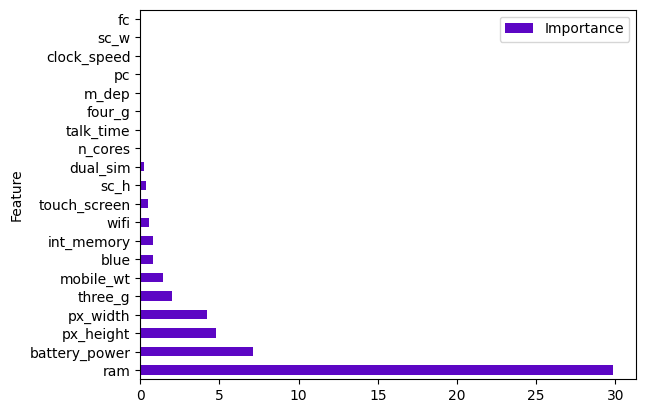

In [ ]:
#plotting feature importance
sgd_feature_importance.plot.barh(x='Feature',y='Importance',color='#5c06c4');

###Ranking Features

In [ ]:
sgd_feature_importance .sort_values(by=['Importance'],ascending=False,inplace=True)

In [ ]:
sgd_feature_importance['rank']=sgd_feature_importance['Importance'].rank(ascending=False,method='min')

In [ ]:
sgd_feature_importance

Feature  Importance  rank
9             ram   29.828657   1.0
0   battery_power    7.099925   2.0
7       px_height    4.765202   3.0
8        px_width    4.229996   4.0
17        three_g    1.986804   5.0
5       mobile_wt    1.457856   6.0
13           blue    0.819052   7.0
3      int_memory    0.783898   8.0
19           wifi    0.565958   9.0
18   touch_screen    0.491600  10.0
10           sc_h    0.350519  11.0
14       dual_sim    0.260061  12.0
16        n_cores    0.063612  13.0
12      talk_time    0.044568  14.0
15         four_g    0.043976  15.0
4           m_dep    0.027208  16.0
6              pc    0.000000  17.0
1     clock_speed    0.000000  17.0
11           sc_w    0.000000  17.0
2              fc    0.000000  17.0

In [ ]:
#confusion matrix
confusion_matrix_sgd_std=pd.DataFrame(confusion_matrix(y_test_std,y_pred_sgd_std['test']),columns=['predict 0','predict 1','predict 2','predict 3'])
confusion_matrix_sgd_std.index=['true 0','true 1','true 2','true 3']
confusion_matrix_sgd_std

predict 0  predict 1  predict 2  predict 3
true 0        131          0          1          0
true 1          1         81         36          0
true 2          0         16        100          4
true 3          0          0          2        128

In [ ]:
#display classification report
print(classification_report(y_test_std,y_pred_sgd_std['test']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       132
           1       0.84      0.69      0.75       118
           2       0.72      0.83      0.77       120
           3       0.97      0.98      0.98       130

    accuracy                           0.88       500
   macro avg       0.88      0.87      0.87       500
weighted avg       0.88      0.88      0.88       500



###8.2.4 Learning Curve of Stochastic Gradient Descent Model

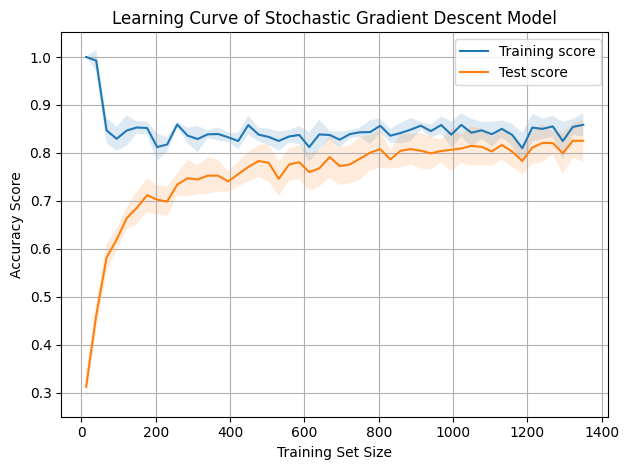

In [ ]:
train_sizes,train_scores,test_scores=learning_curve(model_sgd_std,x_train_std,y_train_std,cv=10,scoring='accuracy',train_sizes=np.linspace(0.01, 1.0, 50))
# Mean and Standard Deviation of training scores
mean_training = np.mean(train_scores, axis=1)
Standard_Deviation_training = np.std(train_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(test_scores, axis=1)
Standard_Deviation_testing = np.std(test_scores, axis=1)


plt.plot(train_sizes, mean_training,  label="Training score")
plt.fill_between(train_sizes, mean_training+ Standard_Deviation_training, mean_training - Standard_Deviation_training, alpha=0.15, )
plt.plot(train_sizes, mean_testing,  label="Test score")
plt.fill_between(train_sizes, mean_testing +Standard_Deviation_testing, mean_testing  - Standard_Deviation_testing, alpha=0.15, )

# Drawing plot
plt.title("Learning Curve of Stochastic Gradient Descent Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()

#9.1 XG Booster Model on MinMax Scaled data

In [ ]:
x_min=x_minmax.drop('price_range',axis=1)#features
y_min=x_minmax['price_range']#target

In [ ]:
x_train_min,x_test_min,y_train_min,y_test_min=train_test_split(x_min,y_min,test_size=0.25,random_state=42)

In [ ]:
#function for XG Booster model creation using minmax scaled data
def xgb_min(x_train_min,x_test_min,y_train_min,y_test_min):
  #creating an instance of Xg booster classifier
  xgb_clf=XGBClassifier()
  model_xgb=xgb_clf.fit(x_train_min,y_train_min)#model creation
  y_pred_xgb_min=xgb_clf.predict(x_test_min)#predicition
  train_score_xgb_min=xgb_clf.score(x_train_min,y_train_min)#training score
  test_score_xgb_min=accuracy_score(y_test_min,y_pred_xgb_min)#testing score
  return train_score_xgb_min,test_score_xgb_min

In [ ]:
#calling the function
score_xgb_min=xgb_min(x_train_min,x_test_min,y_train_min,y_test_min)


In [ ]:
#printing the train and test accuracy score
print('The training accuracy score of XG Boost Classifier Model on MinMax Scaled data is',score_xgb_min[0]*100)
print('The  accuracy score of XG Boost Classifier Model on test(MinMax Scaled) data is',score_xgb_min[1]*100)

The training accuracy score of XG Boost Classifier Model on MinMax Scaled data is 100.0
The  accuracy score of XG Boost Classifier Model on test(MinMax Scaled) data is 88.8


###9.1.1  K fold Cross Validation of XG Boost Classifier Model (since it is a balanced model) on MinMax Scaled data

In [ ]:
#function for doing  kfold cross validation on XG Boost Classifier model
def cv_xgb_min(x_train_min,y_train_min):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  xgb_clf=XGBClassifier() #creating an instance of Xg booster classifier
  model_xgb_min=xgb_clf.fit(x_train_min,y_train_min)#model creation
  cv_result_xgb_min=cross_val_score(model_xgb_min,x_train_min,y_train_min,cv=kfold_validator)#cross validation score
  return cv_result_xgb_min

In [ ]:
cv_result_xgb_min=cv_xgb_min(x_train_min,y_train_min)

In [ ]:
print('The KFold Cross Validation Score of XG Boost Classifier Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_xgb_min)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of XG Boost Classifier Model(on MinMax Scaled Data ) is :  91.33333333333333


#9.2 XG Boost Model on Standard Scaled data

In [ ]:
x_xgb_std=x_std.drop('price_range',axis=1)#features
y_xgb_std=x_std['price_range']#target

In [ ]:
x_train_std,x_test_std,y_train_std,y_test_std=train_test_split(x_xgb_std,y_xgb_std,test_size=0.25,random_state=42)

In [ ]:
#function for  XG Booster model creation using Standard Scaled data
def xgb_std(x_train_std,x_test_std,y_train_std,y_test_std):
  #creating an instance of Xg booster classifier
  xgb_clf=XGBClassifier()
  model_xgb_std=xgb_clf.fit(x_train_std,y_train_std)#model Creation
  y_pred_xgb_std=model_xgb_std.predict(x_test_std)#predictions
  train_score_xgb_std=xgb_clf.score(x_train_std,y_train_std)#training score
  test_score_xgb_std=accuracy_score(y_test_std,y_pred_xgb_std)#test score
  return  train_score_xgb_std,test_score_xgb_std

In [ ]:
#calling the function
score_xgb_std=xgb_std(x_train_std,x_test_std,y_train_std,y_test_std)

In [ ]:
#printing the train and test score
print('The training accuracy score of XG Boost Classifier Model on Standard Scaled data is',score_xgb_std[0]*100)
print('The  accuracy score of XG Boost Classifier Model on test(Standard Scaled) data is',score_xgb_std[1]*100)

The training accuracy score of XG Boost Classifier Model on Standard Scaled data is 100.0
The  accuracy score of XG Boost Classifier Model on test(Standard Scaled) data is 88.8


###9.2.1  K fold Cross Validation of XG Boost Classifier Model (since it is a balanced model) on Standard Scaled data

In [ ]:
#function for doing kfold cross validation of XG Boost Classifier model on standard scaled data
def cv_xgb_std(x_train_std,y_train_std):
  kfold_validator=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold.
  xgb_clf=XGBClassifier()#creating an instance of Xg booster classifier
  model_xgb_std=xgb_clf.fit(x_train_std,y_train_std)#model creation
  cv_result_xgb_std=cross_val_score(model_xgb_std,x_train_std,y_train_std,cv=kfold_validator)#cross value scores
  return cv_result_xgb_std

In [ ]:
cv_result_xgb_std=cv_xgb_std(x_train_std,y_train_std)
print('The KFold Cross Validation Score of XG Boost Classifier  Model(on standard Scaled Data ) is : ',np.mean(cv_result_xgb_std)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of XG Boost Classifier  Model(on standard Scaled Data ) is :  91.33333333333333


###9.2.2 Fine tuning of XG Boooster Model

In [ ]:
xgb_clf_std=XGBClassifier()
kfold_validator=KFold(10,shuffle=True,random_state=42)
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],#step size shrinkage used
    'booster': ['gbtree', 'gblinear'],#type of model
    'gamma': [0, 0.5, 1],#specifies the minimum loss reduction required to make a split.
    'reg_alpha': [0, 0.5, 1],#L1 regularization term on weights
    'reg_lambda': [0.5, 1, 5],#L2 regularization term on weights
    'base_score': [0.2, 0.5, 1]
}

In [ ]:

#create a grid search object
grid_xgb=GridSearchCV(xgb_clf_std,param_grid=param_grid,verbose=3,refit=True,n_jobs=-1,cv=kfold_validator)

In [ ]:
best_xgb_std_clf=grid_xgb.fit(x_train_std,y_train_std)

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


In [ ]:
print_results(grid_xgb)

BEST PARAMS: {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0.5}

0.881 (+/-0.032) for {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.01, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 0.5}
0.881 (+/-0.039) for {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.01, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}
0.875 (+/-0.045) for {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.01, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 5}
0.881 (+/-0.046) for {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.01, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 0.5}
0.883 (+/-0.045) for {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.01, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1}
0.866 (+/-0.05) for {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.0

###9.2.3 XG Booster Model Evalution

###Accuracy scores of top few models:-

0.921 (+/-0.045) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0.5}

0.921 (+/-0.04) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0.5}

0.919 (+/-0.039) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 0.5}


0.918 (+/-0.046) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1}

0.918 (+/-0.034) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 0.5}

0.917 (+/-0.039) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1}


0.915 (+/-0.042) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 0.5}

0.915 (+/-0.039) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}

0.914 (+/-0.047) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 5}

0.913 (+/-0.046) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 500, 'reg_alpha': 0.5, 'reg_lambda': 5}













In [ ]:
0.921 (+/-0.045) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0.5}
0.921 (+/-0.04) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0.5}
0.919 (+/-0.039) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 0.5}
0.918 (+/-0.046) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1}

0.918 (+/-0.034) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 0.5}

0.917 (+/-0.039) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1}
0.915 (+/-0.042) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 0.5}
0.915 (+/-0.039) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1}
0.914 (+/-0.047) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 5}
0.913 (+/-0.043) for {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 5}

In [ ]:
model_xgb_std1=XGBClassifier(base_score=1 ,booster='gbtree',gamma=0,learning_rate=0.05,n_estimators=200,reg_alpha=0,reg_lambda=0.5).fit(x_train_std,y_train_std)
model_xgb_std2=XGBClassifier(base_score=1 ,booster='gbtree',gamma=0,learning_rate=0.1,n_estimators=200,reg_alpha=0,reg_lambda=0.5).fit(x_train_std,y_train_std)
model_xgb_std3=XGBClassifier(base_score=1 ,booster='gbtree',gamma=0,learning_rate=0.05,n_estimators=200,reg_alpha=0,reg_lambda=1).fit(x_train_std,y_train_std)
model_xgb_std4=XGBClassifier(base_score= 1,booster='gbtree',gamma=0,learning_rate=0.05,n_estimators=200,reg_alpha=0.5,reg_lambda=0.5).fit(x_train_std,y_train_std)
model_xgb_std5=XGBClassifier(base_score= 1,booster='gbtree',gamma=0,learning_rate=0.05,n_estimators=500,reg_alpha=0,reg_lambda=0.5).fit(x_train_std,y_train_std)
model_xgb_std6=XGBClassifier(base_score= 1,booster='gbtree',gamma=0,learning_rate=0.05,n_estimators=500,reg_alpha=0,reg_lambda=1).fit(x_train_std,y_train_std)
model_xgb_std7=XGBClassifier(base_score= 1,booster='gbtree',gamma=0,learning_rate=0.1,n_estimators=100,reg_alpha=0,reg_lambda=0.5).fit(x_train_std,y_train_std)
model_xgb_std8=XGBClassifier(base_score= 1,booster='gbtree',gamma=0,learning_rate=0.1,n_estimators=100,reg_alpha=0,reg_lambda=1).fit(x_train_std,y_train_std)
model_xgb_std9=XGBClassifier(base_score= 1,booster='gbtree',gamma=0,learning_rate=0.05,n_estimators=500,reg_alpha=0,reg_lambda=5).fit(x_train_std,y_train_std)
model_xgb_std10=XGBClassifier(base_score=1 ,booster='gbtree',gamma=0,learning_rate=0.1,n_estimators=100,reg_alpha=0,reg_lambda=5).fit(x_train_std,y_train_std)

In [ ]:
for model in[model_xgb_std1,model_xgb_std2,model_xgb_std3,model_xgb_std4,model_xgb_std5,model_xgb_std6,model_xgb_std7,model_xgb_std8,model_xgb_std9,model_xgb_std10]:
  y_pred_xgb_std=model.predict(x_test_std)
  accuracy_xgb=accuracy_score(y_test_std,y_pred_xgb_std)
  print('base_score:{}/ booster:{}/ gamma:{}/ learning_rate:{}/ n_estimators:{}/ reg_aplha:{}/ reg_lambda:{}--A:{}'.format(model.base_score,model.booster,model.gamma,model.learning_rate,model.n_estimators,model.reg_alpha,model.reg_lambda,accuracy_xgb))

base_score:1/ booster:gbtree/ gamma:0/ learning_rate:0.05/ n_estimators:200/ reg_aplha:0/ reg_lambda:0.5--A:0.888
base_score:1/ booster:gbtree/ gamma:0/ learning_rate:0.1/ n_estimators:200/ reg_aplha:0/ reg_lambda:0.5--A:0.894
base_score:1/ booster:gbtree/ gamma:0/ learning_rate:0.05/ n_estimators:200/ reg_aplha:0/ reg_lambda:1--A:0.89
base_score:1/ booster:gbtree/ gamma:0/ learning_rate:0.05/ n_estimators:200/ reg_aplha:0.5/ reg_lambda:0.5--A:0.886
base_score:1/ booster:gbtree/ gamma:0/ learning_rate:0.05/ n_estimators:500/ reg_aplha:0/ reg_lambda:0.5--A:0.884
base_score:1/ booster:gbtree/ gamma:0/ learning_rate:0.05/ n_estimators:500/ reg_aplha:0/ reg_lambda:1--A:0.884
base_score:1/ booster:gbtree/ gamma:0/ learning_rate:0.1/ n_estimators:100/ reg_aplha:0/ reg_lambda:0.5--A:0.886
base_score:1/ booster:gbtree/ gamma:0/ learning_rate:0.1/ n_estimators:100/ reg_aplha:0/ reg_lambda:1--A:0.89
base_score:1/ booster:gbtree/ gamma:0/ learning_rate:0.05/ n_estimators:500/ reg_aplha:0/ reg_lam

In [ ]:
#best model prediction

#creating an instance and fit the training data
model_xgb_std=XGBClassifier(base_score=1 ,booster='gbtree',gamma=0,learning_rate=0.1,n_estimators=200,reg_alpha=0,reg_lambda=0.5).fit(x_train_std,y_train_std)

#Prediction
y_pred_xgb_std={
    'train':model_xgb_std.predict(x_train_std),
    'test':model_xgb_std.predict(x_test_std)

}

#create train and test score

score_xgb_std={
    'train':accuracy_score(y_train_std,y_pred_xgb_std['train']),
    'test':accuracy_score(y_test_std,y_pred_xgb_std['test'])
}

print('The training accuracy score for XG Boost Classifier model on standard scaled data is:',score_xgb_std['train']*100)
print('The testing accuracy score for XG Boost Classifier model on standard scaled data is:',score_xgb_std['test']*100)

The training accuracy score for XG Boost Classifier model on standard scaled data is: 100.0
The testing accuracy score for XG Boost Classifier model on standard scaled data is: 89.4


In [ ]:
#feature importance
xgb_features_imp=pd.DataFrame({'feature_name':x_train_std.columns,'importance':model_xgb_std.feature_importances_})
xgb_features_imp.sort_values(by=['importance'],ascending=False,inplace=True)

xgb_features_imp

feature_name  importance
9             ram    0.401841
0   battery_power    0.135459
7       px_height    0.094886
8        px_width    0.071338
3      int_memory    0.029387
5       mobile_wt    0.028524
4           m_dep    0.026393
2              fc    0.023527
11           sc_w    0.023160
16        n_cores    0.021390
12      talk_time    0.018381
6              pc    0.017507
19           wifi    0.017085
10           sc_h    0.015541
1     clock_speed    0.014587
15         four_g    0.014525
18   touch_screen    0.013653
14       dual_sim    0.013461
17        three_g    0.010318
13           blue    0.009037

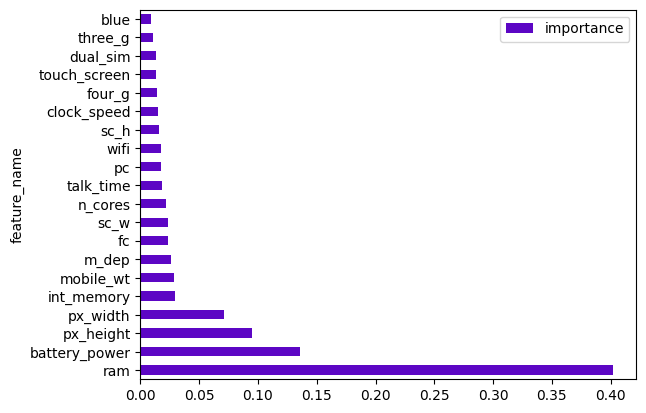

In [ ]:
#ploting importance
xgb_features_imp.plot.barh(x='feature_name',y='importance',color='#5c06c4');

###Ranking Features

In [ ]:
xgb_features_imp['rank']=xgb_features_imp['importance'].rank(ascending=False,method='min')

In [ ]:
xgb_features_imp

feature_name  importance  rank
9             ram    0.401841   1.0
0   battery_power    0.135459   2.0
7       px_height    0.094886   3.0
8        px_width    0.071338   4.0
3      int_memory    0.029387   5.0
5       mobile_wt    0.028524   6.0
4           m_dep    0.026393   7.0
2              fc    0.023527   8.0
11           sc_w    0.023160   9.0
16        n_cores    0.021390  10.0
12      talk_time    0.018381  11.0
6              pc    0.017507  12.0
19           wifi    0.017085  13.0
10           sc_h    0.015541  14.0
1     clock_speed    0.014587  15.0
15         four_g    0.014525  16.0
18   touch_screen    0.013653  17.0
14       dual_sim    0.013461  18.0
17        three_g    0.010318  19.0
13           blue    0.009037  20.0

In [ ]:
#confusion matrix
confusion_matrix_xgb_std=pd.DataFrame(confusion_matrix(y_test_std,y_pred_xgb_std['test']),columns=['predict 0','predict 1','predict 2','predict 3'])
confusion_matrix_xgb_std.index=['true 0','true 1','true 2','true 3']
confusion_matrix_xgb_std

predict 0  predict 1  predict 2  predict 3
true 0        125          7          0          0
true 1          7        107          4          0
true 2          0         13         96         11
true 3          0          0         11        119

In [ ]:
#display classification report
print(classification_report(y_test_std,y_pred_xgb_std['test']))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       132
           1       0.84      0.91      0.87       118
           2       0.86      0.80      0.83       120
           3       0.92      0.92      0.92       130

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



###9.2.4  Learning Curve of XG Boost Classifier Model

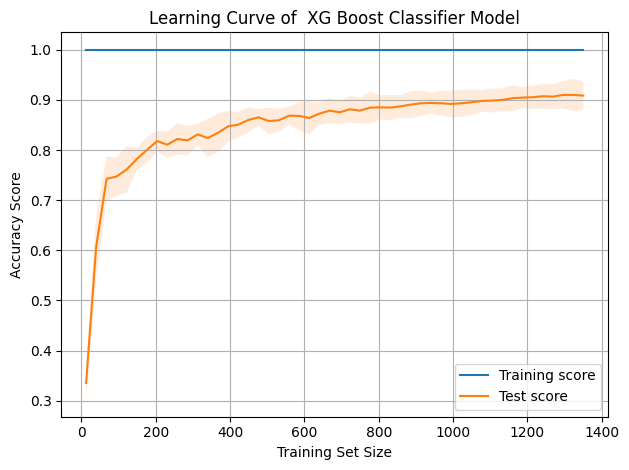

In [ ]:
train_sizes,train_scores,test_scores=learning_curve(model_xgb_std,x_train_std,y_train_std,cv=10,scoring='accuracy',train_sizes=np.linspace(0.01, 1.0, 50))
# Mean and Standard Deviation of training scores
mean_training = np.mean(train_scores, axis=1)
Standard_Deviation_training = np.std(train_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(test_scores, axis=1)
Standard_Deviation_testing = np.std(test_scores, axis=1)


plt.plot(train_sizes, mean_training,  label="Training score")
plt.fill_between(train_sizes, mean_training+ Standard_Deviation_training, mean_training - Standard_Deviation_training, alpha=0.15, )
plt.plot(train_sizes, mean_testing,  label="Test score")
plt.fill_between(train_sizes, mean_testing +Standard_Deviation_testing, mean_testing  - Standard_Deviation_testing, alpha=0.15, )

# Drawing plot
plt.title("Learning Curve of  XG Boost Classifier Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()

#Accuracy Score comparison  of all models

In [ ]:
print('1. Logistic Regression Model accuracy score : ')
print('---------------------------------------------')
print('The training accuracy score of Logistic Regression Model on (MinMax Scaled) data is',score_log_min[0]*100)
print('The  accuracy score of Logistic Regression Model on test(MinMax Scaled) data is',score_log_min[1]*100)

print('The training accuracy score of Logistic Regression Model on (Standard Scaled) data is',score_log_std[0]*100)
print('The  accuracy score of Logistic Regression Model on test(Standard Scaled) data is',score_log_std[1]*100)
print('\n')

print('2. K Nearest Neighbors Model accuracy score : ')
print('---------------------------------------------')
print('The  training accuracy score of K Nearest Neighbors  Model on test(MinMAx Scaled) data is',score_knn_min[0]*100)
print('The  accuracy score of K Nearest Neighbors  Model on test(MinMax Scaled) data is',score_knn_min[1]*100)

print('The  training accuracy score of K Nearest Neighbors  Model on test(Standard Scaled) data is',score_knn_std[0]*100)
print('The  accuracy score of K Nearest Neighbors  Model on test(Standard Scaled) data is',score_knn_std[1]*100)
print('\n')

print('3. SVM Classifier Model accuracy score : ')
print('---------------------------------------------')
print('The  training accuracy score of SVM Classifier  Model on test(MinMAx Scaled) data is',score_svm_min[0]*100)
print('The  accuracy score of SVM Classifier  Model on test(MinMax Scaled) data is',score_svm_min[1]*100)

print('The  training accuracy score of SVM Classifier  Model on test(Standard Scaled) data is',score_svm_std[0]*100)
print('The  accuracy score of SVM Classifier  Model on test(Standard Scaled) data is',score_svm_std[1]*100)

print('\n')

print('4. Decision Tree Classifier Model accuracy score : ')
print('---------------------------------------------')
print('The  training accuracy score of Decision Tree Classifier  Model on test(MinMAx Scaled) data is',score_dt_min[0]*100)
print('The  accuracy score of Decision Tree  Classifier  Model on test(MinMax Scaled) data is',score_dt_min[1]*100)

print('The  training accuracy score of Decision Tree Classifier  Model on test(Standard Scaled) data is',score_dt_std[0]*100)
print('The  accuracy score of Decision Tree Classifier  Model on test(Standard Scaled) data is',score_dt_std[1]*100)
print('\n')

print('5. Random Forest Classifier Model accuracy score : ')
print('---------------------------------------------')
print('The  training accuracy score of Random Forest Classifier  Model on test(MinMAx Scaled) data is',score_rf_min[0]*100)
print('The  accuracy score of  Random Forest  Model on test(MinMax Scaled) data is',score_rf_min[1]*100)

print('The  training accuracy score of Random Forest Classifier  Model on test(Standard Scaled) data is',score_rf_std[0]*100)
print('The  accuracy score of Random Forest Classifier  Model on test(Standard Scaled) data is',score_rf_std[1]*100)
print('\n')

print('6. Gaussian Naive Bayes Model accuracy score : ')
print('---------------------------------------------')
print('The  training accuracy score of Gaussian Naive Bayes   Model on test(MinMAx Scaled) data is',score_gnb_min[0]*100)
print('The  accuracy score of Gaussian Naive Bayes  Model on test(MinMax Scaled) data is',score_gnb_min[1]*100)

print('The  training accuracy score of Gaussian Naive Bayes  Model on test(Standard Scaled) data is',score_gnb_std[0]*100)
print('The  accuracy score of Gaussian Naive Bayes  Model on test(Standard Scaled) data is',score_gnb_std[1]*100)
print('\n')

print('7. Gradient Boosting Classifier  Model accuracy score : ')
print('---------------------------------------------')
print('The  training accuracy score of Gradient Boosting Classifier   Model on test(MinMAx Scaled) data is',score_gb_min[0]*100)
print('The  accuracy score of Gradient Boosting Classifier  Model on test(MinMax Scaled) data is',score_gb_min[1]*100)

print('The  training accuracy score of Gradient Boosting Classifier  Model on test(Standard Scaled) data is',score_gb_std[0]*100)
print('The  accuracy score of Gradient Boosting Classifier   Model on test(Standard Scaled) data is',score_gb_std[1]*100)
print('\n')

print('8. Stochastic Gradient Descent Model accuracy score : ')
print('---------------------------------------------')
print('The  training accuracy score of Stochastic Gradient Descent  Classifier   Model on test(MinMAx Scaled) data is',score_sgd_min[0]*100)
print('The  accuracy score of Stochastic Gradient Descent  Classifier  Model on test(MinMax Scaled) data is',score_sgd_min[1]*100)

print('The  training accuracy score of Stochastic Gradient Descent Classifier  Model on test(Standard Scaled) data is',score_sgd_std[0]*100)
print('The  accuracy score of Stochastic Gradient Descent Classifier   Model on test(Standard Scaled) data is',score_sgd_std[1]*100)

1. Logistic Regression Model accuracy score : 
---------------------------------------------
The training accuracy score of Logistic Regression Model on (MinMax Scaled) data is 93.46666666666667
The  accuracy score of Logistic Regression Model on test(MinMax Scaled) data is 91.60000000000001
The training accuracy score of Logistic Regression Model on (Standard Scaled) data is 97.66666666666667
The  accuracy score of Logistic Regression Model on test(Standard Scaled) data is 96.2


2. K Nearest Neighbors Model accuracy score : 
---------------------------------------------
The  training accuracy score of K Nearest Neighbors  Model on test(MinMAx Scaled) data is 55.93333333333334
The  accuracy score of K Nearest Neighbors  Model on test(MinMax Scaled) data is 41.199999999999996
The  training accuracy score of K Nearest Neighbors  Model on test(Standard Scaled) data is 69.26666666666667
The  accuracy score of K Nearest Neighbors  Model on test(Standard Scaled) data is 64.2


3. SVM Classi

##Cross Validation Score camparison of all models

In [ ]:
print('The KFold Cross Validation Score of Logistic Regression Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_log_min)*100)#mean of Kfold cross validation scores
print('The KFold Cross Validation Score of Logistic Regression Model(on standard Scaled Data ) is : ',np.mean(cv_result_log_std)*100)#mean of Kfold cross validation scores
print('The KFold Cross Validation Score of K Nearest Neighbors  Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_knn_min)*100)#mean of Kfold cross validation scores
print('The KFold Cross Validation Score of K Nearest Neighbors Model(on Standard Scaled Data ) is : ',np.mean(cv_result_knn_std)*100)#mean of Kfold cross validation scores
print('The KFold Cross Validation Score of SVM Classifier  Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_svm_min)*100)#mean of Kfold cross validation scores
print('The KFold Cross Validation Score of SVM Classifier Model(on Standard Scaled Data ) is : ',np.mean(cv_result_svm_std)*100)#mean of Kfold cross validation scores
print('The KFold Cross Validation Score of Decision Tree  Classifier  Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_dt_min)*100)#mean of Kfold cross validation scores
print('The KFold Cross Validation Score of Decision Tree Classifier Model(on Standard Scaled Data ) is : ',np.mean(cv_result_dt_std)*100)#mean of Kfold cross validation scores
print('The KFold Cross Validation Score of  Random Forest  Classifier  Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_rf_min)*100)#mean of Kfold cross validation scores
print('The KFold Cross Validation Score of Random Forest Classifier Model(on Standard Scaled Data ) is : ',np.mean(cv_result_rf_std)*100)#mean of Kfold cross validation scores
print('The KFold Cross Validation Score of  Gaussian Naive Bayes  Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_gnb_min)*100)#mean of Kfold cross validation scores
print('The KFold Cross Validation Score of Gaussian Naive Bayes Model(on Standard Scaled Data ) is : ',np.mean(cv_result_gnb_std)*100)#mean of Kfold cross validation scores
print('The KFold Cross Validation Score of  Gradient Boosting Classifier  Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_gb_min)*100)#mean of Kfold cross validation scores
print('The KFold Cross Validation Score of Gradient Boosting Classifier Model(on Standard Scaled Data ) is : ',np.mean(cv_result_gb_std)*100)#mean of Kfold cross validation scores
print('The KFold Cross Validation Score of  Stochastic Gradient Descent Classifier  Model(on MinMax Scaled Data ) is : ',np.mean(cv_result_sgd_min)*100)#mean of Kfold cross validation scores
print('The KFold Cross Validation Score of Stochastic Gradient Descent Classifier Model(on Standard Scaled Data ) is : ',np.mean(cv_result_sgd_std)*100)#mean of Kfold cross validation scores

The KFold Cross Validation Score of Logistic Regression Model(on MinMax Scaled Data ) is :  90.86666666666667
The KFold Cross Validation Score of Logistic Regression Model(on standard Scaled Data ) is :  95.66666666666667
The KFold Cross Validation Score of K Nearest Neighbors  Model(on MinMax Scaled Data ) is :  41.8
The KFold Cross Validation Score of K Nearest Neighbors Model(on Standard Scaled Data ) is :  60.399999999999984
The KFold Cross Validation Score of SVM Classifier  Model(on MinMax Scaled Data ) is :  77.86666666666666
The KFold Cross Validation Score of SVM Classifier Model(on Standard Scaled Data ) is :  90.26666666666668
The KFold Cross Validation Score of Decision Tree  Classifier  Model(on MinMax Scaled Data ) is :  83.2
The KFold Cross Validation Score of Decision Tree Classifier Model(on Standard Scaled Data ) is :  83.06666666666666
The KFold Cross Validation Score of  Random Forest  Classifier  Model(on MinMax Scaled Data ) is :  86.6
The KFold Cross Validation S

###Fine Tuned models Accuracy scores

In [ ]:
print('The testing accuracy score for Logistic Regression model on standard scaled data is:',score_log_std['test']*100)
print('The testing accuracy score for Decision Tree Classifier model on standard scaled data is:',score_dt_std['test']*100)
print('The testing accuracy score for Random Forest Classifier model on standard scaled data is:',score_rf_std['test']*100)
print('The testing accuracy score for Gradient Boosting  Classifier model on standard scaled data is:',score_gb_std['test']*100)


The testing accuracy score for Logistic Regression model on standard scaled data is: 97.6
The testing accuracy score for Decision Tree Classifier model on standard scaled data is: 86.8
The testing accuracy score for Random Forest Classifier model on standard scaled data is: 88.8
The testing accuracy score for Gradient Boosting  Classifier model on standard scaled data is: 92.4


In [ ]:
print('The training accuracy score for Logistic Regression model on standard scaled data is:',score_log_std['train']*100)
print('The testing accuracy score for Logistic Regression model on standard scaled data is:',score_log_std['test']*100)
print('The training accuracy score for KNN Classifier model on standard scaled data is:',score_knn_std['train']*100)
print('The testing accuracy score for KNN Classifier model on standard scaled data is:',score_knn_std['test']*100)
print('The training accuracy score for SVC model on standard scaled data is:',score_svm_std['train']*100)
print('The testing accuracy score for SVC model on standard scaled data is:',score_svm_std['test']*100)
print('The training accuracy score for Decision Tree Classifier model on standard scaled data is:',score_dt_std['train']*100)
print('The testing accuracy score for Decision Tree Classifier model on standard scaled data is:',score_dt_std['test']*100)
print('The training accuracy score for Random Forest Classifier model on standard scaled data is:',score_rf_std['train']*100)
print('The testing accuracy score for Random Forest Classifier model on standard scaled data is:',score_rf_std['test']*100)
print('The training accuracy score for Gausiian Naive Bayes Classifier model on standard scaled data is:',score_gnb_std['train']*100)
print('The testing accuracy score for Gausiian Naive Bayes Classifier model on standard scaled data is:',score_gnb_std['test']*100)
print('The training accuracy score for Gradient Boosting Classifier model on standard scaled data is:',score_gb_std['train']*100)
print('The testing accuracy score for Gradient Boosting  Classifier model on standard scaled data is:',score_gb_std['test']*100)
print('The training accuracy score for Stochastic Gradient Descent Classifier model on standard scaled data is:',score_sgd_std['train']*100)
print('The testing accuracy score for Stochastic Gradient Descent Classifier model on standard scaled data is:',score_sgd_std['test']*100)
print('The training accuracy score for XG Boost Classifier model on standard scaled data is:',score_xgb_std['train']*100)
print('The testing accuracy score for XG Boost Classifier model on standard scaled data is:',score_xgb_std['test']*100)

The training accuracy score for Logistic Regression model on standard scaled data is: 99.06666666666666
The testing accuracy score for Logistic Regression model on standard scaled data is: 97.6
The training accuracy score for KNN Classifier model on standard scaled data is: 100.0
The testing accuracy score for KNN Classifier model on standard scaled data is: 74.0
The training accuracy score for SVC model on standard scaled data is: 98.8
The testing accuracy score for SVC model on standard scaled data is: 97.6
The training accuracy score for Decision Tree Classifier model on standard scaled data is: 95.33333333333334
The testing accuracy score for Decision Tree Classifier model on standard scaled data is: 86.8
The training accuracy score for Random Forest Classifier model on standard scaled data is: 100.0
The testing accuracy score for Random Forest Classifier model on standard scaled data is: 88.8
The training accuracy score for Gausiian Naive Bayes Classifier model on standard scaled 

#Overall conclusion:-


From the above printed accuracy scores it can be concluded that both the Logistic Regression model and SVC model has the highest test accuracy score compared to other models and can be used to built the web application to predict the price range of the mobile phones.

**----------------------------------------------------------------------------------------------------------------------------------------------**